# Telecom Churn Case Study

#### Business Objective

- The dataset contains customer-level information for a span of four consecutive months - June, July, August and September. The months are encoded as 6, 7, 8 and 9, respectively.
- This project is based on the Indian and Southeast Asian market.So will focus on Prepaid mode.
- As per business requirements, our models are based on Usage-based churn i.e. customers who have not done any usage, either incoming or outgoing - in terms of calls, internet etc. over a period of time are considered to have churned.
- We will predict churn only for the high-value customers.
- We assume that there are three phases of customer lifecycle : Good (June- July), Action(Aug) and Churn (Sep)
- With 226 predictor variables and 99999 observation, The business objective  is to predict the churn in the last (i.e. the ninth) month using the data (features) from the first three months.

## STEP 1: Reading and Understanding the data

In [136]:
# Importing the required libraries

#To ignore warnings
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

# For plotting graphs
import matplotlib.pyplot as plt
import seaborn as sns

# To Scale our data
from sklearn.preprocessing import StandardScaler

# Importing the test train split from sklearn
import sklearn
from sklearn.model_selection import train_test_split

# Importing PCA
from sklearn.decomposition import PCA

# Importing Logistic regression 
from sklearn.linear_model import LogisticRegression

# Importing Random Forest
from sklearn.ensemble import RandomForestClassifier

# Importing Pipeline
from sklearn.pipeline import Pipeline

# Importing modules for cross validation
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

# Importing module for calculating VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Importing Library to check confusion matrix
from sklearn import metrics
from sklearn.metrics import confusion_matrix

#To print all columns/rows
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_info_columns', 500)

In [137]:
# Reading the csv into a dataframe
df=pd.read_csv("telecom_churn_data.csv")

In [138]:
# Looking at the top 5 rows of the dataframe
df.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0            9/30/2014  197.385  214.816  213.803   21.100          NaN   
1            9/30/2014   34.047  355.074  268.321   86.285        24.11   
2            9/30/2014  167.690  189.058  210.226  290.714        11.54   
3            9/30/2014  221.338  251.102  508.054  389.500        99.91   
4            9/30/2014  261.636  309.876  238.174  163.426        50.31   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          NaN         0.00          NaN           NaN           NaN   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00           NaN            NaN            NaN           0.00   
1        304.76         53.76            0.0           0.00           0.00   
2        208.36        118.91            0.0           0.00           0.00   
3         71.68        113.54            0.0          54.86          44.38   
4        124.26         45.81            0.0           0.00           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            NaN            NaN            NaN           0.00            NaN   
1           0.00            0.0           0.00           0.00           0.00   
2          38.49            0.0           0.00           0.00          70.94   
3           0.00            0.0          28.09          39.04           0.00   
4           0.00            0.0           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               NaN               NaN              0.00               NaN   
1             23.88             74.56              7.68             18.34   
2              7.19             28.74             13.58             14.39   
3             73.68             34.81             10.61             15.49   
4             50.31            149.44             83.89             58.78   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               NaN               NaN              0.00               NaN   
1             11.51             75.94            291.86             53.76   
2             29.34             16.86             38.46             28.16   
3            107.43             83.21             22.46             65.46   
4             67.64             91.88            124.26             37.89   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               NaN               NaN              0.00               NaN   
1              0.00              0.00              0.00              0.00   
2             24.11             21.79             15.61             22.24   
3              1.91              0.65              

In [139]:
# Checking the shape of the dataframe
df.shape

(99999, 226)

In [140]:
# Looking the info of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
mobile_number               99999 non-null int64
circle_id                   99999 non-null int64
loc_og_t2o_mou              98981 non-null float64
std_og_t2o_mou              98981 non-null float64
loc_ic_t2o_mou              98981 non-null float64
last_date_of_month_6        99999 non-null object
last_date_of_month_7        99398 non-null object
last_date_of_month_8        98899 non-null object
last_date_of_month_9        98340 non-null object
arpu_6                      99999 non-null float64
arpu_7                      99999 non-null float64
arpu_8                      99999 non-null float64
arpu_9                      99999 non-null float64
onnet_mou_6                 96062 non-null float64
onnet_mou_7                 96140 non-null float64
onnet_mou_8                 94621 non-null float64
onnet_mou_9                 92254 non-null float64
offnet_mou_6                960

In [141]:
# Looking at the stats of numeric columns
df.describe()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count   9.999900e+04    99999.0         98981.0         98981.0   
mean    7.001207e+09      109.0             0.0             0.0   
std     6.956694e+05        0.0             0.0             0.0   
min     7.000000e+09      109.0             0.0             0.0   
25%     7.000606e+09      109.0             0.0             0.0   
50%     7.001205e+09      109.0             0.0             0.0   
75%     7.001812e+09      109.0             0.0             0.0   
max     7.002411e+09      109.0             0.0             0.0   

       loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8        arpu_9  \
count         98981.0  99999.000000  99999.000000  99999.000000  99999.000000   
mean              0.0    282.987358    278.536648    279.154731    261.645069   
std               0.0    328.439770    338.156291    344.474791    341.998630   
min               0.0  -2258.709000  -2014.045000   -945.808000  -1899.505000   
25%               0.0     93.411500     86.980500     84.126000     62.685000   
50%               0.0    197.704000    191.640000    192.080000    176.849000   
75%               0.0    371.060000    365.344500    369.370500    353.466500   
max               0.0  27731.088000  35145.834000  33543.624000  38805.617000   

        onnet_mou_6   onnet_mou_7   onnet_mou_8   onnet_mou_9  offnet_mou_6  \
count  96062.000000  96140.000000  94621.000000  92254.000000  96062.000000   
mean     132.395875    133.670805    133.018098    130.302327    197.935577   
std      297.207406    308.794148    308.951589    308.477668    316.851613   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        7.380000      6.660000      6.460000      5.330000     34.730000   
50%       34.310000     32.330000     32.360000     29.840000     96.310000   
75%      118.740000    115.595000    115.860000    112.130000    231.860000   
max     7376.710000   8157.780000  10752.560000  10427.460000   8362.360000   

       offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  \
count  96140.000000  94621.000000  92254.000000   96062.000000   96140.000000   
mean     197.045133    196.574803    190.337222       9.950013       7.149898   
std      325.862803    327.170662    319.396092      72.825411      73.447948   
min        0.000000      0.000000      0.000000       0.000000       0.000000   
25%       32.190000     31.630000     27.130000       0.000000       0.000000   
50%       91.735000     92.140000     87.290000       0.000000       0.000000   
75%      226.815000    228.260000    220.505000       0.000000       0.000000   
max     9667.130000  14007.340000  10310.760000   13724.380000   15371.040000   

       roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  \
count   94621.000000   92254.000000   96062.000000   96140.000000   
mean        7.292981       6.343841      13.911337       9.818732   
std        68.402466      57.137537      71.443196      58.455762   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max     13095.360000    8464.030000    3775.110000    2812.040000   

       roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count   94621.000000   92254.000000      96062.000000      96140.000000   
mean        9.971890       8.555519         47.100763         46.473010   
std        64.713221      58.438186        150.856393        155.318705   
min         0.000000       0.000000          0.000000          0.000000   
25%         0.000000       0.000000          1.660000          1.630000   
50%         0.000000       0.000000         11.910000         11.610000   
75%         0.000000       0.000000         40.960000         39.910000   
max      

In [142]:
# Checking if there are duplicate rows
sum(df['mobile_number'].duplicated())

0

In [143]:
# As there are no duplicate rows, we can set the 'mobile_number' column as index
df.set_index('mobile_number',inplace=True)

## STEP 2: Data Preparation

In [144]:
#Checking values in 'loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou' columns
print(df['loc_og_t2o_mou'].value_counts())
print(df['std_og_t2o_mou'].value_counts())
print(df['loc_ic_t2o_mou'].value_counts())

0.0    98981
Name: loc_og_t2o_mou, dtype: int64
0.0    98981
Name: std_og_t2o_mou, dtype: int64
0.0    98981
Name: loc_ic_t2o_mou, dtype: int64


From above, we can see that the three columns 'loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou' have no variance. Hence, we will drop the columns.

In [145]:
# The three columns do not have any variation in values. It has 0 for all the rows. Thus dropping it.
df.drop(columns=['loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou'],inplace=True)

In [146]:
# Creating a function to print the % of na values
def PrintNA(df):
    nDf = pd.DataFrame(df.isna().sum()*100/df.shape[0]).sort_values(by=0, ascending=False)
    nDf.reset_index(inplace=True)
    return nDf
    
nullDf = PrintNA(df)
nullDf

index          0
0                   arpu_3g_6  74.846748
1                   fb_user_6  74.846748
2           total_rech_data_6  74.846748
3             count_rech_2g_6  74.846748
4    date_of_last_rech_data_6  74.846748
5             count_rech_3g_6  74.846748
6          av_rech_amt_data_6  74.846748
7            night_pck_user_6  74.846748
8                   arpu_2g_6  74.846748
9             max_rech_data_6  74.846748
10           night_pck_user_7  74.428744
11         av_rech_amt_data_7  74.428744
12                  arpu_2g_7  74.428744
13            count_rech_3g_7  74.428744
14                  fb_user_7  74.428744
15   date_of_last_rech_data_7  74.428744
16            count_rech_2g_7  74.428744
17                  arpu_3g_7  74.428744
18          total_rech_data_7  74.428744
19            max_rech_data_7  74.428744
20           night_pck_user_9  74.077741
21          total_rech_data_9  74.077741
22                  arpu_2g_9  74.077741
23                  fb_user_9  74.077741
24   date_of_last_rech_data_9  74.077741
25         av_rech_amt_data_9  74.077741
26            max_rech_data_9  74.077741
27                  arpu_3g_9  74.077741
28            count_rech_2g_9  74.077741
29            count_rech_3g_9  74.077741
30          total_rech_data_8  73.660737
31                  arpu_2g_8  73.660737
32                  fb_user_8  73.660737
33            max_rech_data_8  73.660737
34                  arpu_3g_8  73.660737
35           night_pck_user_8  73.660737
36         av_rech_amt_data_8  73.660737
37            count_rech_3g_8  73.660737
38            count_rech_2g_8  73.660737
39   date_of_last_rech_data_8  73.660737
40           loc_ic_t2m_mou_9   7.745077
41               spl_og_mou_9   7.745077
42                og_others_9   7.745077
43               isd_og_mou_9   7.745077
44           loc_ic_t2t_mou_9   7.745077
45               std_ic_mou_9   7.745077
46               loc_ic_mou_9   7.745077
47           std_ic_t2t_mou_9   7.745077
48           std_ic_t2m_mou_9   7.745077
49           std_ic_t2f_mou_9   7.745077
50           std_ic_t2o_mou_9   7.745077
51               spl_ic_mou_9   7.745077
52               isd_ic_mou_9   7.745077
53                ic_others_9   7.745077
54           std_og_t2c_mou_9   7.745077
55               std_og_mou_9   7.745077
56           loc_ic_t2f_mou_9   7.745077
57               loc_og_mou_9   7.745077
58              roam_ic_mou_9   7.745077
59           std_og_t2f_mou_9   7.745077
60           loc_og_t2c_mou_9   7.745077
61           loc_og_t2m_mou_9   7.745077
62           std_og_t2t_mou_9   7.745077
63              roam_og_mou_9   7.745077
64                onnet_mou_9   7.745077
65           std_og_t2m_mou_9   7.745077
66               offnet_mou_9   7.745077
67           loc_og_t2t_mou_9   7.745077
68           loc_og_t2f_mou_9   7.745077
69           loc_og_t2m_mou_8   5.378054
70           loc_ic_t2f_mou_8   5.378054
71           loc_og_t2f_mou_8   5.378054
72               loc_ic_mou_8   5.378054
73           std_ic_t2o_mou_8   5.378054
74                ic_others_8   5.378054
75           std_ic_t2t_mou_8   5.378054
76               isd_ic_mou_8   5.378054
77           std_ic_t2m_mou_8   5.378054
78               loc_og_mou_8   5.378054
79           loc_og_t2c_mou_8   5.378054
80               spl_ic_mou_8   5.378054
81           std_ic_t2f_mou_8   5.378054
82               std_ic_mou_8   5.378054
83           loc_ic_t2m_mou_8   5.378054
84           std_og_t2t_mou_8   5.378054
85                og_others_8   5.378054
86               spl_og_mou_8   5.378054
87           loc_ic_t2t_mou_8   5.378054
88           loc_og_t2t_mou_8   5.378054
89           std_og_t2c_mou_8   5.378054
90               offnet_mou_8   5.378054
91              roam_og_mou_8   5.378054
92           std_og_t2m_mou_8   5.378054
93               isd_og_mou_8   5.378054
94           std_og_t2f_mou_8   5.378054
95                onnet_mou_8   5.378054
96              roam_ic_mou_8   5.378054
97    

In [147]:
# Since most of the numeric columns describe the count of incoming and outgoing isd, std, local calls made by the user, 
# revenue generated, volume of data used, number of times the user recharged their mobile and so on, the NA values in 
# any of these columns would mean that the user has not used that facility (for example, if the user has not made any ISD calls,
# its value would be NA here.) Thus, filling it with 0 would mean the same thing.

# Filling the NA values of numeric columns with 0
colsWithNull = nullDf[nullDf[0]>0]['index'].tolist()
numericCols = df.select_dtypes(exclude='object').columns.tolist()

colsToFill = list(set(colsWithNull).intersection(set(numericCols)))
df[colsToFill] = df[colsToFill].fillna(value=0)

In [148]:
# Looking at the columns where NA values are still present
nullDf = PrintNA(df)
nullDf

index          0
0    date_of_last_rech_data_6  74.846748
1    date_of_last_rech_data_7  74.428744
2    date_of_last_rech_data_9  74.077741
3    date_of_last_rech_data_8  73.660737
4         date_of_last_rech_9   4.760048
5         date_of_last_rech_8   3.622036
6         date_of_last_rech_7   1.767018
7        last_date_of_month_9   1.659017
8         date_of_last_rech_6   1.607016
9        last_date_of_month_8   1.100011
10       last_date_of_month_7   0.601006
11             max_rech_amt_7   0.000000
12             max_rech_amt_8   0.000000
13             max_rech_amt_9   0.000000
14         last_day_rch_amt_9   0.000000
15         last_day_rch_amt_6   0.000000
16         last_day_rch_amt_7   0.000000
17         last_day_rch_amt_8   0.000000
18                  circle_id   0.000000
19           total_rech_amt_9   0.000000
20          total_rech_data_6   0.000000
21          total_rech_data_7   0.000000
22          total_rech_data_8   0.000000
23          total_rech_data_9   0.000000
24            max_rech_data_6   0.000000
25            max_rech_data_7   0.000000
26            max_rech_data_8   0.000000
27            max_rech_data_9   0.000000
28            count_rech_2g_6   0.000000
29             max_rech_amt_6   0.000000
30           total_rech_amt_7   0.000000
31           total_rech_amt_8   0.000000
32            count_rech_2g_8   0.000000
33               std_ic_mou_8   0.000000
34               std_ic_mou_9   0.000000
35             total_ic_mou_6   0.000000
36             total_ic_mou_7   0.000000
37             total_ic_mou_8   0.000000
38             total_ic_mou_9   0.000000
39               spl_ic_mou_6   0.000000
40               spl_ic_mou_7   0.000000
41               spl_ic_mou_8   0.000000
42               spl_ic_mou_9   0.000000
43               isd_ic_mou_6   0.000000
44               isd_ic_mou_7   0.000000
45               isd_ic_mou_8   0.000000
46               isd_ic_mou_9   0.000000
47                ic_others_6   0.000000
48                ic_others_7   0.000000
49                ic_others_8   0.000000
50                ic_others_9   0.000000
51           total_rech_num_6   0.000000
52           total_rech_num_7   0.000000
53           total_rech_num_8   0.000000
54           total_rech_num_9   0.000000
55           total_rech_amt_6   0.000000
56            count_rech_2g_7   0.000000
57            count_rech_3g_6   0.000000
58            count_rech_2g_9   0.000000
59               monthly_3g_9   0.000000
60               monthly_2g_6   0.000000
61               monthly_2g_7   0.000000
62               monthly_2g_8   0.000000
63               monthly_2g_9   0.000000
64                sachet_2g_6   0.000000
65                sachet_2g_7   0.000000
66                sachet_2g_8   0.000000
67                sachet_2g_9   0.000000
68               monthly_3g_6   0.000000
69               monthly_3g_7   0.000000
70               monthly_3g_8   0.000000
71                sachet_3g_6   0.000000
72               std_ic_mou_6   0.000000
73                sachet_3g_7   0.000000
74                sachet_3g_8   0.000000
75                sachet_3g_9   0.000000
76                  fb_user_6   0.000000
77                  fb_user_7   0.000000
78                  fb_user_8   0.000000
79                  fb_user_9   0.000000
80                        aon   0.000000
81                 aug_vbc_3g   0.000000
82                 jul_vbc_3g   0.000000
83                 jun_vbc_3g   0.000000
84           night_pck_user_9   0.000000
85           night_pck_user_8   0.000000
86           night_pck_user_7   0.000000
87           night_pck_user_6   0.000000
88            count_rech_3g_7   0.000000
89            count_rech_3g_8   0.000000
90            count_rech_3g_9   0.000000
91         av_rech_amt_data_6   0.000000
92         av_rech_amt_data_7   0.000000
93         av_rech_amt_data_8   0.000000
94         av_rech_amt_data_9   0.000000
95                vol_2g_mb_6   0.000000
96                vol_2g_mb_7   0.000000
97    

In [149]:
# Removing the columns with more than 70% null values
# We will not be able to impute any date values to these columns
colsToRemove = nullDf[nullDf[0]>70]['index'].tolist()
df.drop(columns=colsToRemove,inplace=True)

In [150]:
# Imputing the na values in last date of the month columns
lastDate7 = df['last_date_of_month_7'].unique()[0]
lastDate8 = df['last_date_of_month_8'].unique()[0]
lastDate9 = df['last_date_of_month_9'].unique()[0]

print(lastDate7,lastDate8,lastDate9)

df['last_date_of_month_7'] = df['last_date_of_month_7'].fillna(lastDate7)
df['last_date_of_month_8'] = df['last_date_of_month_8'].fillna(lastDate8)
df['last_date_of_month_9'] = df['last_date_of_month_9'].fillna(lastDate9)

7/31/2014 8/31/2014 9/30/2014


In [151]:
# Renaming the columns where month name is used instead of the numeric value
df.rename(columns={'jun_vbc_3g':'vbc_3g_6','jul_vbc_3g':'vbc_3g_7','aug_vbc_3g':'vbc_3g_8','sep_vbc_3g':'vbc_3g_9'},inplace=True)

In [152]:
# Converting the columns with date to date format
df['date_of_last_rech_6']=pd.to_datetime(df['date_of_last_rech_6'], format="%m/%d/%Y")
df['date_of_last_rech_7']=pd.to_datetime(df['date_of_last_rech_7'], format="%m/%d/%Y")
df['date_of_last_rech_8']=pd.to_datetime(df['date_of_last_rech_8'], format="%m/%d/%Y")
df['date_of_last_rech_9']=pd.to_datetime(df['date_of_last_rech_9'], format="%m/%d/%Y")
df['last_date_of_month_6']=pd.to_datetime(df['last_date_of_month_6'], format="%m/%d/%Y")
df['last_date_of_month_7']=pd.to_datetime(df['last_date_of_month_7'], format="%m/%d/%Y")
df['last_date_of_month_8']=pd.to_datetime(df['last_date_of_month_8'], format="%m/%d/%Y")
df['last_date_of_month_9']=pd.to_datetime(df['last_date_of_month_9'], format="%m/%d/%Y")

In [153]:
# Creating derived features
df['days_since_last_rech_6']=(df['last_date_of_month_6']-df['date_of_last_rech_6']).dt.days
df['days_since_last_rech_7']=(df['last_date_of_month_7']-df['date_of_last_rech_7']).dt.days
df['days_since_last_rech_8']=(df['last_date_of_month_8']-df['date_of_last_rech_8']).dt.days
df['days_since_last_rech_9']=(df['last_date_of_month_9']-df['date_of_last_rech_9']).dt.days
print(df['days_since_last_rech_6'].head())

mobile_number
7000842753     9.0
7001865778     1.0
7001625959    13.0
7001204172     2.0
7000142493     4.0
Name: days_since_last_rech_6, dtype: float64


In [34]:
# Dropping the date columns as we do not require them anymore
dateCols = df.select_dtypes(include='datetime64[ns]').columns
df.drop(columns=dateCols,inplace=True)
dateCols

Index(['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'last_date_of_month_9', 'date_of_last_rech_6', 'date_of_last_rech_7',
       'date_of_last_rech_8', 'date_of_last_rech_9'],
      dtype='object')

In [35]:
# For the days since recharge columns having NA values, it denotes that the user has not recharged in that month
# Imputing those columns with 32 as a value to denote more than 30/31 days have passed since recharge
df[['days_since_last_rech_6','days_since_last_rech_7',
    'days_since_last_rech_8','days_since_last_rech_9']] = df[['days_since_last_rech_6','days_since_last_rech_7',
                                                              'days_since_last_rech_8','days_since_last_rech_9']].fillna(32)

In [36]:
#Converting 'aon' to the number of years the customer has been using the operator T network
df['net_tenure'] = np.round(df['aon']/365,1)
df['net_tenure'].describe()

count    99999.000000
mean         3.341577
std          2.616001
min          0.500000
25%          1.300000
50%          2.400000
75%          5.000000
max         11.900000
Name: net_tenure, dtype: float64

In [37]:
#Creating bins for "aon" feature
bins = [0, 1, 2, 5, 12]
df['net_tenure'] = pd.cut(df['net_tenure'], bins)
df['net_tenure'].value_counts()

(2, 5]     30810
(1, 2]     25846
(5, 12]    24514
(0, 1]     18829
Name: net_tenure, dtype: int64

In [38]:
#Dropping 'aon' column
df=df.drop(['aon'],axis=1)

In [39]:
# Creating a derived feature : Total amount of recharge done for calls and data
df['Tot_rec_amt_call_data_6']=df['total_rech_amt_6'] + (df['total_rech_data_6']*df['av_rech_amt_data_6'])
df['Tot_rec_amt_call_data_7']=df['total_rech_amt_7'] + (df['total_rech_data_7']*df['av_rech_amt_data_7'])
df['Tot_rec_amt_call_data_8']=df['total_rech_amt_8'] + (df['total_rech_data_8']*df['av_rech_amt_data_8'])

# Creating a derived feature : Difference in total recharge amount / calls / data in between 6-7, 7-8 month
df['Diff_rec_amt_6_7']=df['Tot_rec_amt_call_data_6'] - df['Tot_rec_amt_call_data_7']
df['Diff_rec_amt_7_8']=df['Tot_rec_amt_call_data_7'] - df['Tot_rec_amt_call_data_8']

df['Diff_onnet_6_7']=df['onnet_mou_6']-df['onnet_mou_7']
df['Diff_onnet_7_8']=df['onnet_mou_7']-df['onnet_mou_8']

df['Diff_offnet_6_7']=df['offnet_mou_6']-df['offnet_mou_7']
df['Diff_offnet_7_8']=df['offnet_mou_7']-df['offnet_mou_8']

df['Diff_total_og_6_7']=df['total_og_mou_6']-df['total_og_mou_7']
df['Diff_total_og_7_8']=df['total_og_mou_7']-df['total_og_mou_8']

df['Diff_total_ic_6_7']=df['total_ic_mou_6']-df['total_ic_mou_7']
df['Diff_total_ic_7_8']=df['total_ic_mou_7']-df['total_ic_mou_8']

df['Diff_arpu_6_7']=df['arpu_6']-df['arpu_7']
df['Diff_arpu_7_8']=df['arpu_7']-df['arpu_8']

df['Diff_arpu_data_6_7']=(df['arpu_2g_6']+df['arpu_3g_6'])-(df['arpu_2g_7']+df['arpu_3g_7'])
df['Diff_arpu_data_7_8']=(df['arpu_2g_7']+df['arpu_3g_7'])-(df['arpu_2g_8']+df['arpu_3g_8'])

df['Diff_data_vol_6_7']=(df['vol_2g_mb_6']+df['vol_3g_mb_6'])-(df['vol_2g_mb_7']+df['vol_3g_mb_7'])
df['Diff_data_vol_7_8']=(df['vol_2g_mb_7']+df['vol_3g_mb_7'])-(df['vol_2g_mb_8']+df['vol_3g_mb_8'])

# Calculating the average recharge amount in june and july
df['Avg_rec_amt_6_7']=(df['Tot_rec_amt_call_data_6'] + df['Tot_rec_amt_call_data_7'])/2

# Calculating the 70th percentile
avgRec70Percentile = df['Avg_rec_amt_6_7'].quantile(0.7)
avgRec70Percentile

478.0

In [40]:
# Creating a separate dataframe where the average amount is greater than or equal to 70th percentile
highValueDf = df[df['Avg_rec_amt_6_7']>=avgRec70Percentile]

In [41]:
# Looking at the shape of the new df
highValueDf.shape

(30001, 234)

In [42]:
# Removing the average 
highValueDf.drop(columns=['Avg_rec_amt_6_7'],inplace=True)

In [43]:
# Those who have not made or received any phone calls and did not use 2g or 3g internet, have churned
highValueDf['Churn']=highValueDf.apply(lambda x: 1 if (((x['total_ic_mou_9'] + x['total_og_mou_9'])==0)
                                                       and ((x['vol_2g_mb_9'] + x['vol_3g_mb_9'])==0)) else 0, axis=1)

In [44]:
# Percentage of rows showing Churn/Non-churn
round((highValueDf['Churn'].value_counts()/highValueDf.shape[0])*100,2)

0    91.86
1     8.14
Name: Churn, dtype: float64

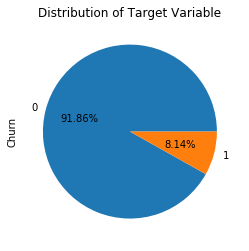

In [45]:
#Plotting pie chart to see the percentage of converted and non-converted leads
highValueDf['Churn'].value_counts().plot.pie(autopct='%1.2f%%',shadow=False)
plt.title("Distribution of Target Variable")
plt.show()

We can see that the data is imbalanced. We will handle it later during modelling.

In [46]:
# Removing the columns for the september month
colsWith9 = [col for col in highValueDf.columns if col.endswith('_9')]
highValueDf.drop(columns=colsWith9,inplace=True)

In [47]:
highValueDf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30001 entries, 7000842753 to 7000498689
Data columns (total 181 columns):
circle_id                  30001 non-null int64
arpu_6                     30001 non-null float64
arpu_7                     30001 non-null float64
arpu_8                     30001 non-null float64
onnet_mou_6                30001 non-null float64
onnet_mou_7                30001 non-null float64
onnet_mou_8                30001 non-null float64
offnet_mou_6               30001 non-null float64
offnet_mou_7               30001 non-null float64
offnet_mou_8               30001 non-null float64
roam_ic_mou_6              30001 non-null float64
roam_ic_mou_7              30001 non-null float64
roam_ic_mou_8              30001 non-null float64
roam_og_mou_6              30001 non-null float64
roam_og_mou_7              30001 non-null float64
roam_og_mou_8              30001 non-null float64
loc_og_t2t_mou_6           30001 non-null float64
loc_og_t2t_mou_7           3

In [48]:
# Checking the unique values of circle id
highValueDf.circle_id.value_counts()

109    30001
Name: circle_id, dtype: int64

In [49]:
# As it consists of a single value for all the rows, it will not contribute towards modelling
# Thus dropping it
highValueDf.drop(columns=['circle_id'],inplace=True)

In [50]:
#Finding columns which have only one unique value
print ([col for col in highValueDf.columns if len(highValueDf[col].unique())==1])

['std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8']


In [51]:
#Dropping columns with only one unique value as they have no variance
highValueDf.drop(columns=['std_og_t2c_mou_6','std_og_t2c_mou_7','std_og_t2c_mou_8','std_ic_t2o_mou_6',
                          'std_ic_t2o_mou_7','std_ic_t2o_mou_8'],inplace=True)
highValueDf.shape

(30001, 174)

In [52]:
#creating a list of categorical columns
categoricalCols = ['night_pck_user_6','night_pck_user_7','night_pck_user_8',
                              'fb_user_6','fb_user_7','fb_user_8','Churn','net_tenure']

## STEP 3: Exploratory Data Analysis

In [53]:
# Creating a function to plot bar plots for the categorical columns
def PlotCategories(var):
    fig=plt.figure(figsize=(15,6))
    ax1 = fig.add_subplot(121)
    ax2 = fig.add_subplot(122)

    ax1.set_title('% Rate of churn for ' + '%s' %var)
    ax2.set_title('% Rate of non churn for '+'%s' %var)

    ax1.set_xlabel(var)
    ax2.set_xlabel(var)
    ax1.set_ylabel('Percentage')
    ax2.set_ylabel('Percentage')

    cDf=pd.crosstab(highValueDf[var],highValueDf['Churn']).apply(lambda r: r*100/r.sum(), axis=1)
    dDf=cDf[1].sort_values(ascending=False)
    ndDf=cDf[0].sort_values(ascending=False)

    p1=sns.barplot(y=dDf.values,x=dDf.index.tolist(), ax=ax1)
    p1.set_xticklabels(p1.get_xticklabels(),rotation=90)

    p2=sns.barplot(y=ndDf.values,x=ndDf.index.tolist(), ax=ax2)
    p2.set_xticklabels(p2.get_xticklabels(),rotation=90)

    for p in p1.patches:
        p1.annotate(format(p.get_height(), '.1f'), (p.get_x() + p.get_width() / 2., p.get_height()),ha = 'center', va = 'center', xytext = (0, 3), textcoords = 'offset points')
    for p in p2.patches:
        p2.annotate(format(p.get_height(), '.1f'), (p.get_x() + p.get_width() / 2., p.get_height()),ha = 'center', va = 'center', xytext = (0, 3), textcoords = 'offset points')

    fig.tight_layout()
    plt.show()

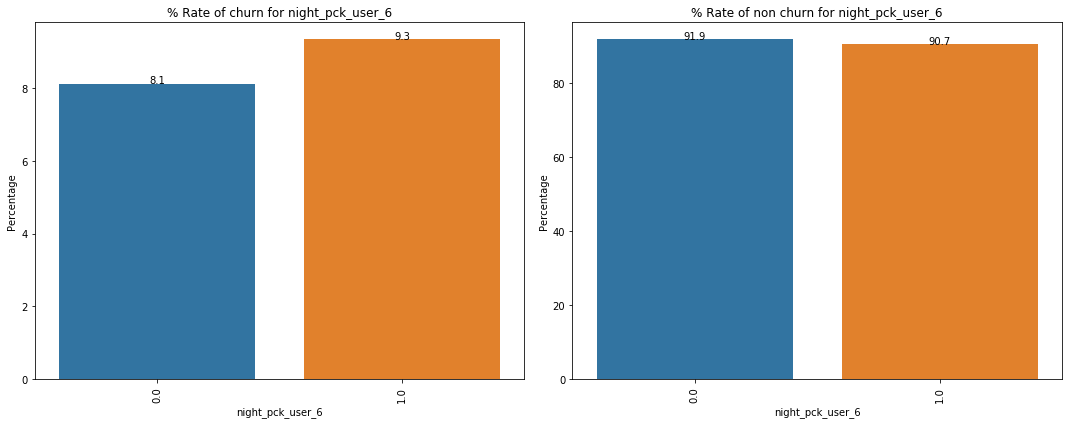

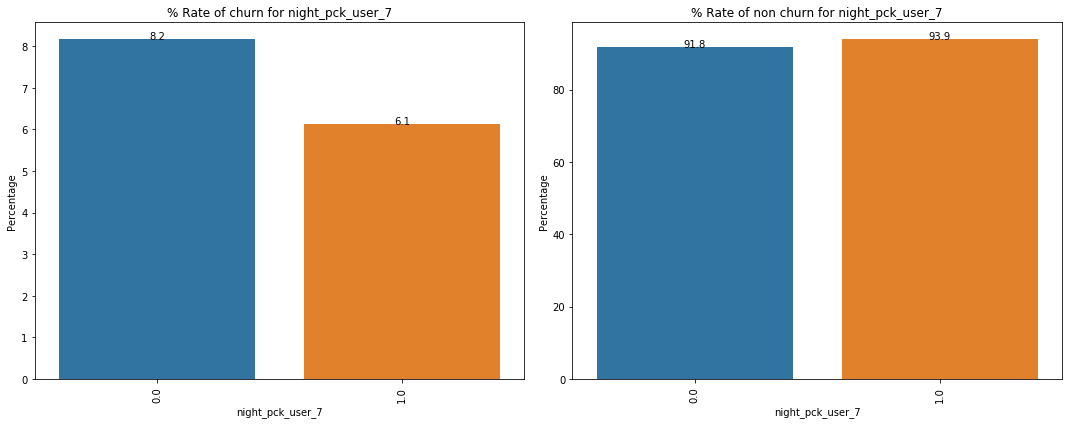

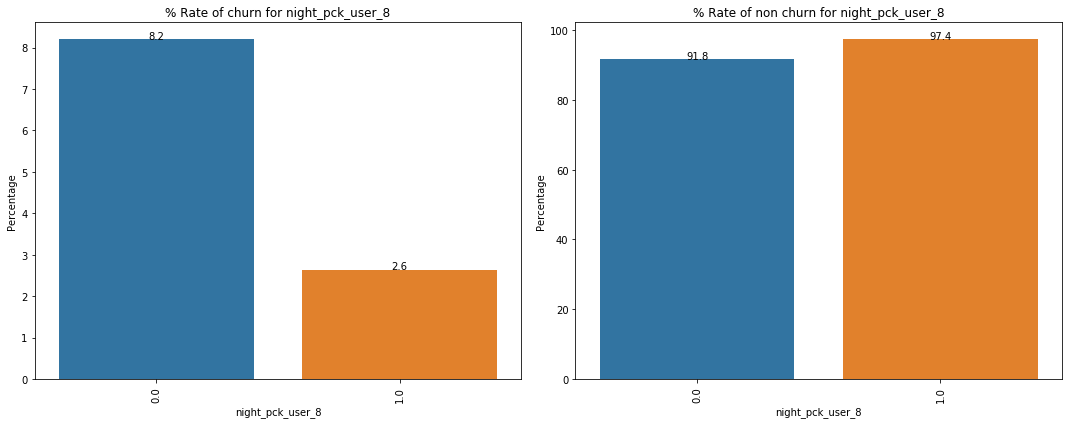

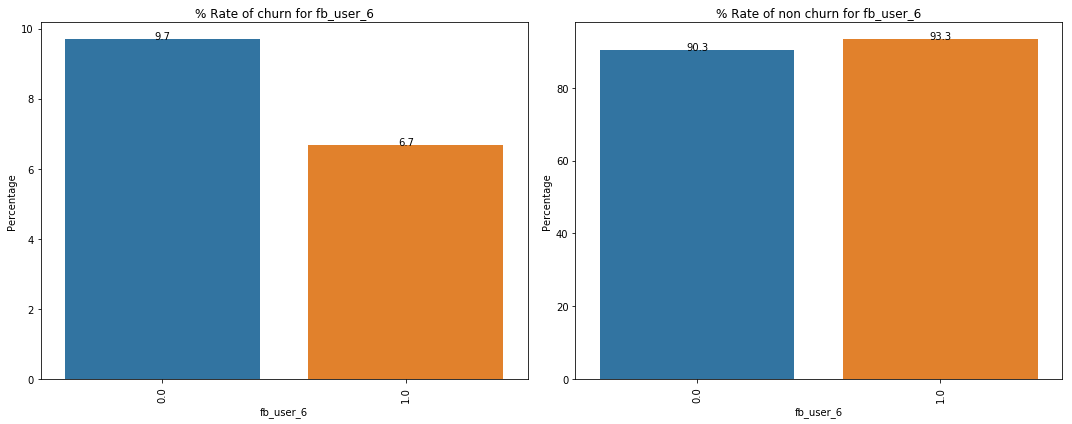

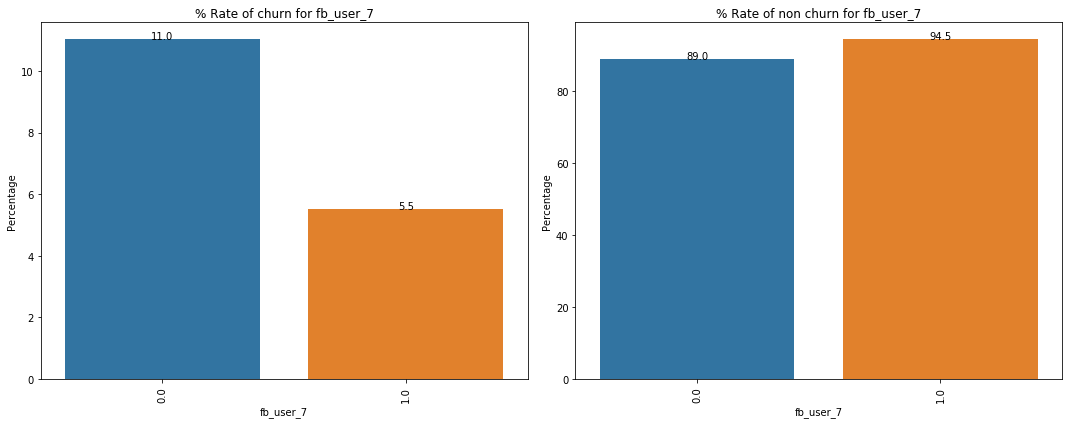

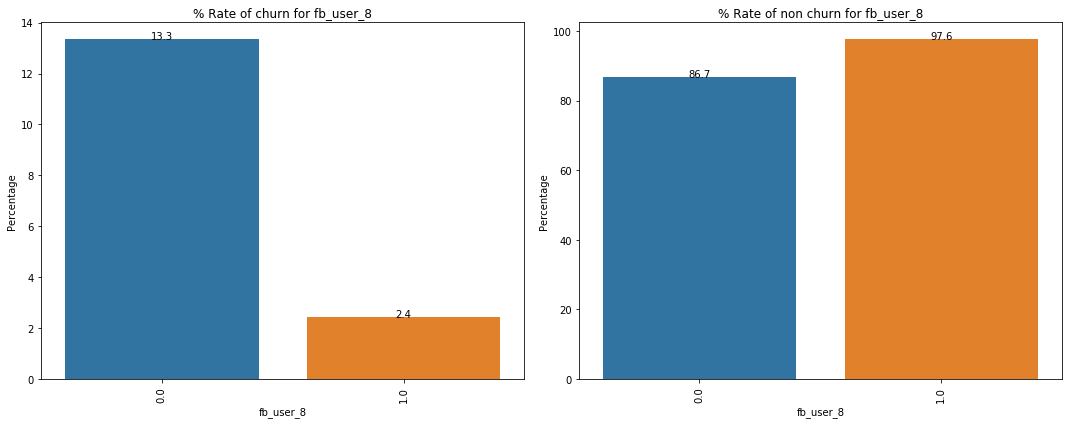

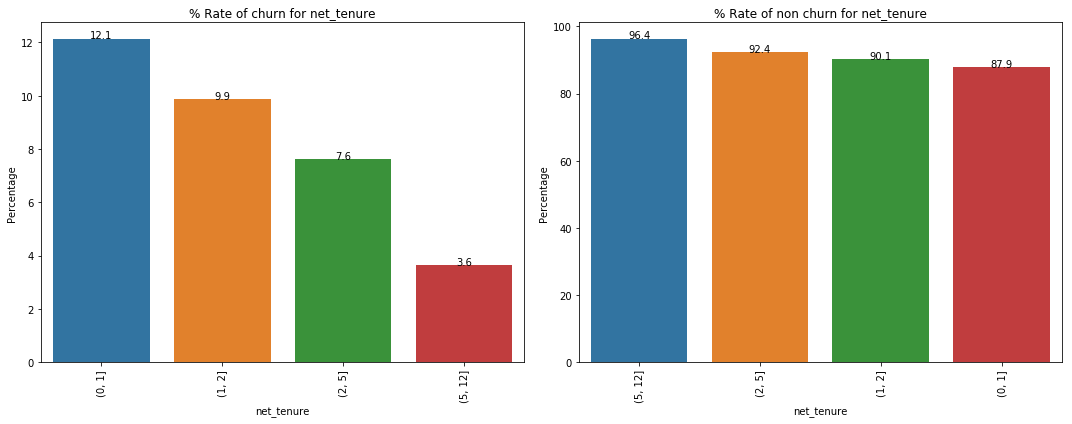

In [54]:
for col in categoricalCols:
    if(col=='Churn'):
        continue
    PlotCategories(col)

#### INFERENCE:
1. Customers who opted for schemes to use during specific night hours only were more likely to churn then those who did not opt for the night pack in the month of June.
2. However, in the month of July, customers who did not opt for a night pack were more likely to churn with a churn rate at 8.2%.
3. In the month of August, the rate of churn for those who opted for a night pack further decreased as compared to July. The customers who did not opt for a night pack were more likely to churn at a rate of 8.2%.
4. Customers who availed schemes which allowed them to use facebook or social networking sites are less likely to churn as compared to those who do not opt for any such scheme.This trend is the same across the months of June, July and August with the churn rate being the least in the month of August for those opting for this scheme.
5. Customers who have used the operator T network for a period of 0 to 1 year have the highest churn rate at 12.1%. The company should focus more on these customers. The customers who have used the network for more than 5 years have a very low churn rate and are least likely to switch to another operator.

In [55]:
# Creating a function to plot the box plots of numerical columns
def PlotNumerical(var):
    
    fig, ax=plt.subplots(nrows=1,ncols=2, figsize=(15,6))
    
    # Creating a box plot and distplot 
    ax[0].set_title('Box-plot for ' + var, fontsize=10)
    ax[1].set_title('Distplot', fontsize=10)
    s1=sns.boxplot(x='Churn',y=var,data=highValueDf,ax=ax[0])
    churn_0 = highValueDf.loc[highValueDf['Churn'] == 0]
    churn_1 = highValueDf.loc[highValueDf['Churn'] == 1]
    s2=sns.distplot(churn_0[[var]],ax=ax[1])
    s2=sns.distplot(churn_1[[var]],ax=ax[1])
    plt.show()

arpu_6


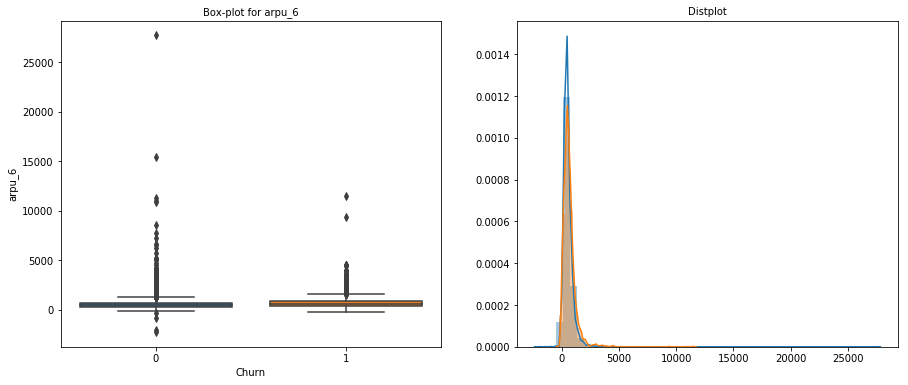

arpu_7


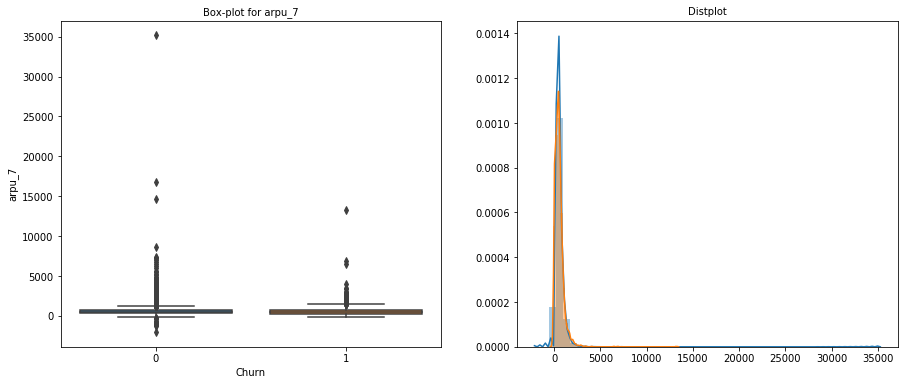

arpu_8


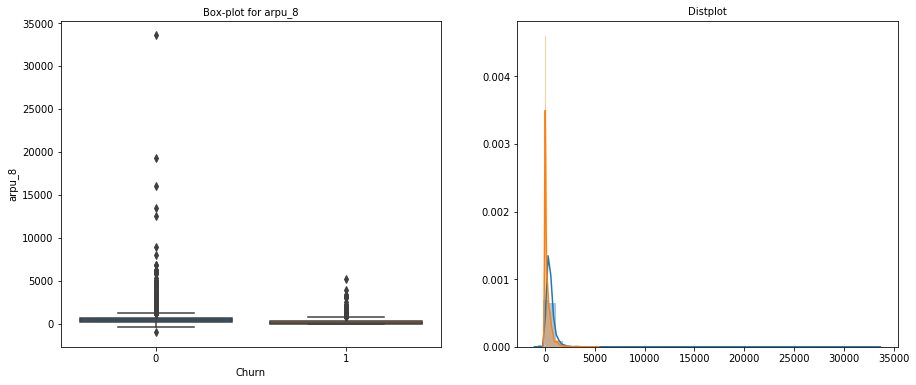

onnet_mou_6


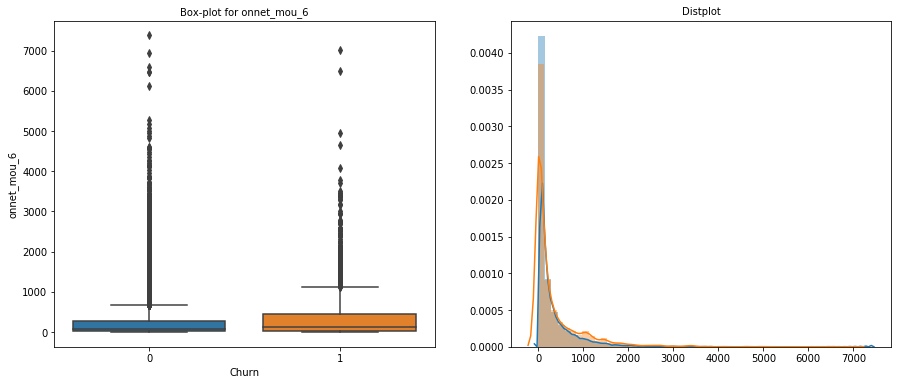

onnet_mou_7


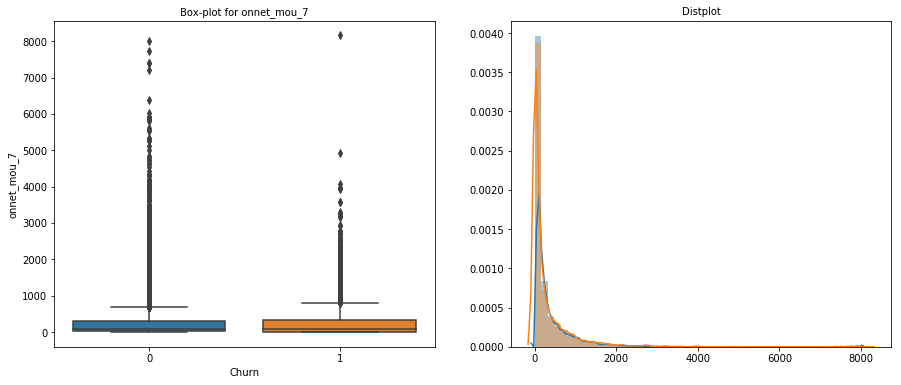

onnet_mou_8


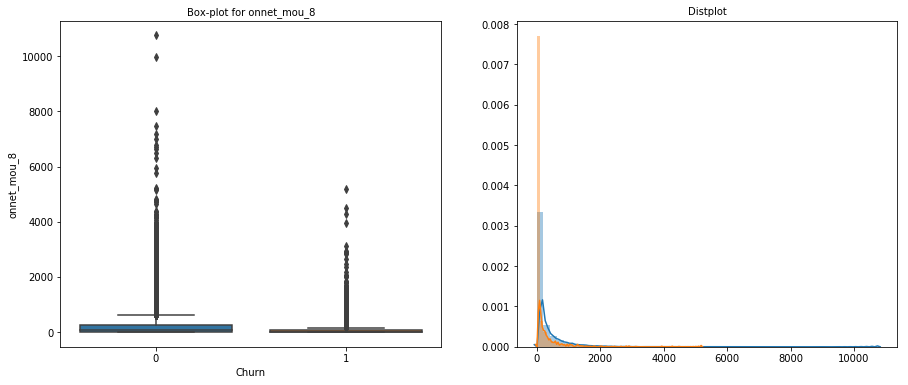

offnet_mou_6


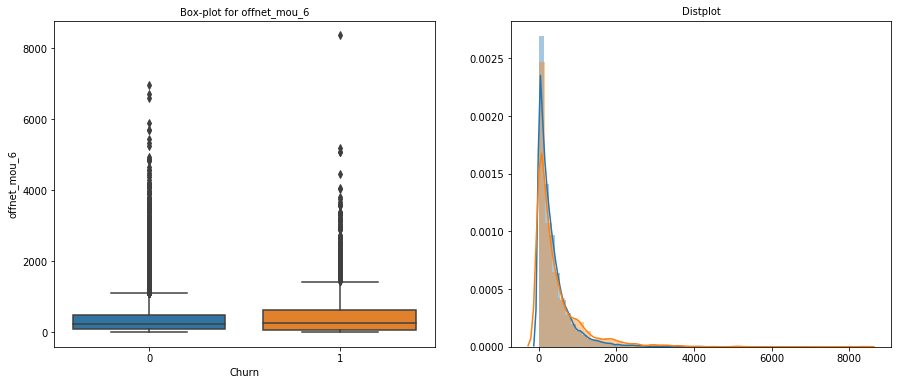

offnet_mou_7


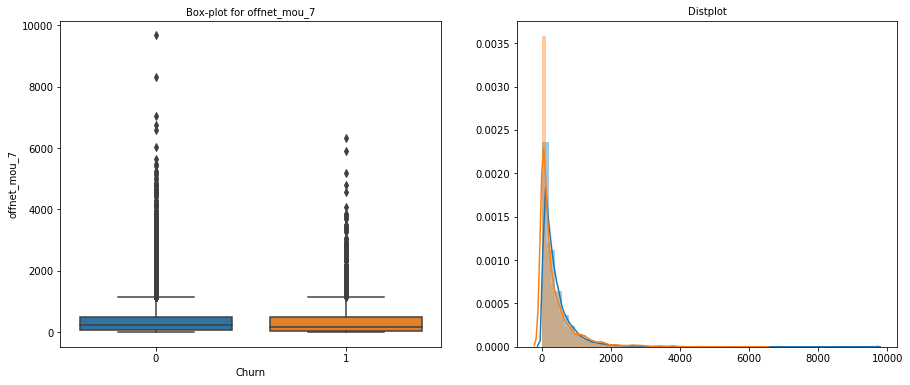

offnet_mou_8


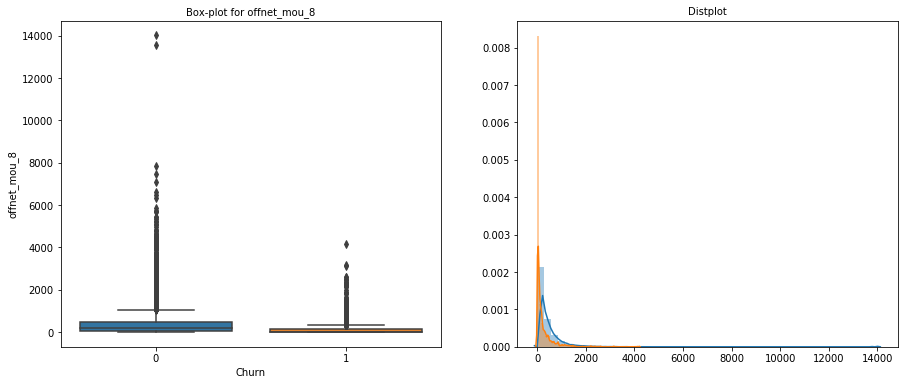

roam_ic_mou_6


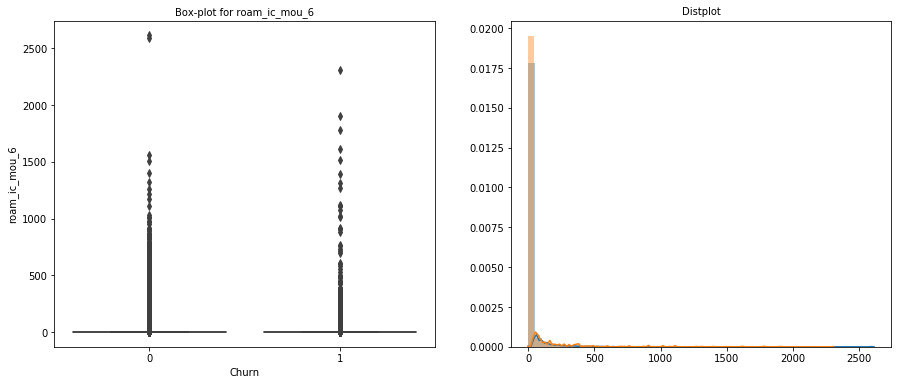

roam_ic_mou_7


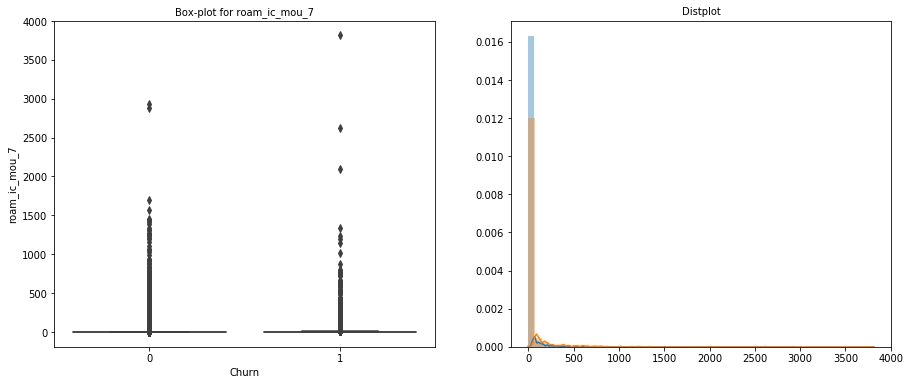

roam_ic_mou_8


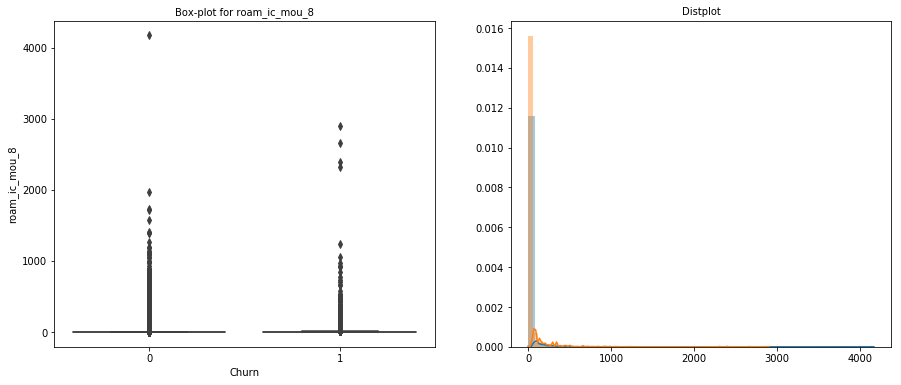

roam_og_mou_6


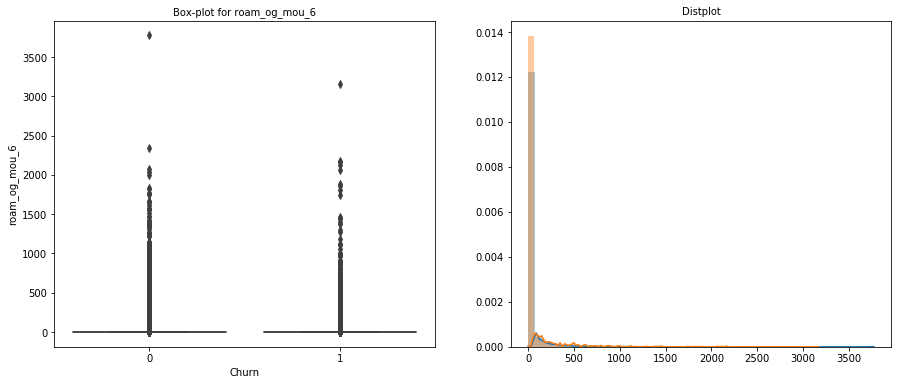

roam_og_mou_7


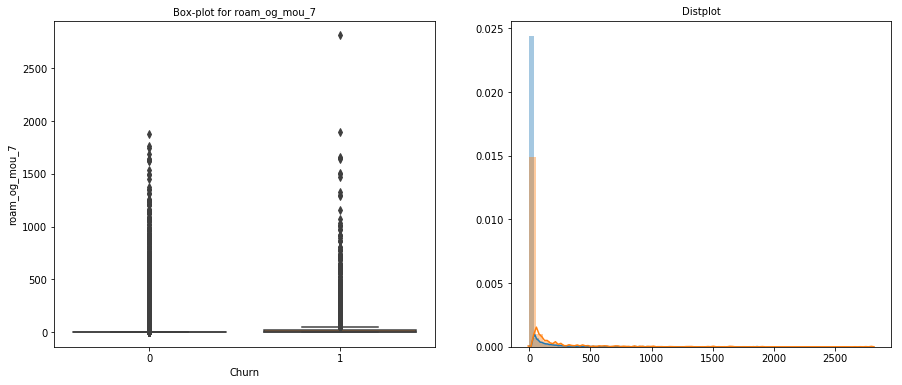

roam_og_mou_8


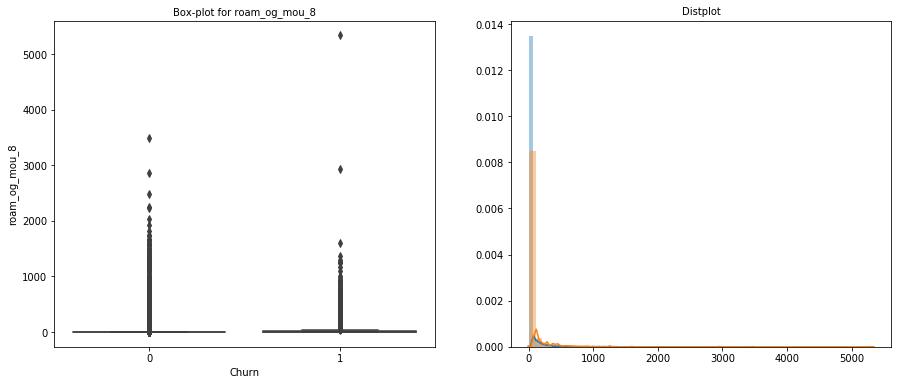

loc_og_t2t_mou_6


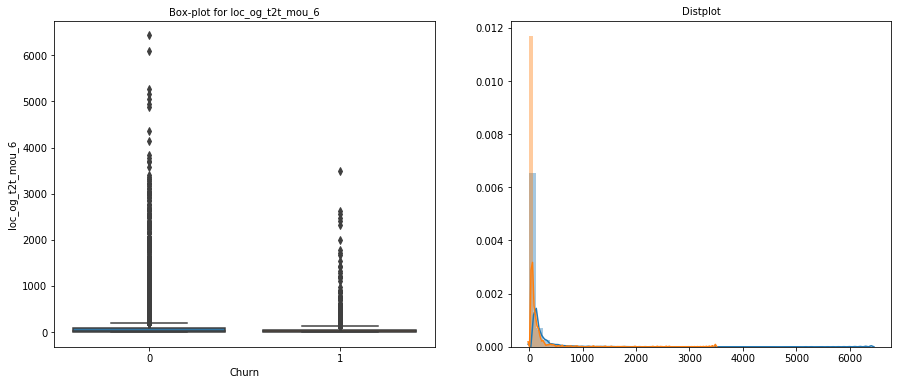

loc_og_t2t_mou_7


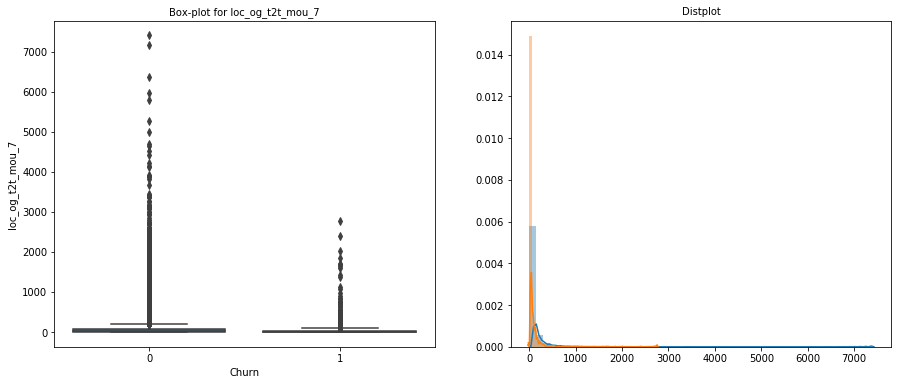

loc_og_t2t_mou_8


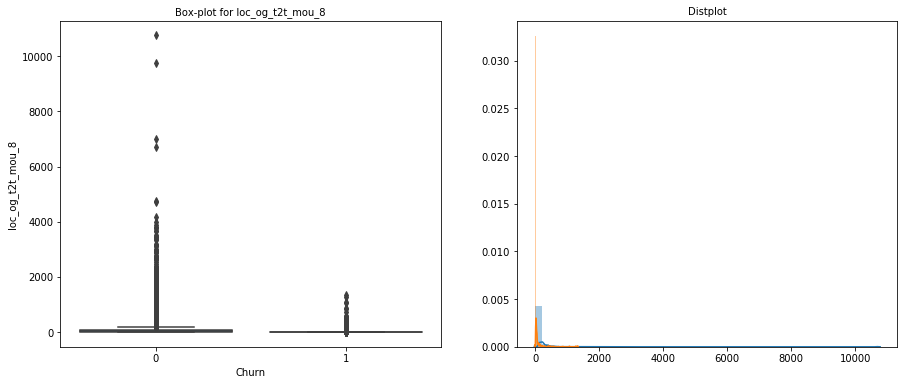

loc_og_t2m_mou_6


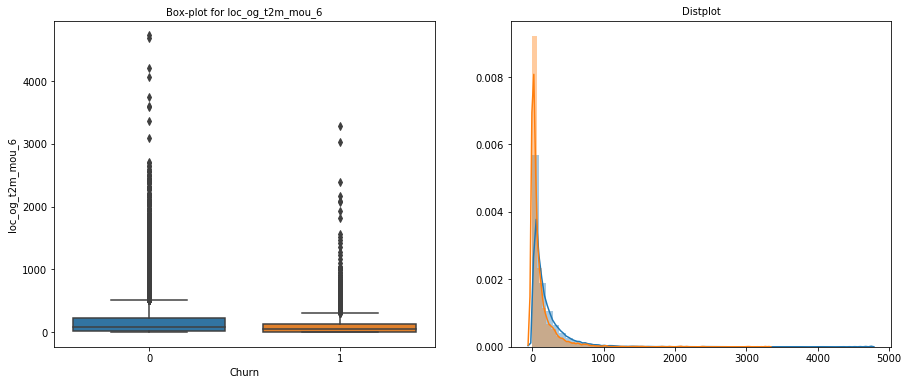

loc_og_t2m_mou_7


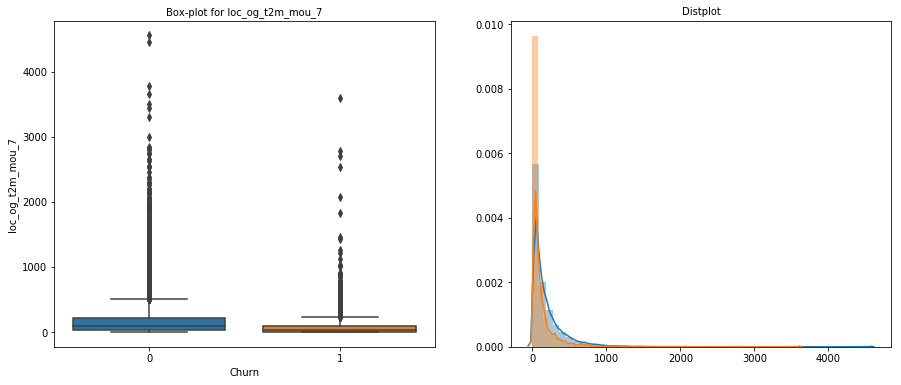

loc_og_t2m_mou_8


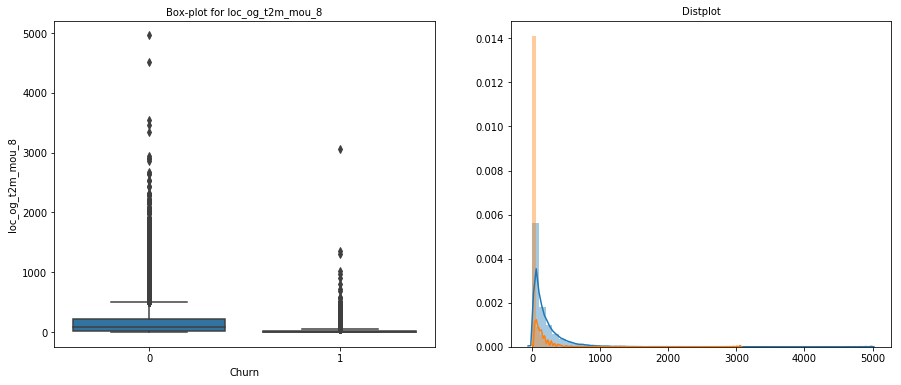

loc_og_t2f_mou_6


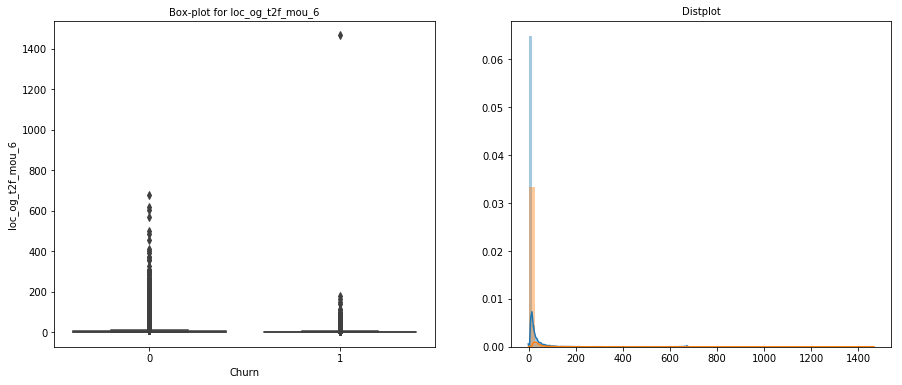

loc_og_t2f_mou_7


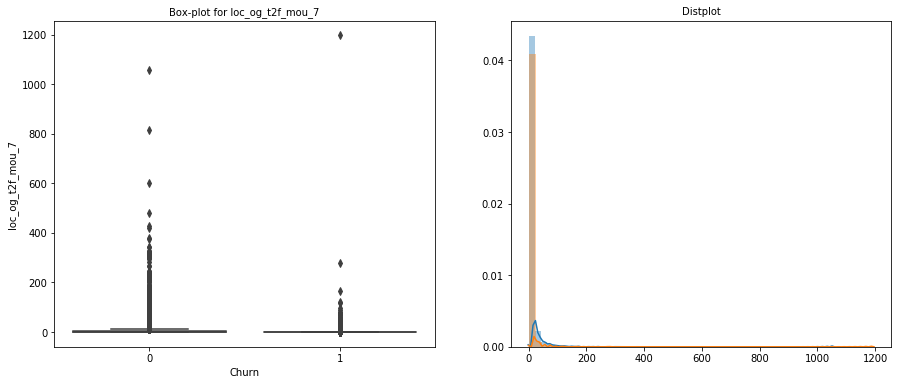

loc_og_t2f_mou_8


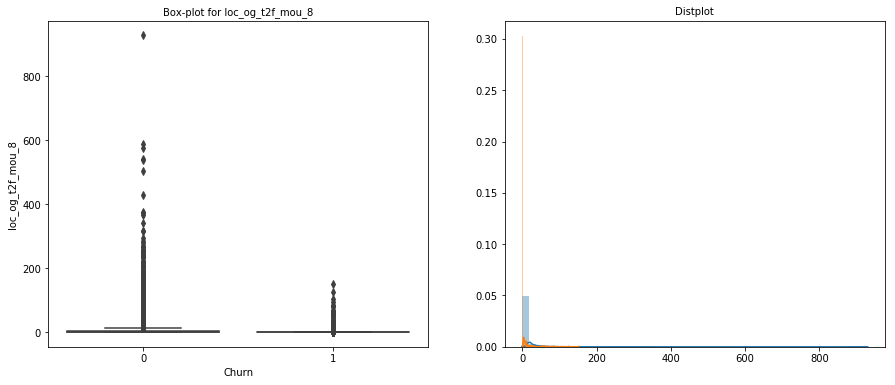

loc_og_t2c_mou_6


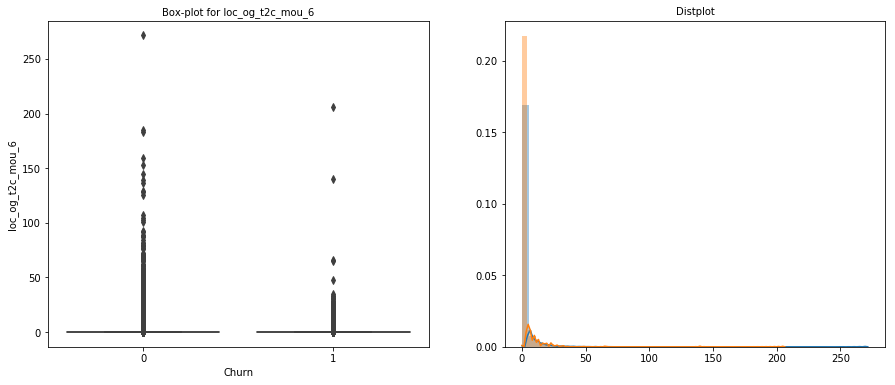

loc_og_t2c_mou_7


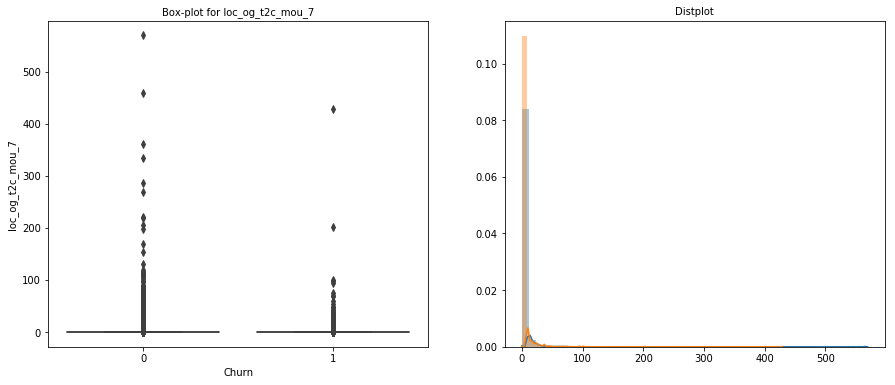

loc_og_t2c_mou_8


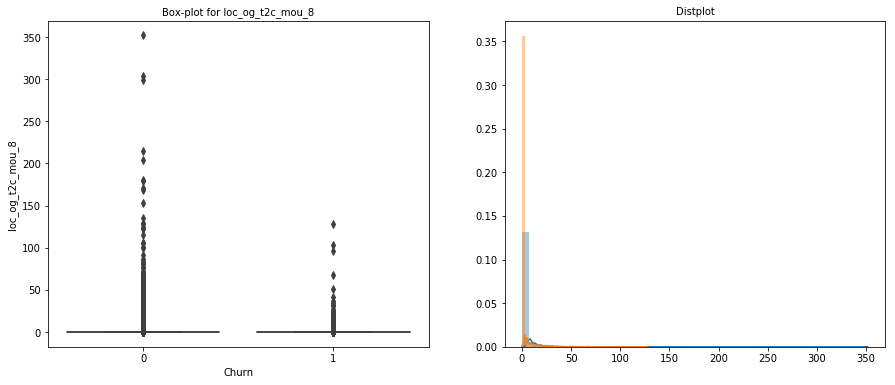

loc_og_mou_6


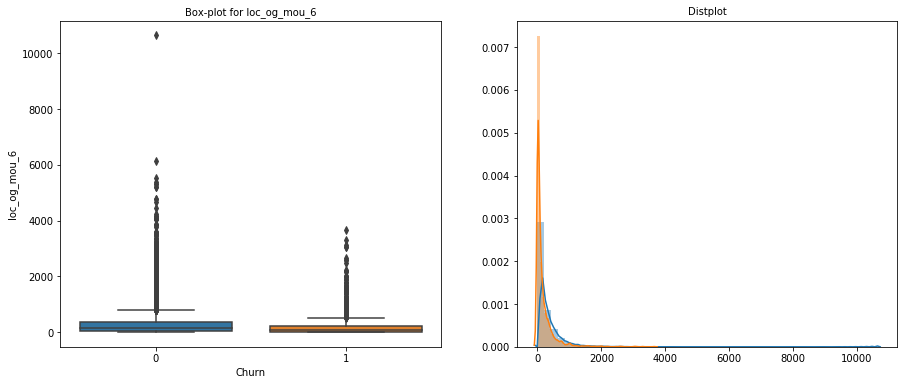

loc_og_mou_7


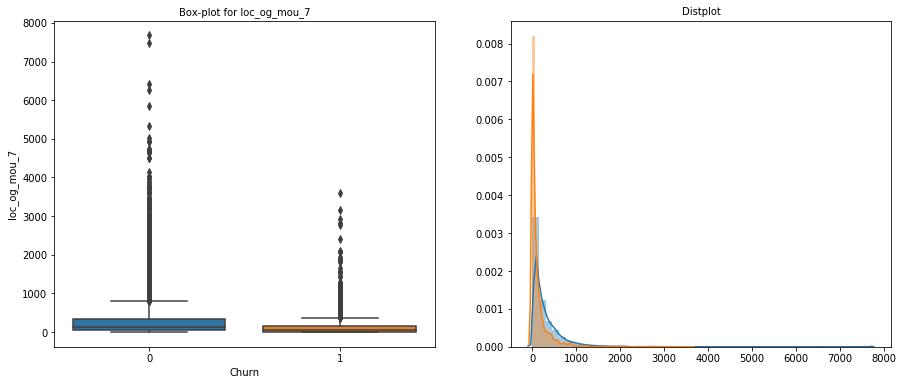

loc_og_mou_8


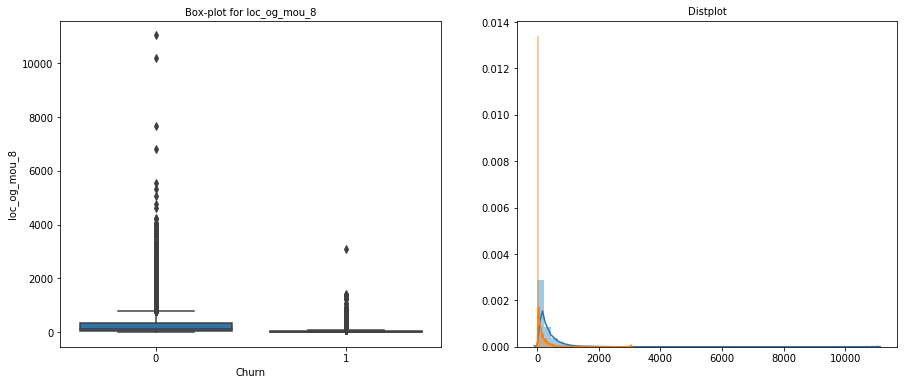

std_og_t2t_mou_6


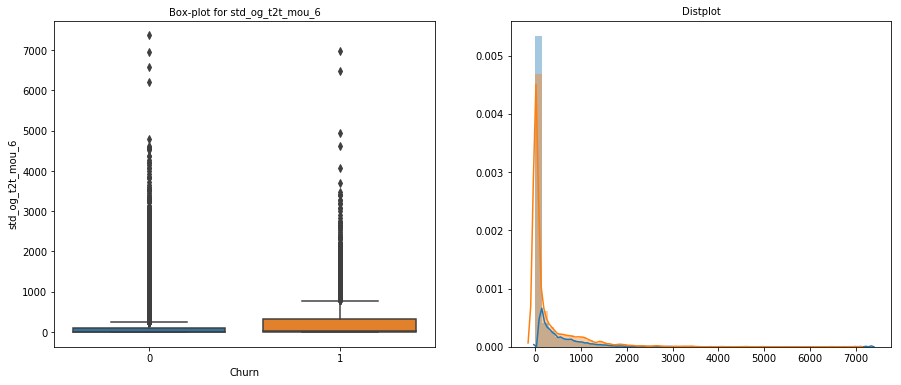

std_og_t2t_mou_7


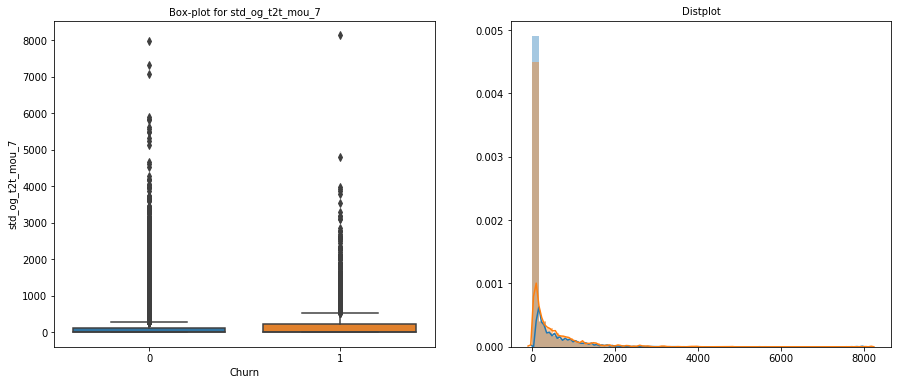

std_og_t2t_mou_8


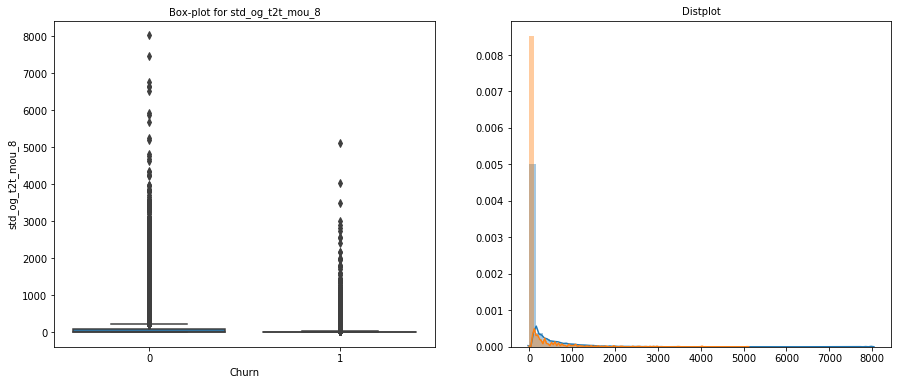

std_og_t2m_mou_6


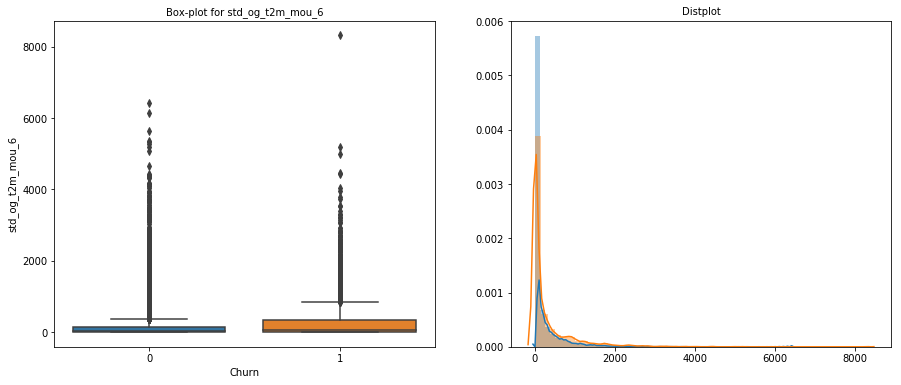

std_og_t2m_mou_7


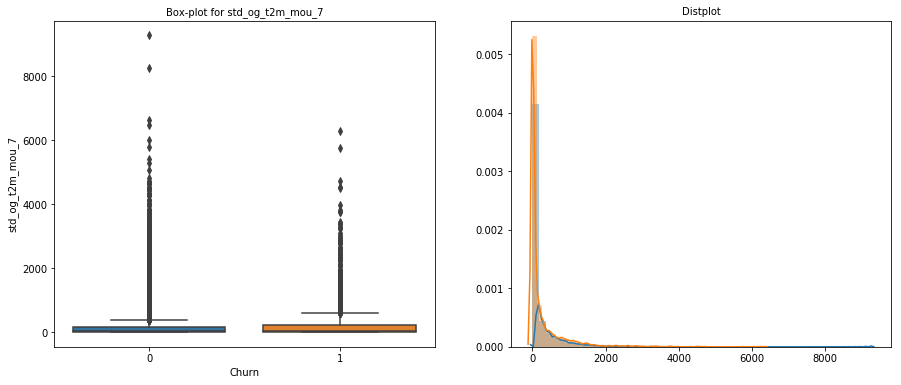

std_og_t2m_mou_8


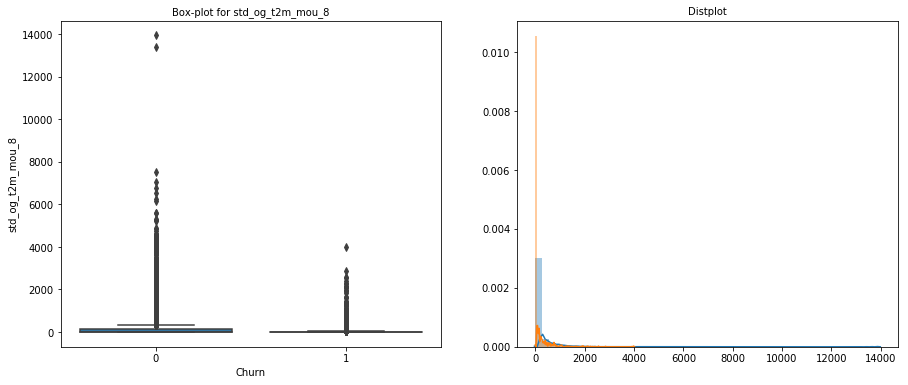

std_og_t2f_mou_6


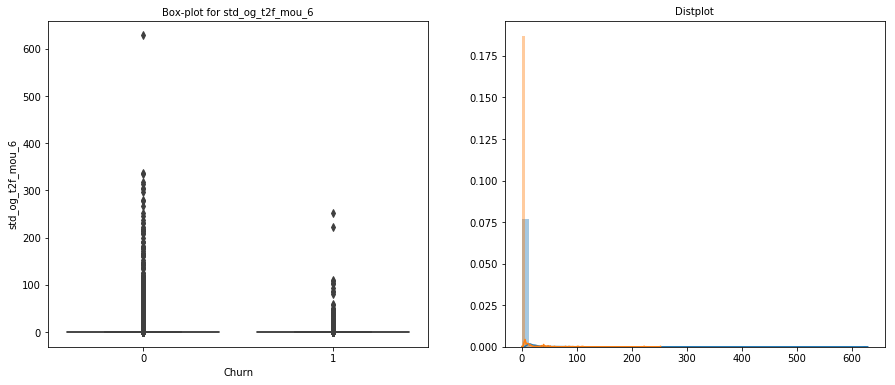

std_og_t2f_mou_7


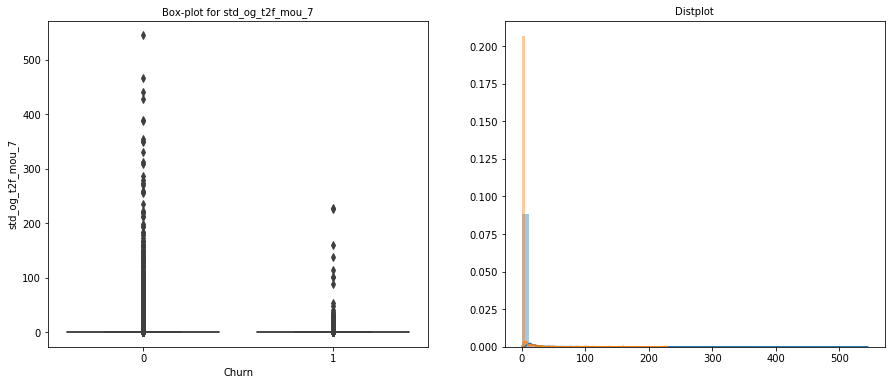

std_og_t2f_mou_8


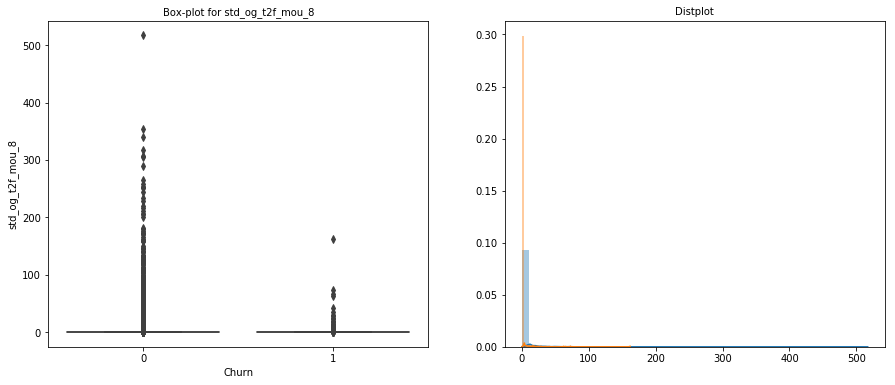

std_og_mou_6


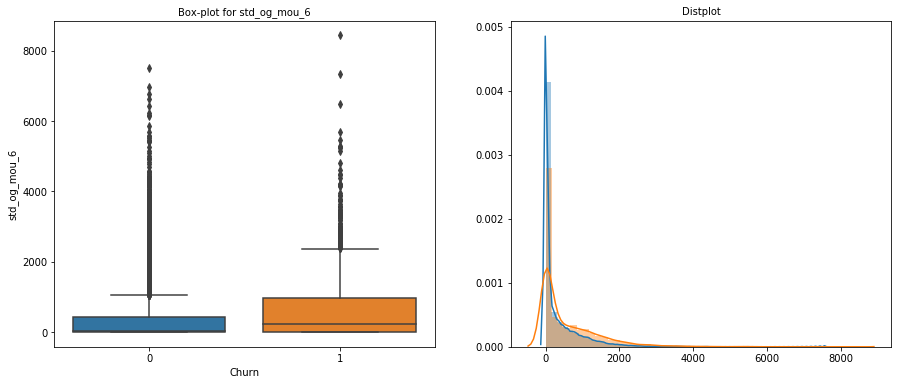

std_og_mou_7


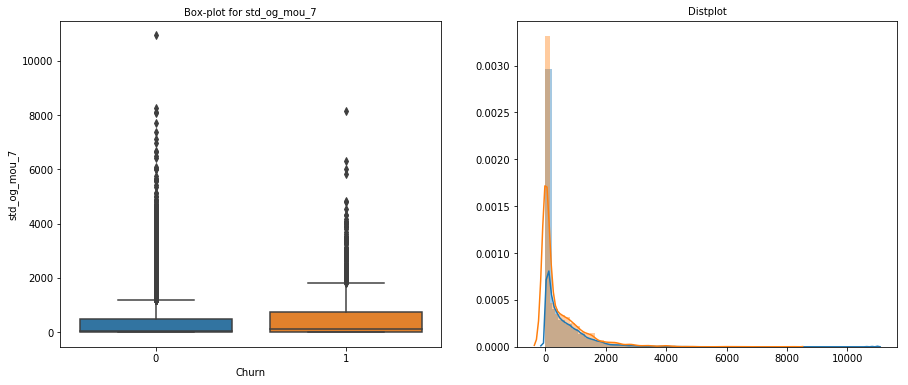

std_og_mou_8


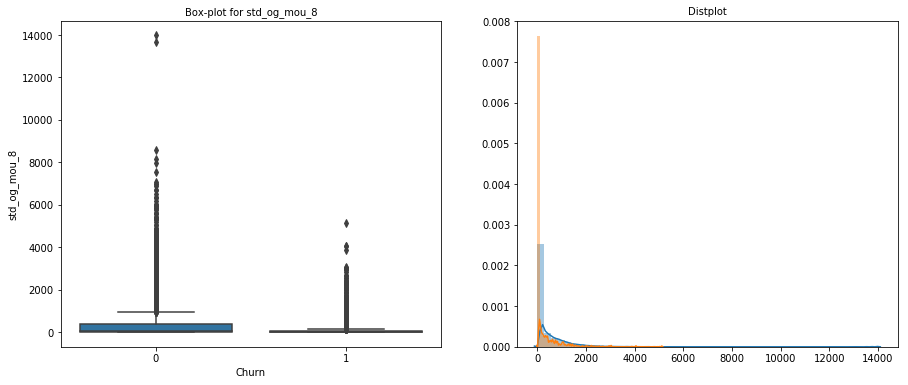

isd_og_mou_6


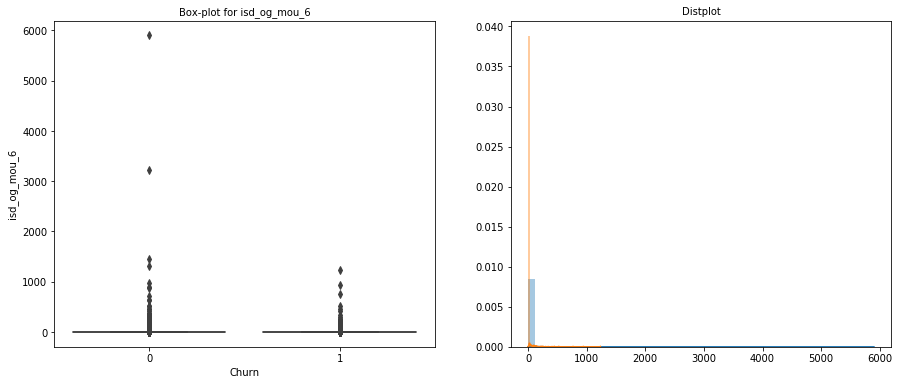

isd_og_mou_7


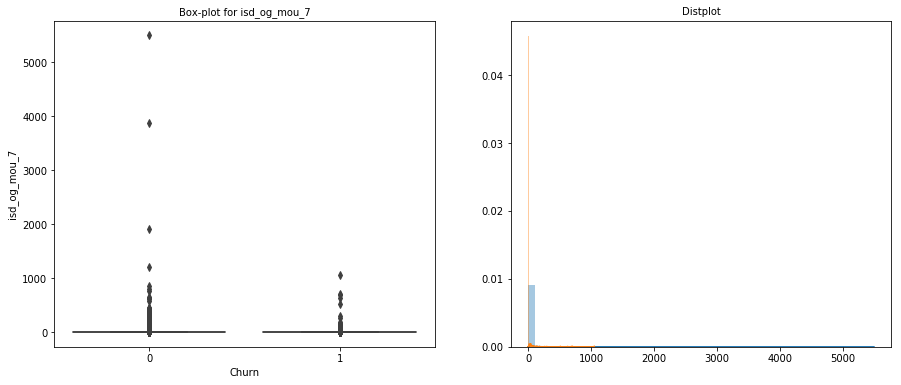

isd_og_mou_8


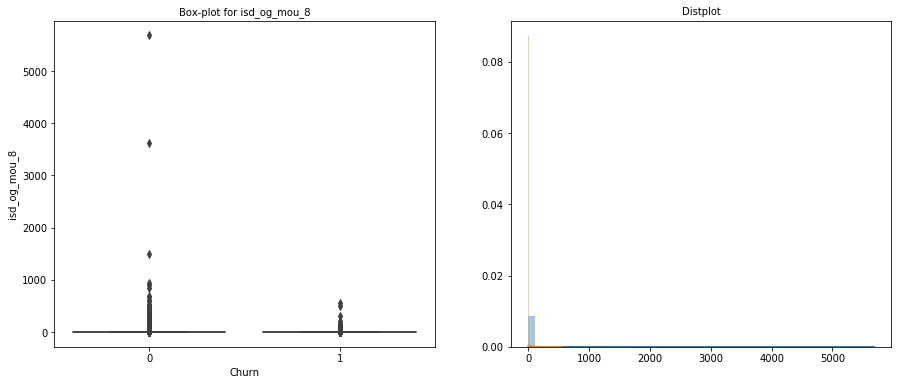

spl_og_mou_6


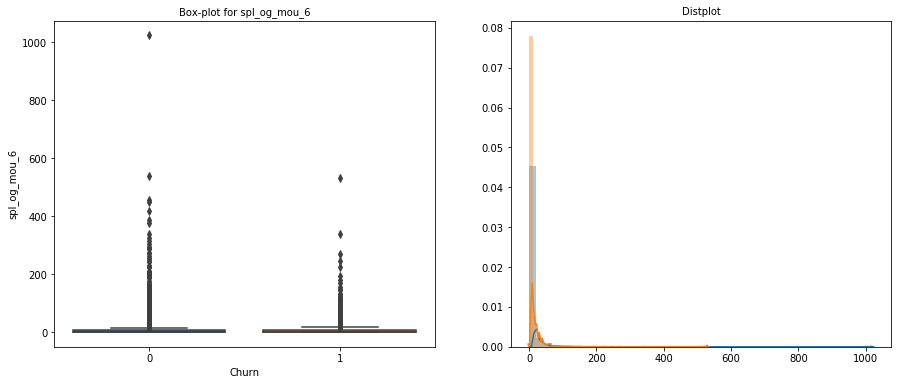

spl_og_mou_7


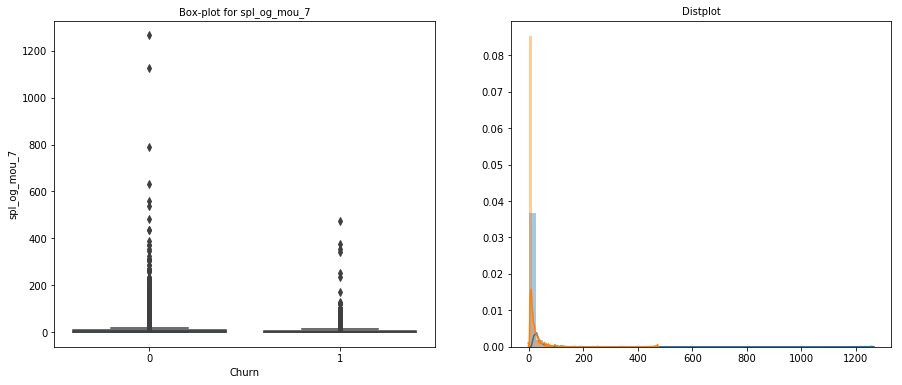

spl_og_mou_8


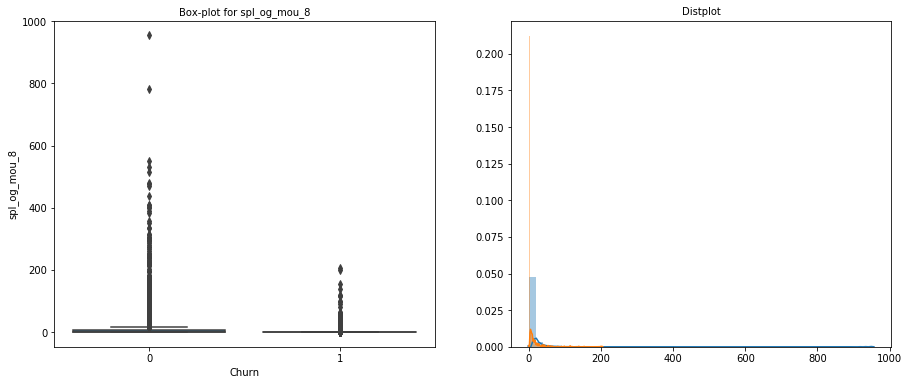

og_others_6


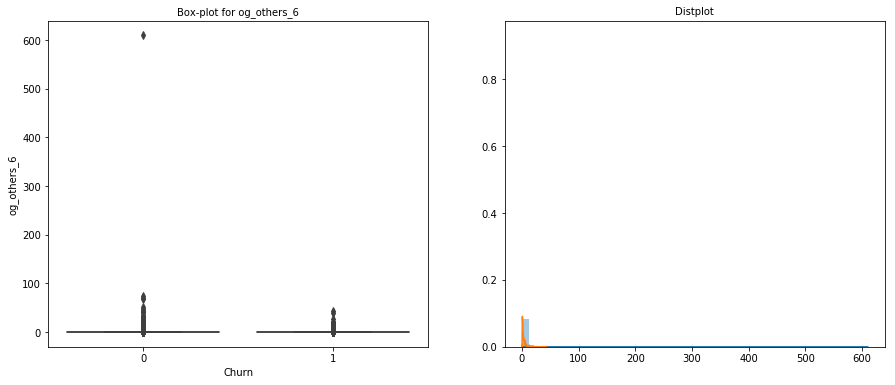

og_others_7


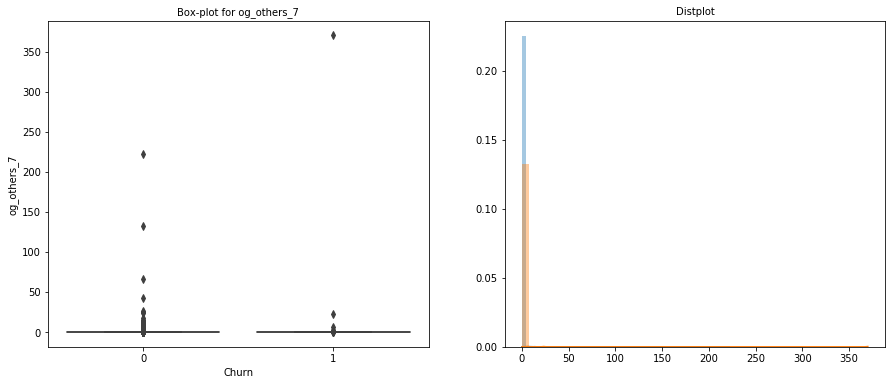

og_others_8


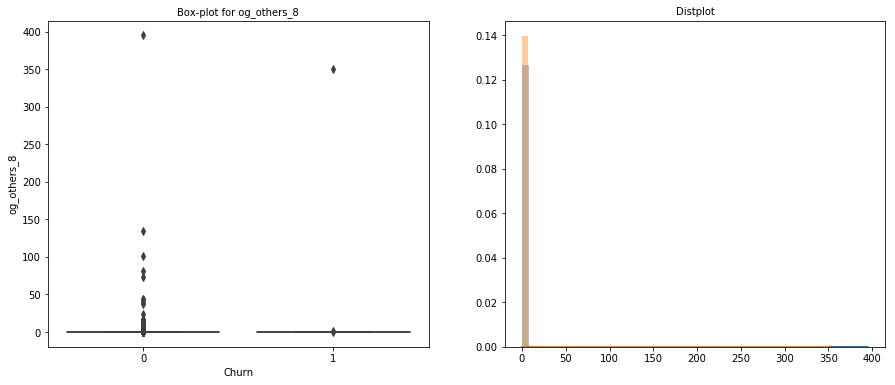

total_og_mou_6


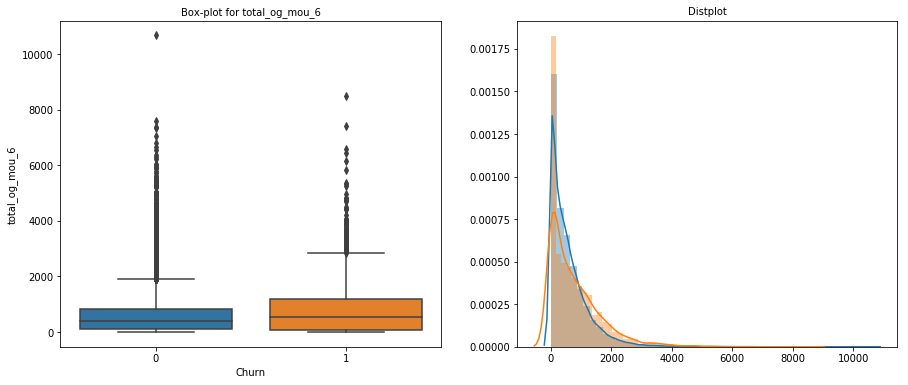

total_og_mou_7


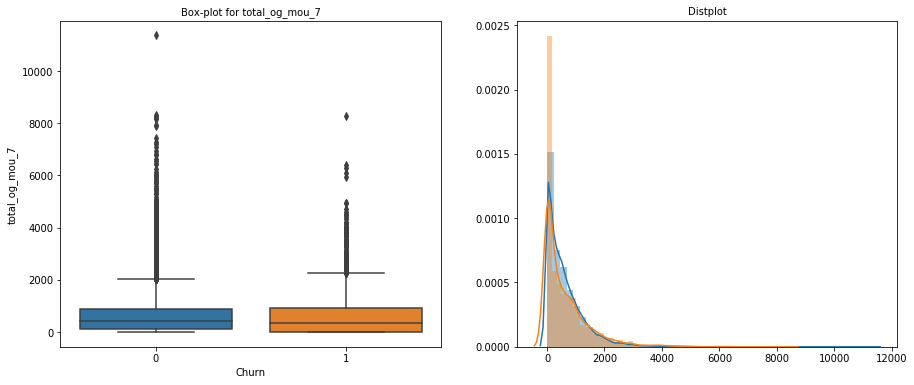

total_og_mou_8


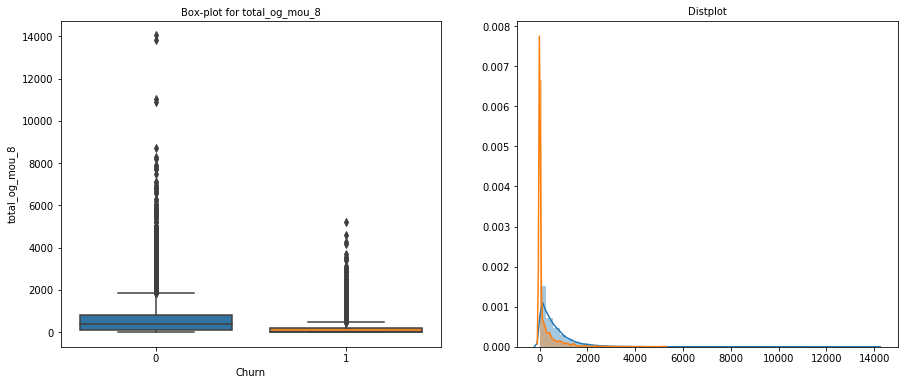

loc_ic_t2t_mou_6


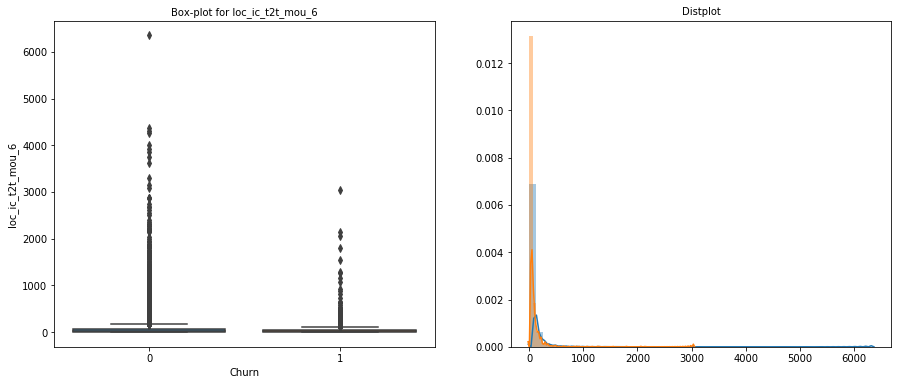

loc_ic_t2t_mou_7


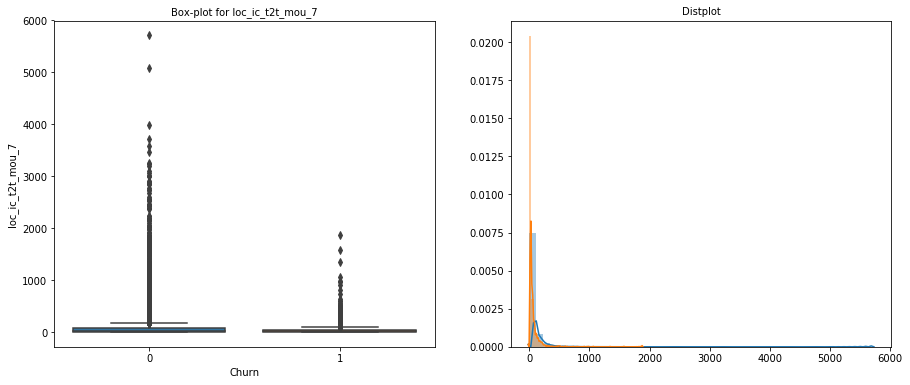

loc_ic_t2t_mou_8


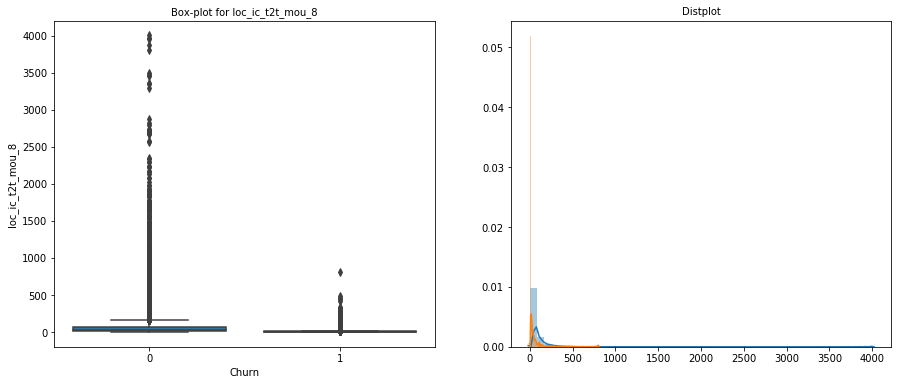

loc_ic_t2m_mou_6


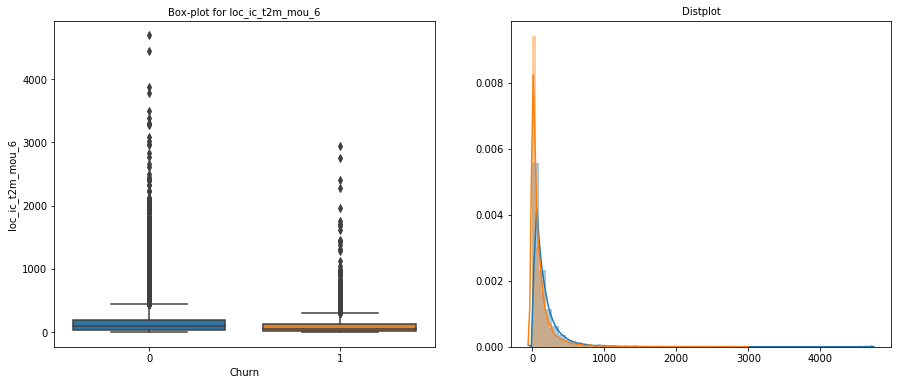

loc_ic_t2m_mou_7


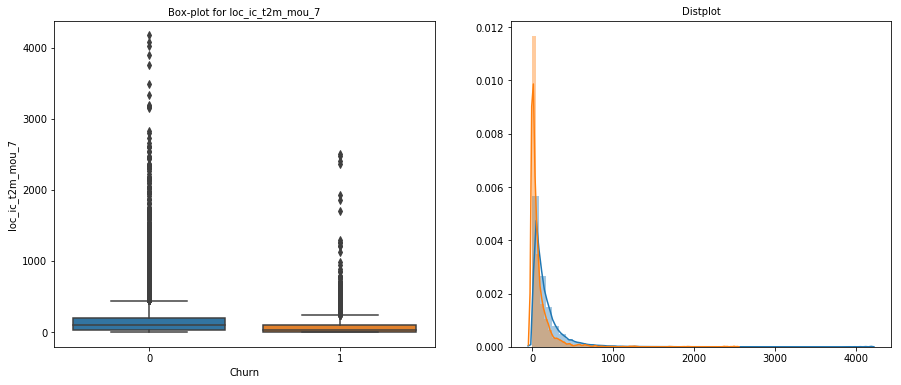

loc_ic_t2m_mou_8


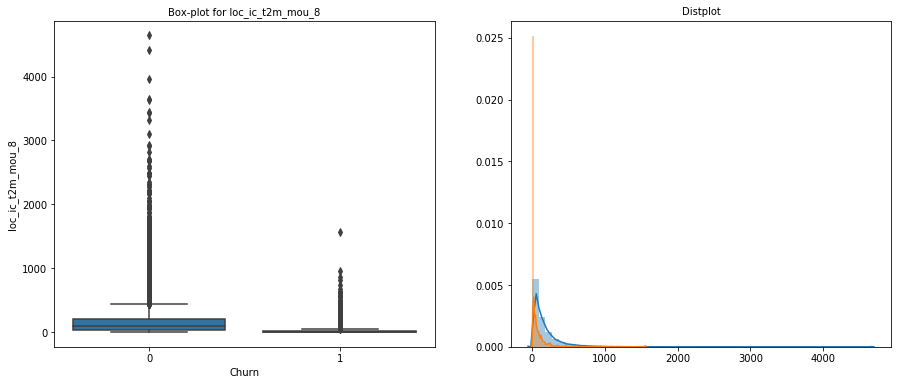

loc_ic_t2f_mou_6


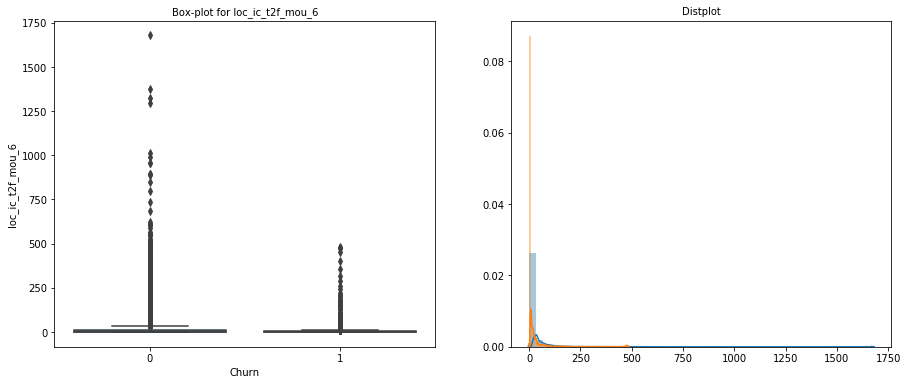

loc_ic_t2f_mou_7


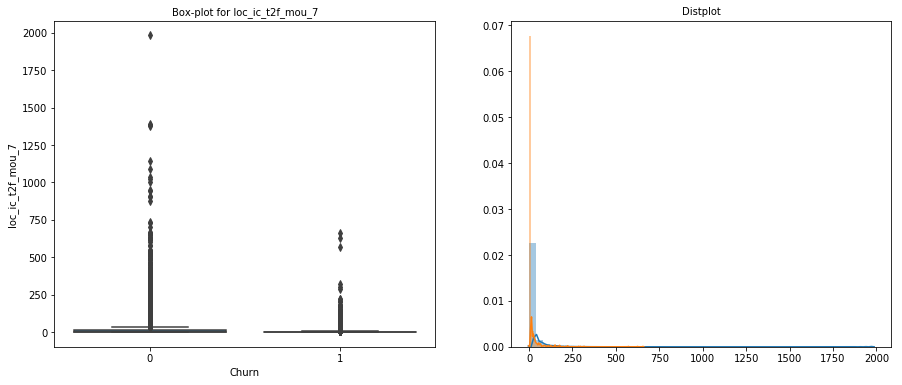

loc_ic_t2f_mou_8


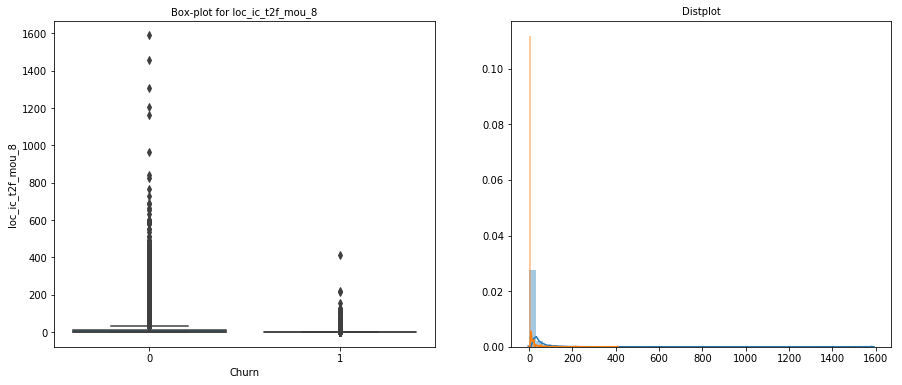

loc_ic_mou_6


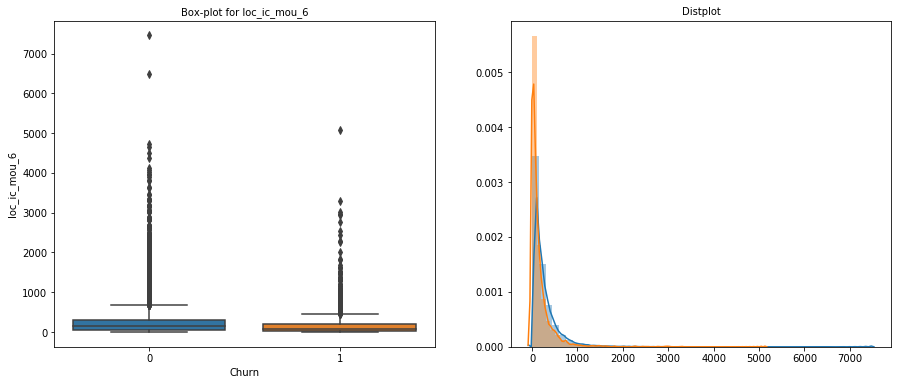

loc_ic_mou_7


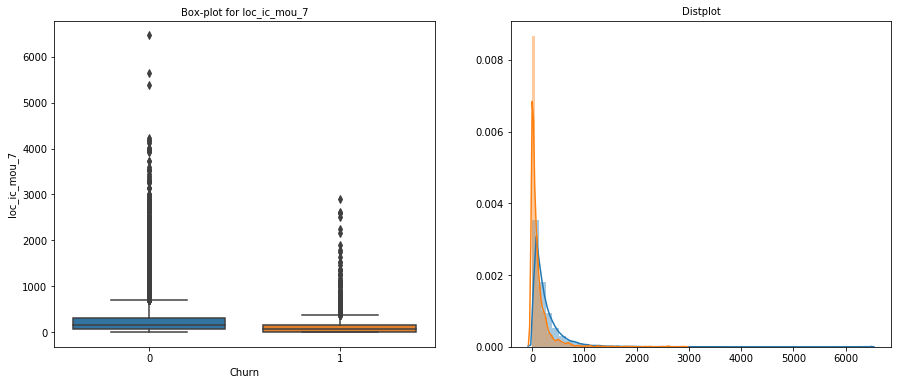

loc_ic_mou_8


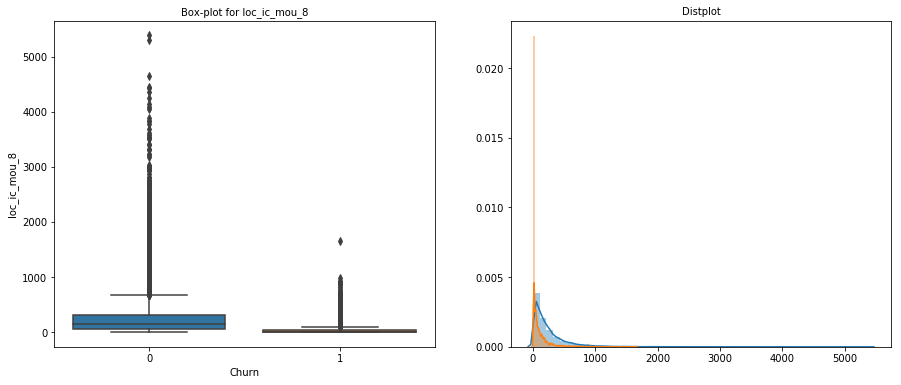

std_ic_t2t_mou_6


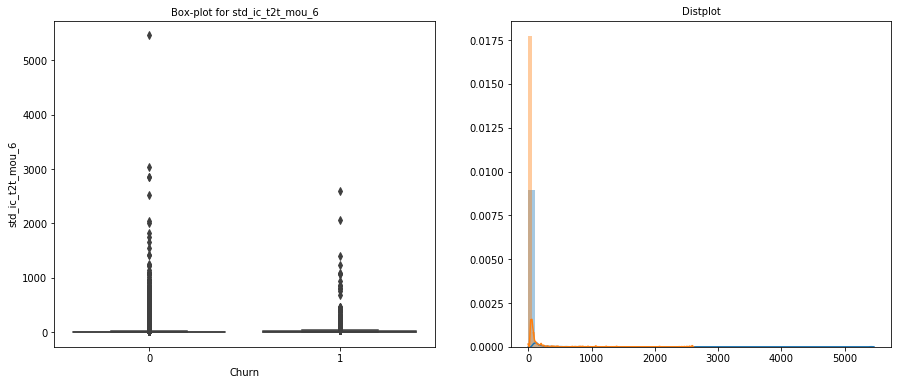

std_ic_t2t_mou_7


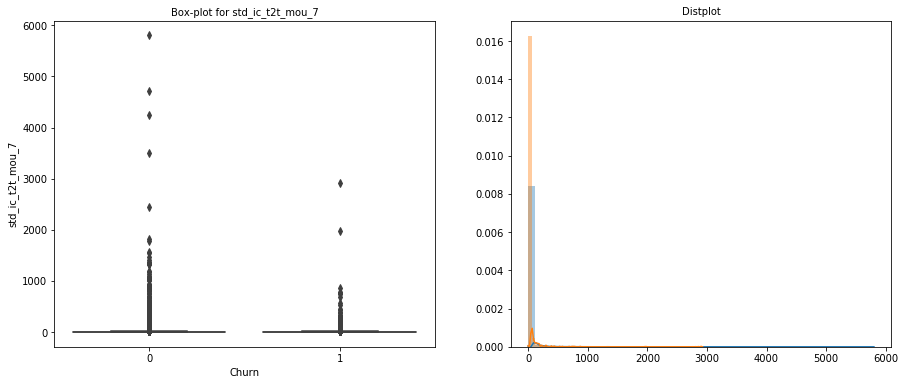

std_ic_t2t_mou_8


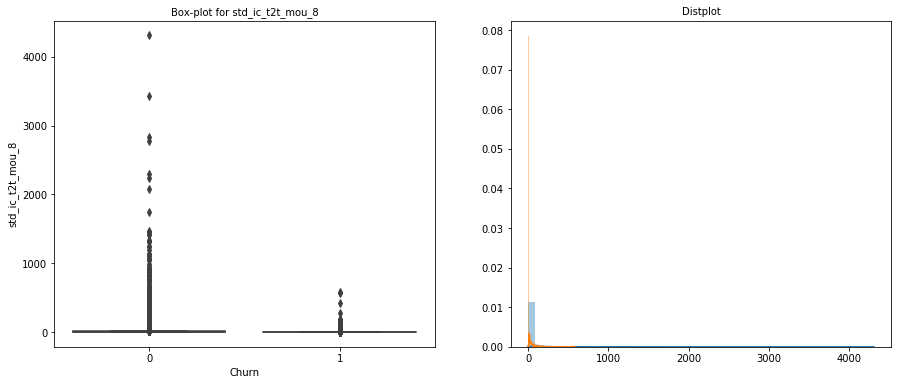

std_ic_t2m_mou_6


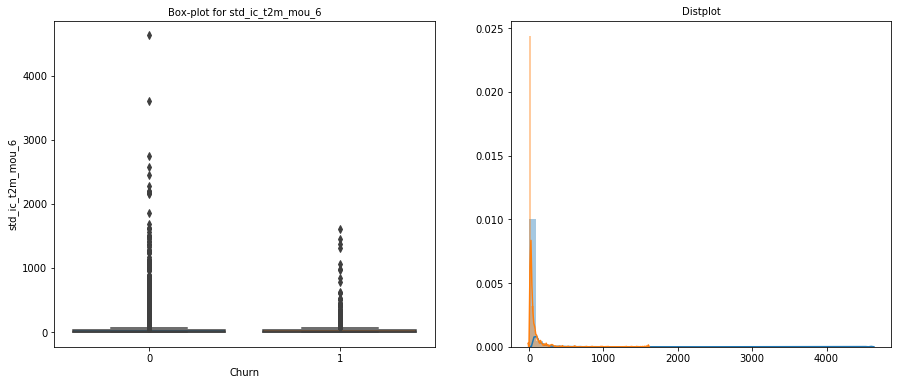

std_ic_t2m_mou_7


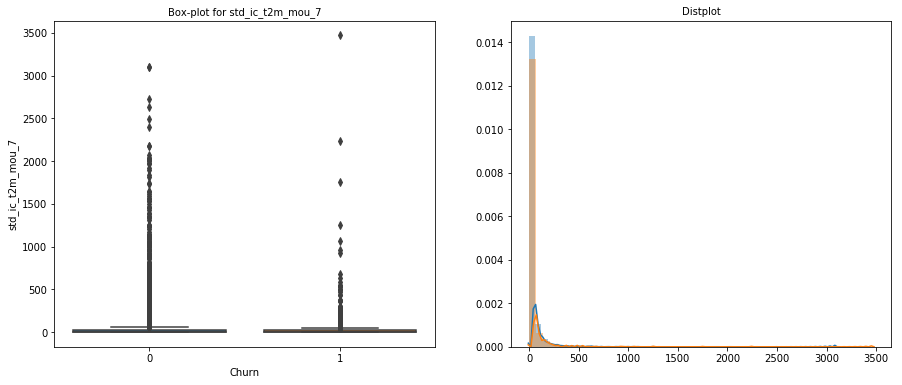

std_ic_t2m_mou_8


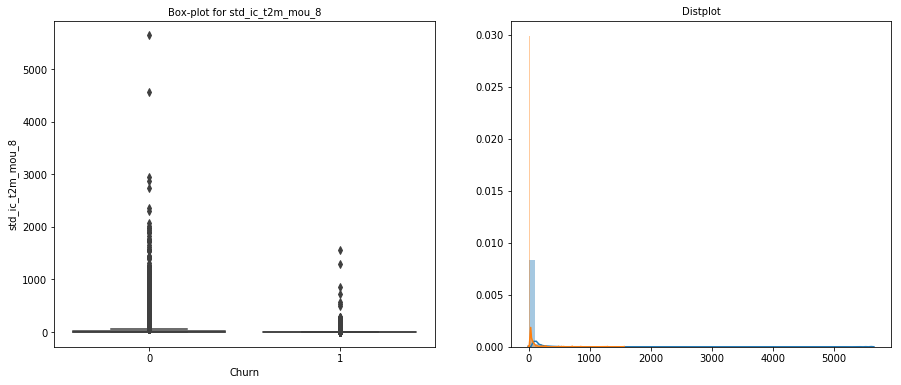

std_ic_t2f_mou_6


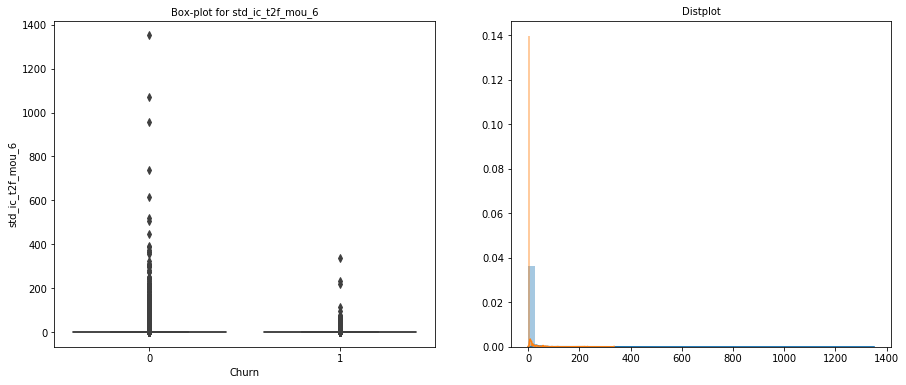

std_ic_t2f_mou_7


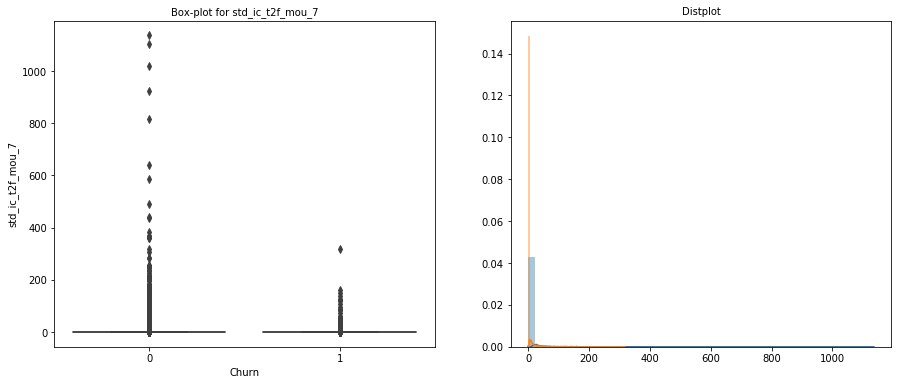

std_ic_t2f_mou_8


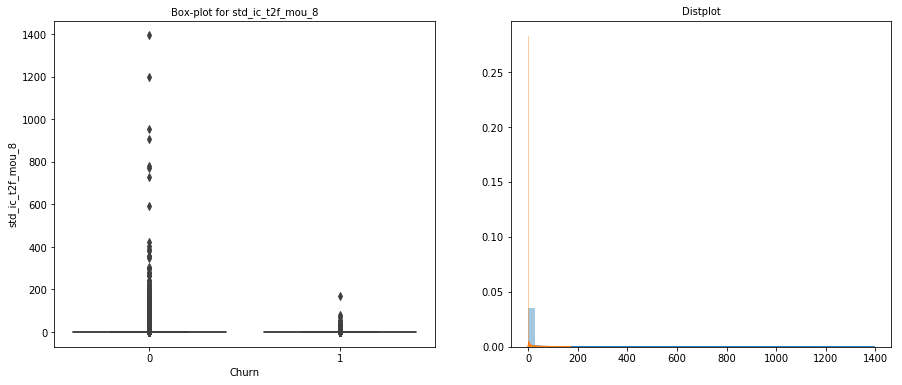

std_ic_mou_6


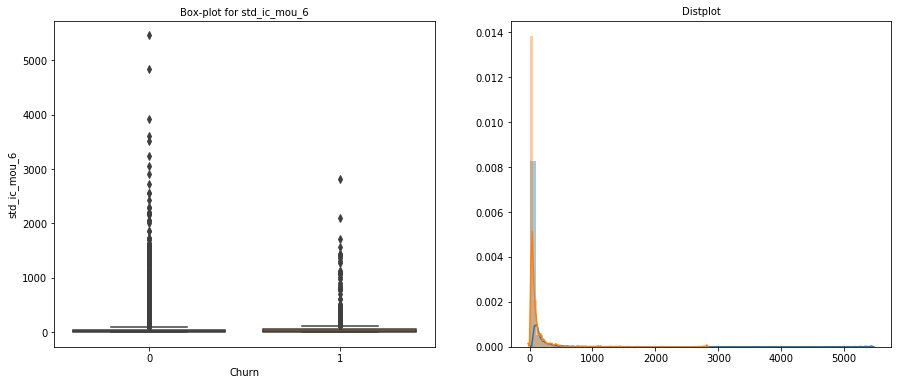

std_ic_mou_7


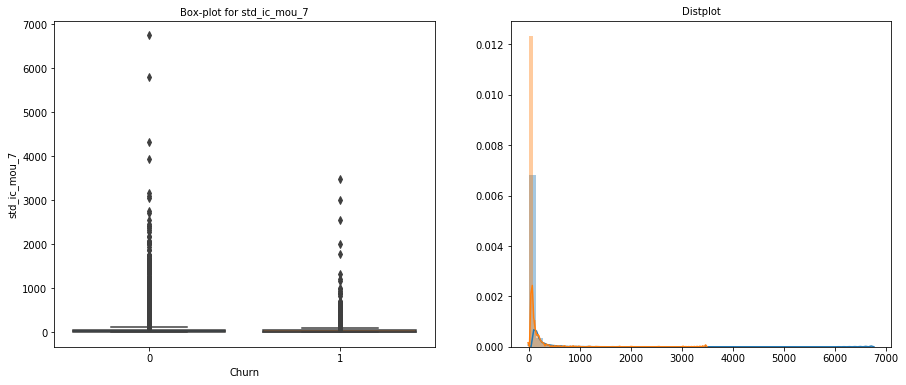

std_ic_mou_8


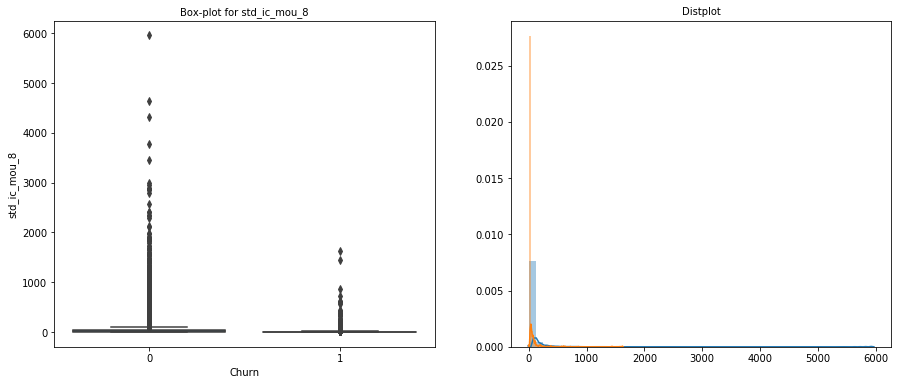

total_ic_mou_6


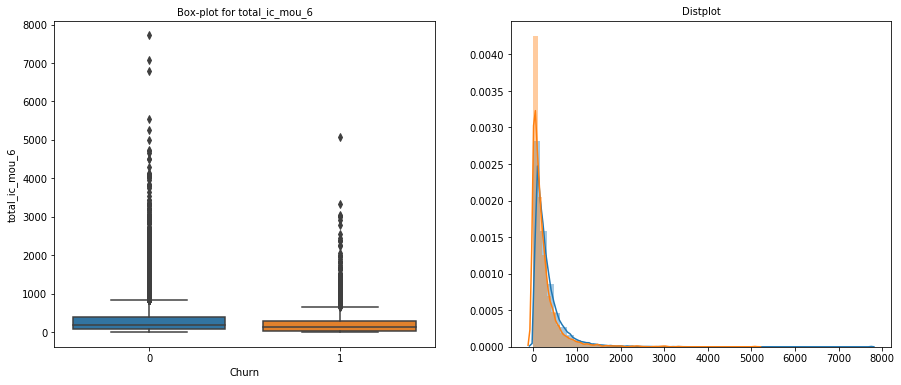

total_ic_mou_7


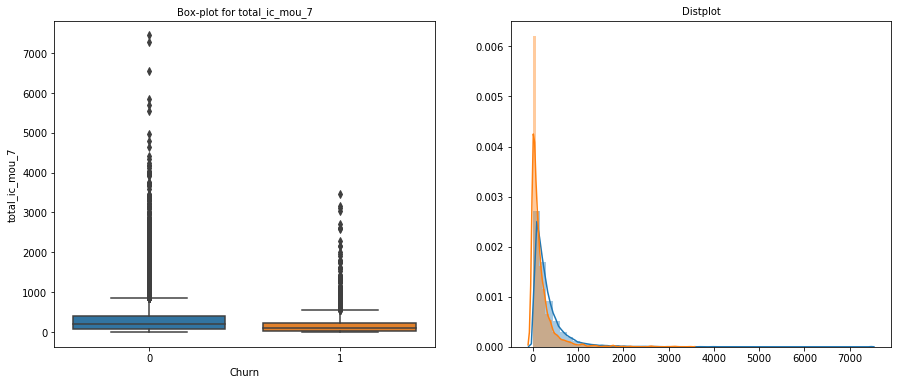

total_ic_mou_8


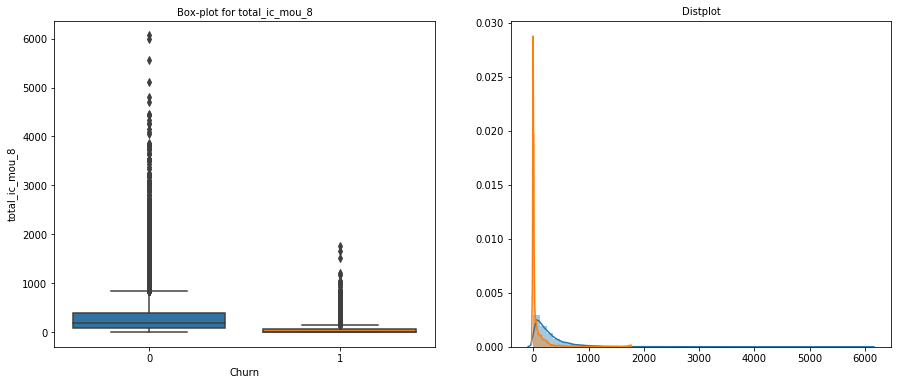

spl_ic_mou_6


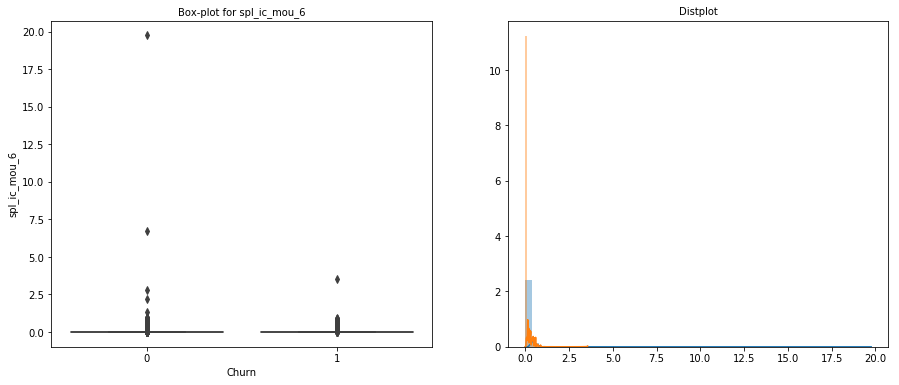

spl_ic_mou_7


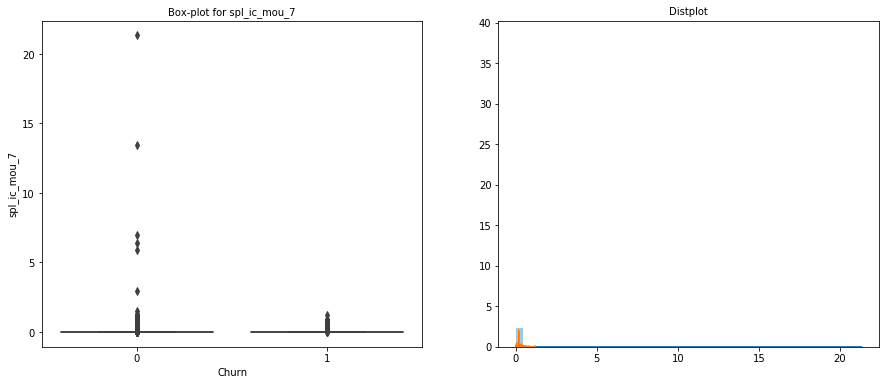

spl_ic_mou_8


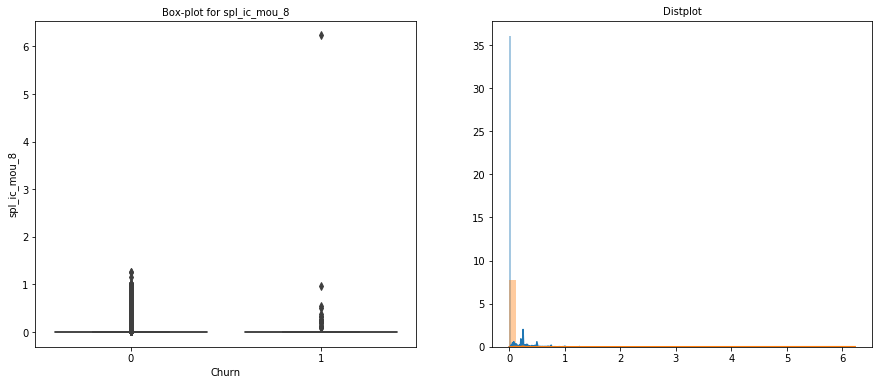

isd_ic_mou_6


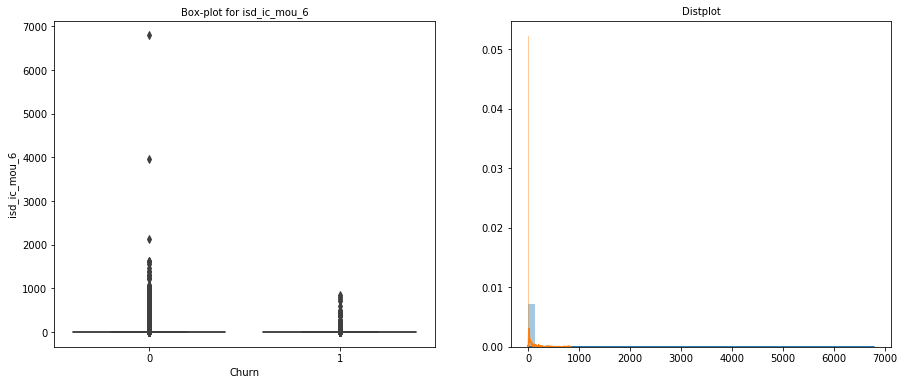

isd_ic_mou_7


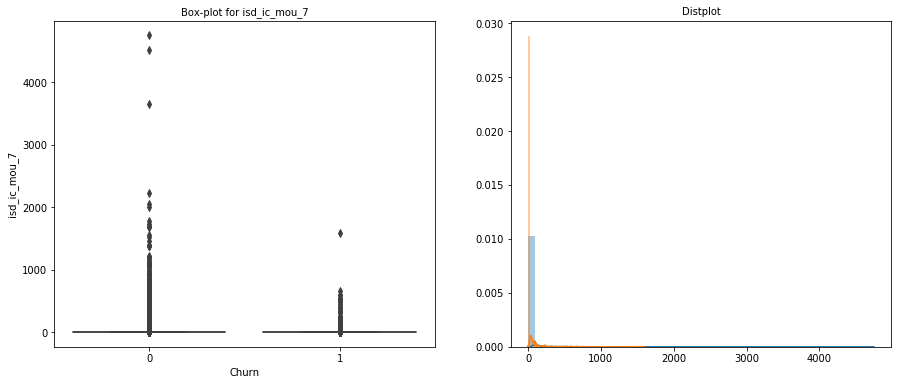

isd_ic_mou_8


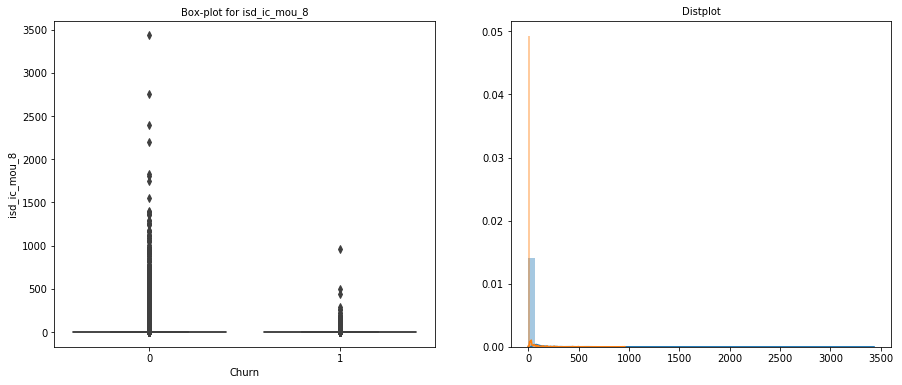

ic_others_6


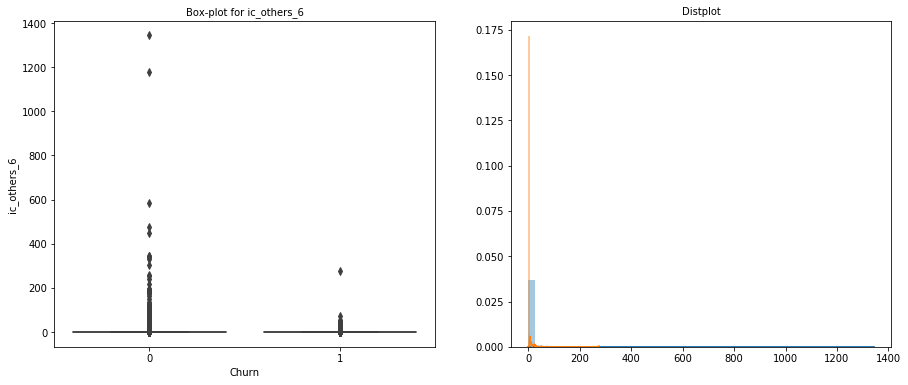

ic_others_7


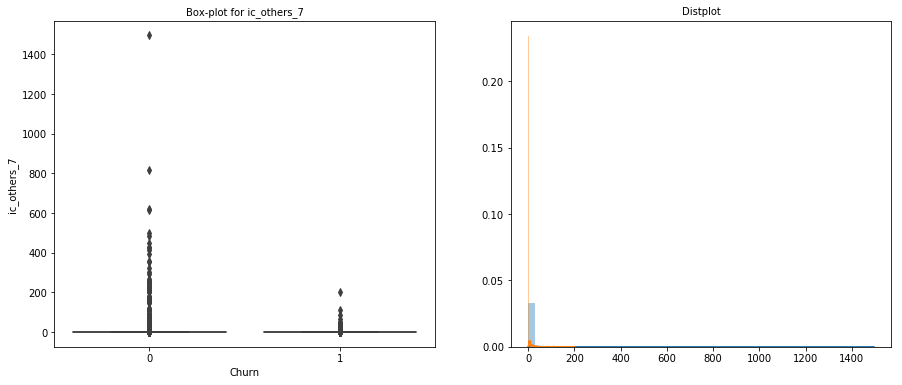

ic_others_8


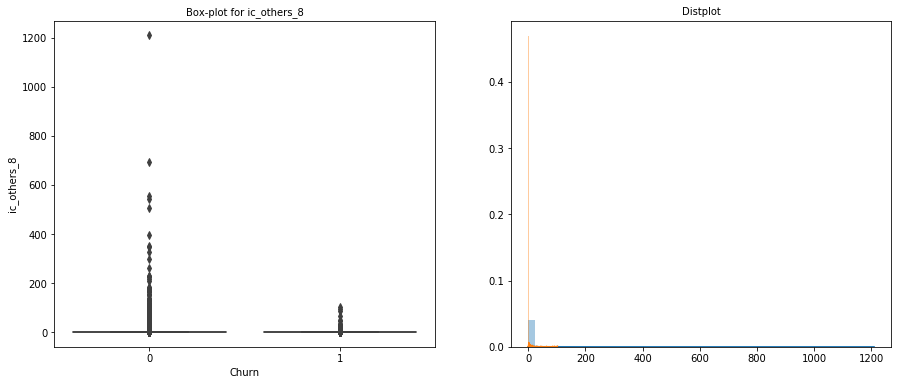

total_rech_num_6


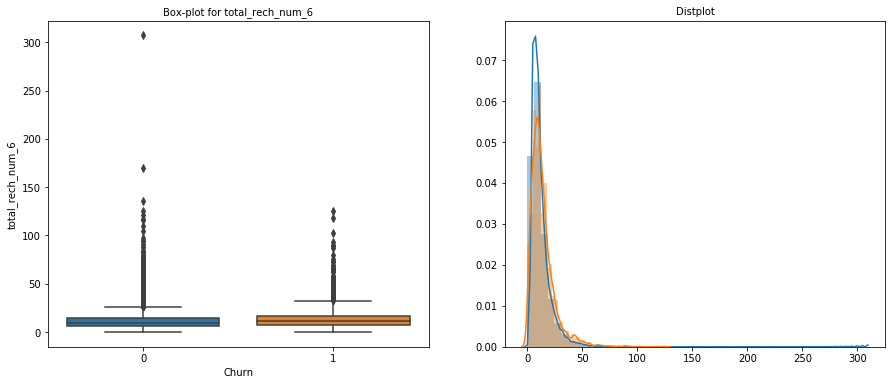

total_rech_num_7


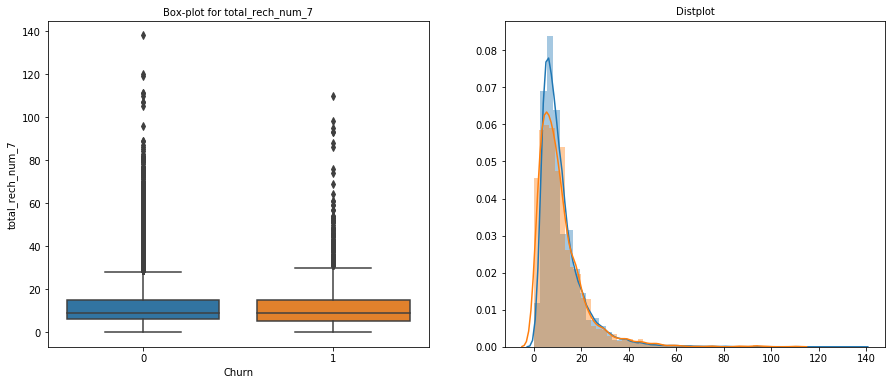

total_rech_num_8


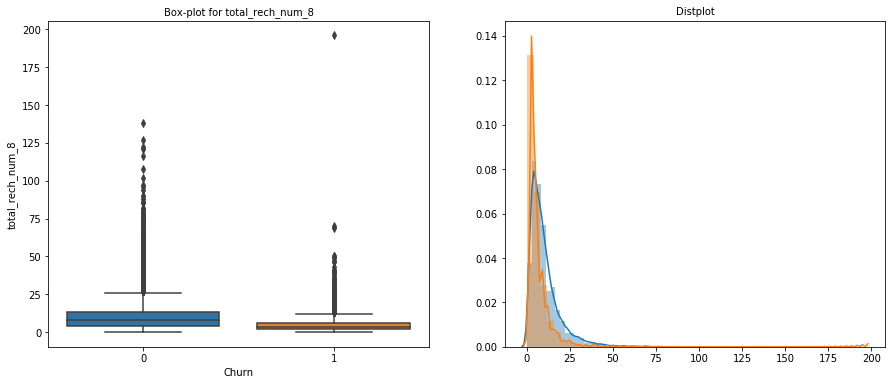

total_rech_amt_6


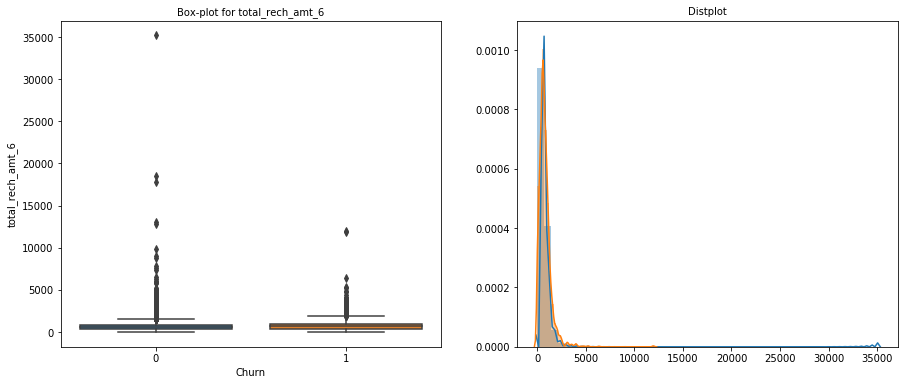

total_rech_amt_7


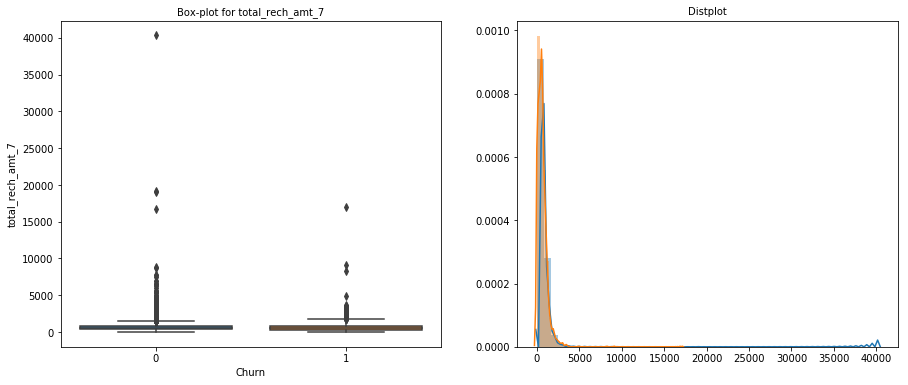

total_rech_amt_8


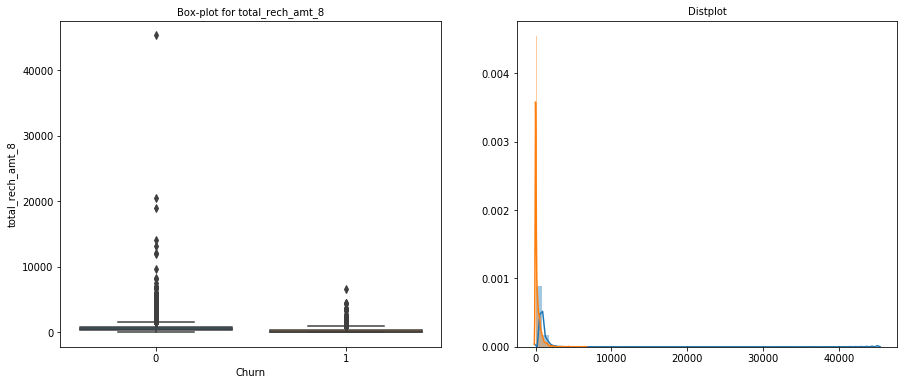

max_rech_amt_6


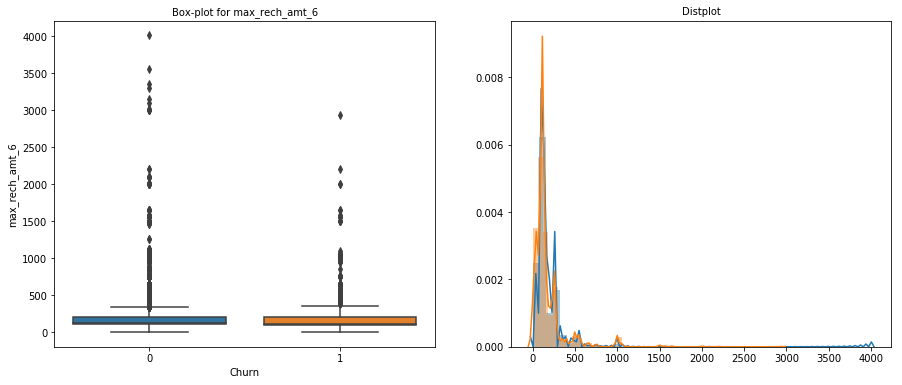

max_rech_amt_7


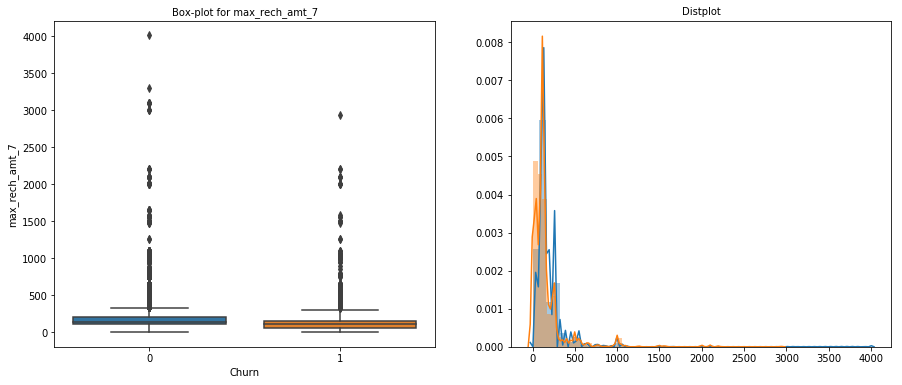

max_rech_amt_8


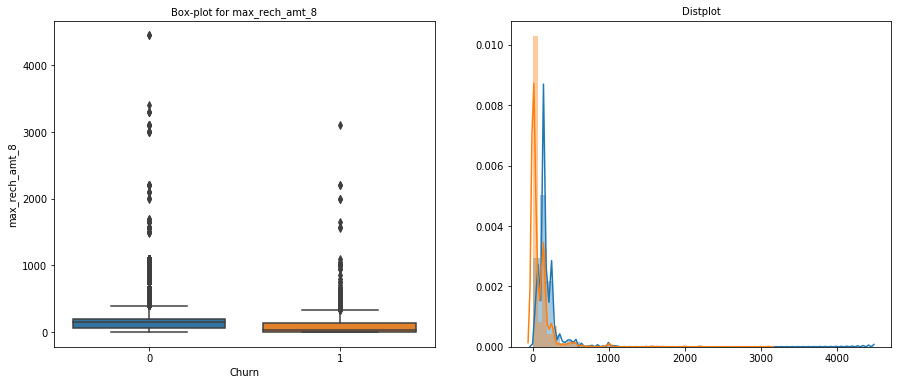

last_day_rch_amt_6


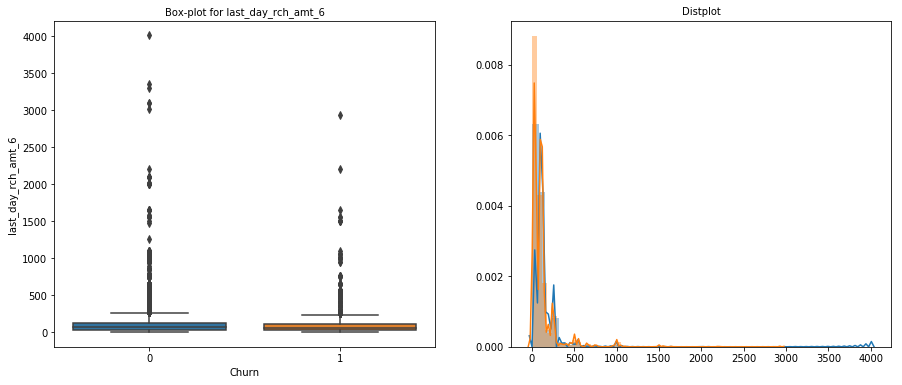

last_day_rch_amt_7


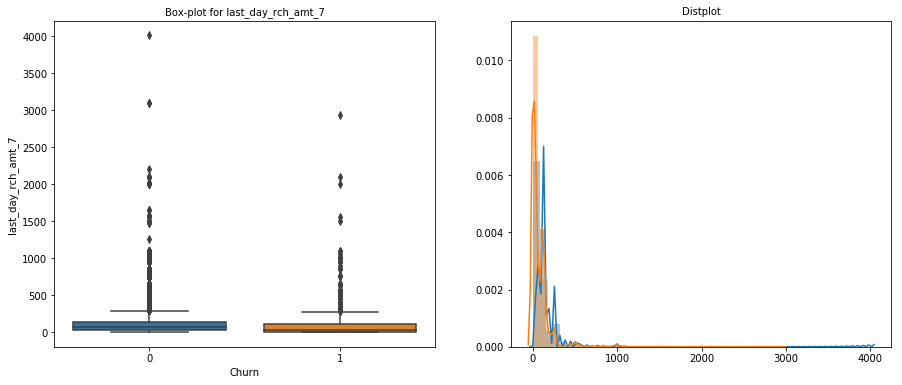

last_day_rch_amt_8


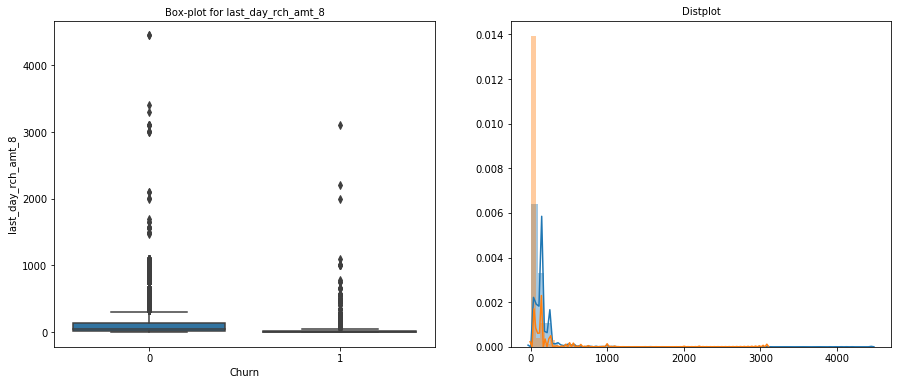

total_rech_data_6


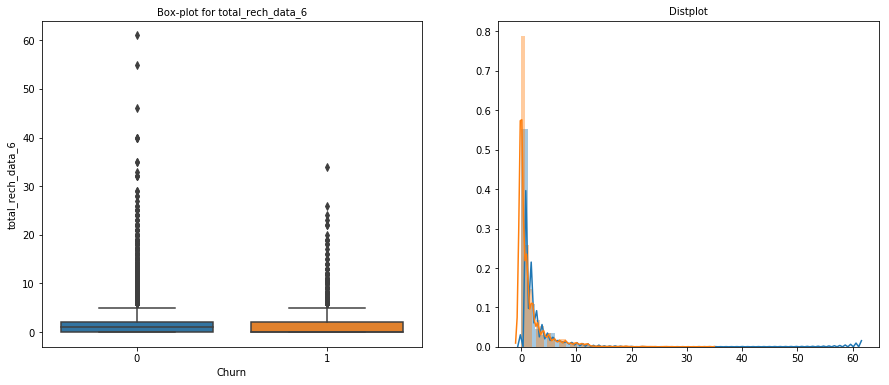

total_rech_data_7


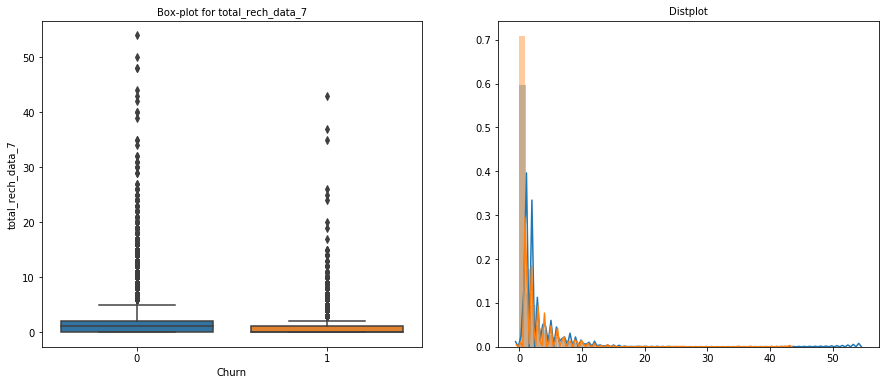

total_rech_data_8


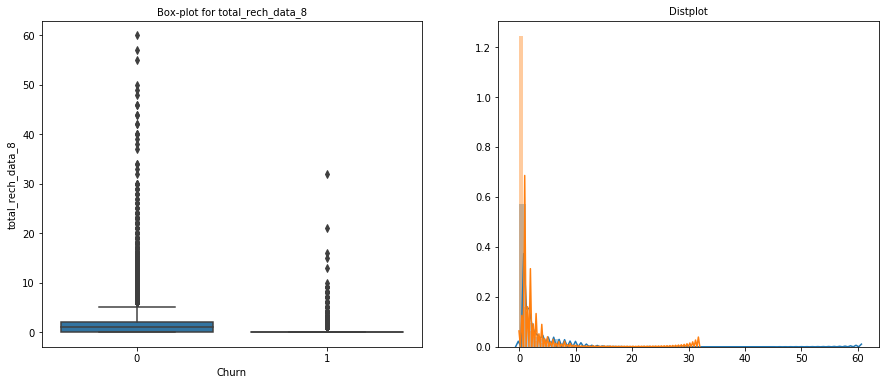

max_rech_data_6


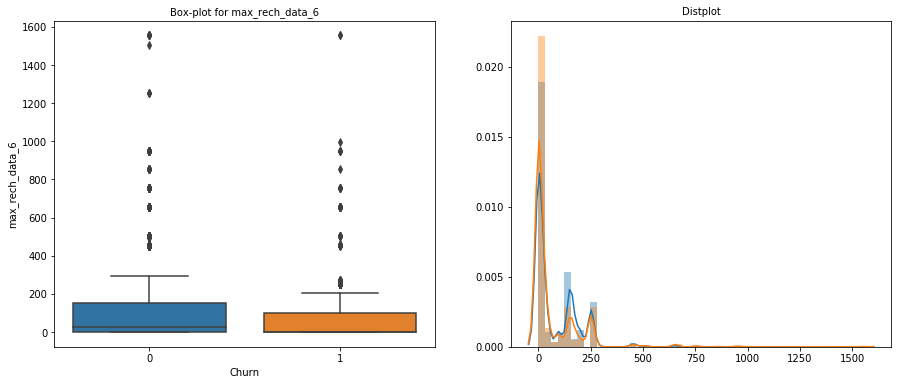

max_rech_data_7


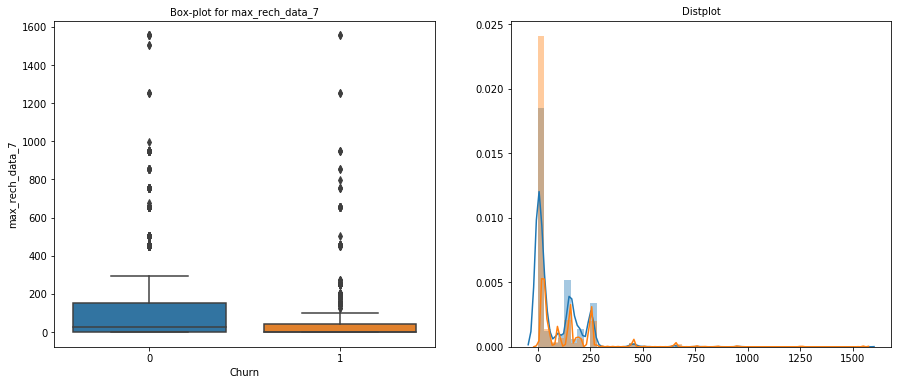

max_rech_data_8


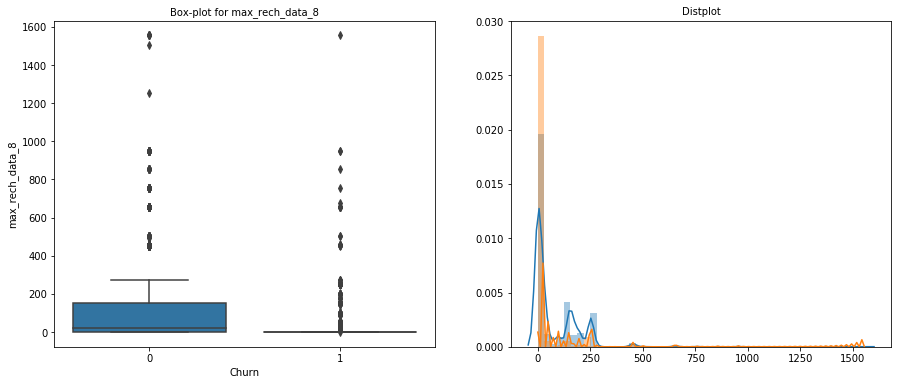

count_rech_2g_6


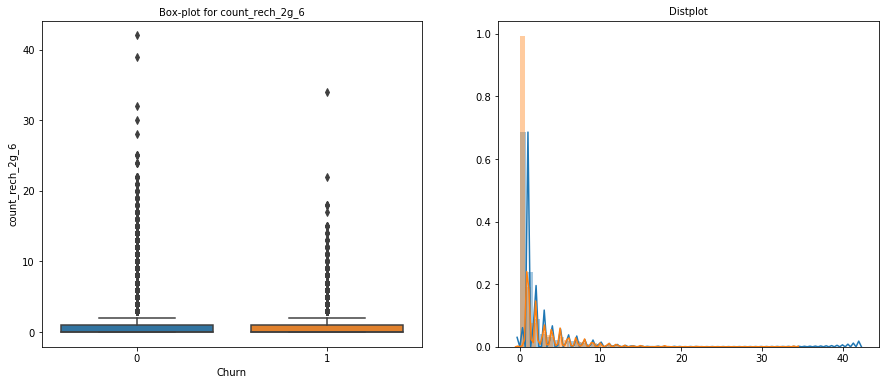

count_rech_2g_7


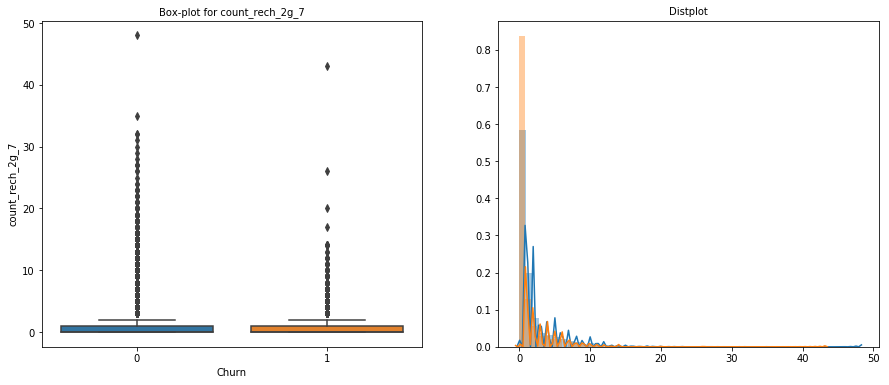

count_rech_2g_8


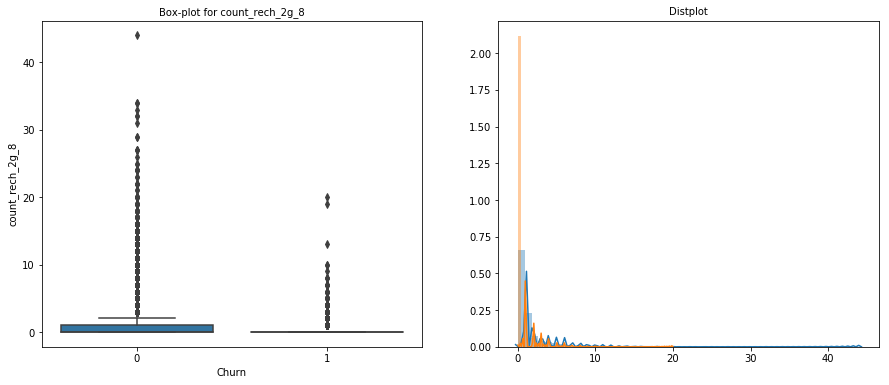

count_rech_3g_6


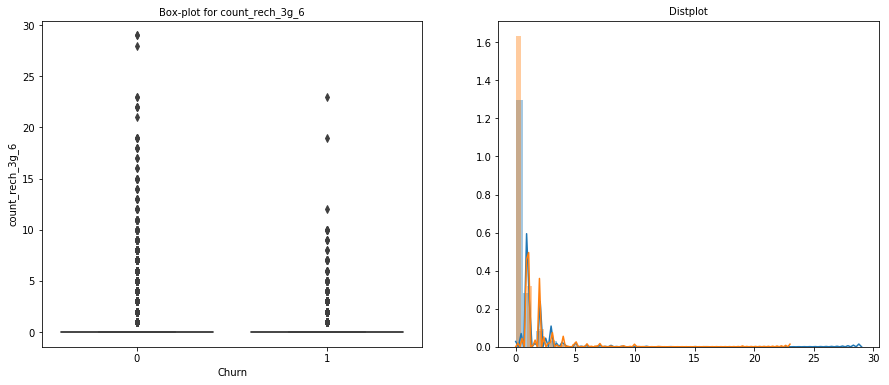

count_rech_3g_7


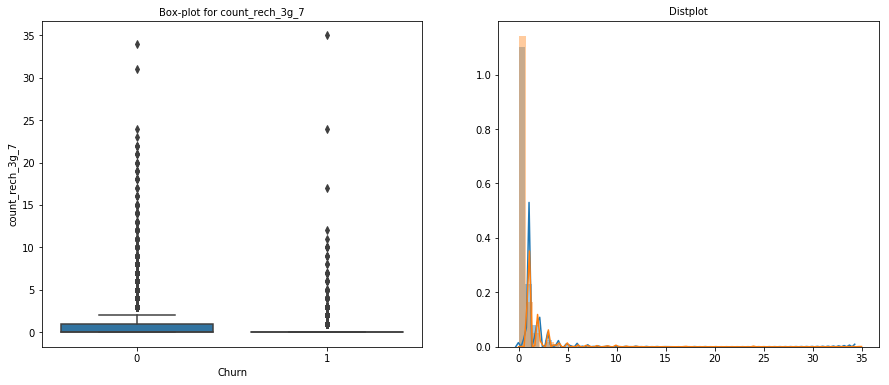

count_rech_3g_8


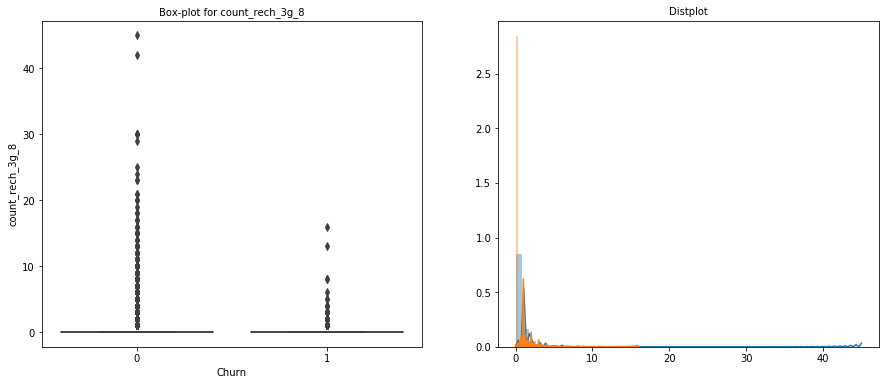

av_rech_amt_data_6


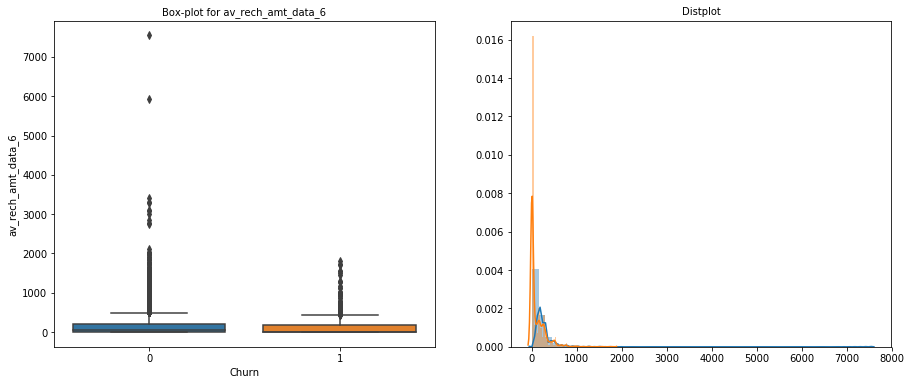

av_rech_amt_data_7


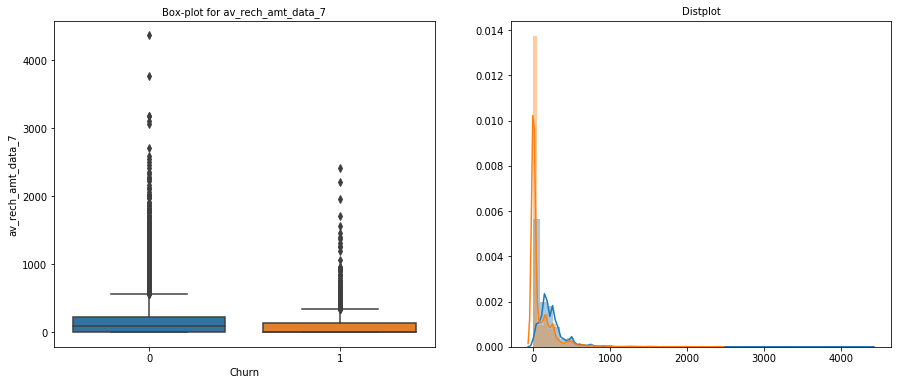

av_rech_amt_data_8


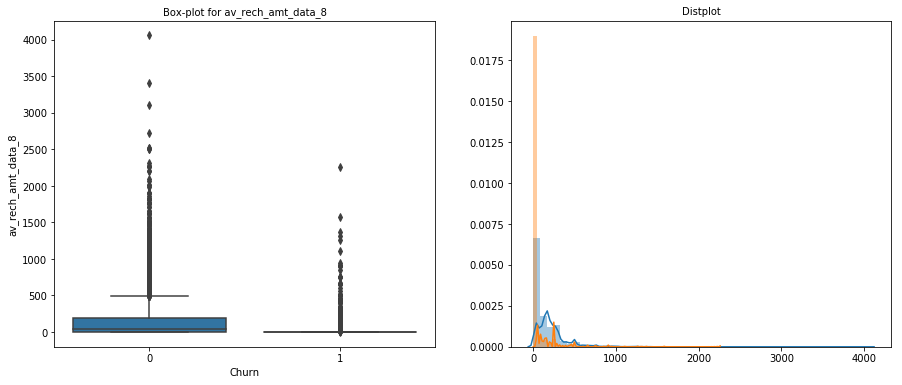

vol_2g_mb_6


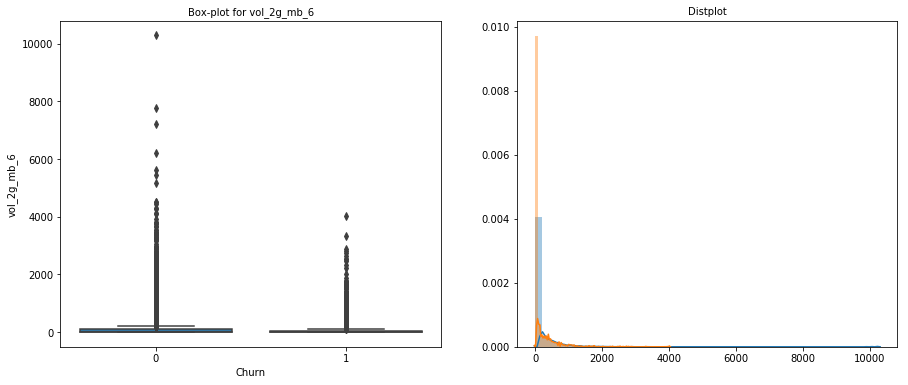

vol_2g_mb_7


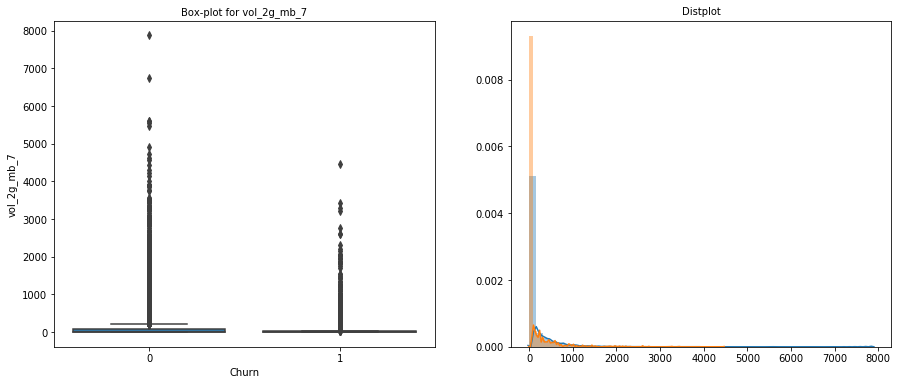

vol_2g_mb_8


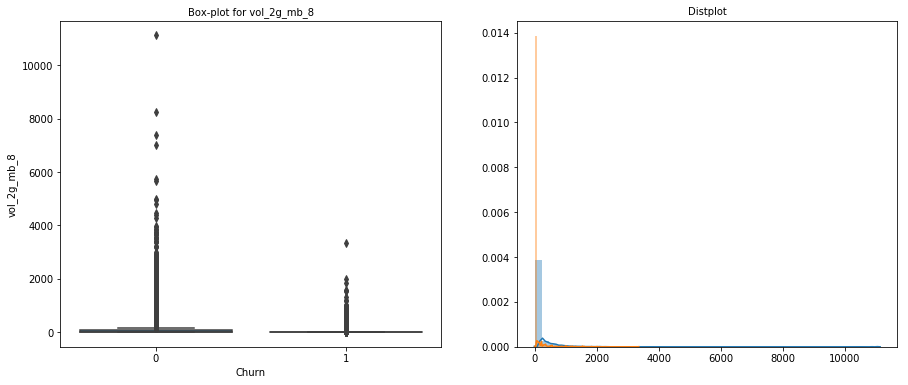

vol_3g_mb_6


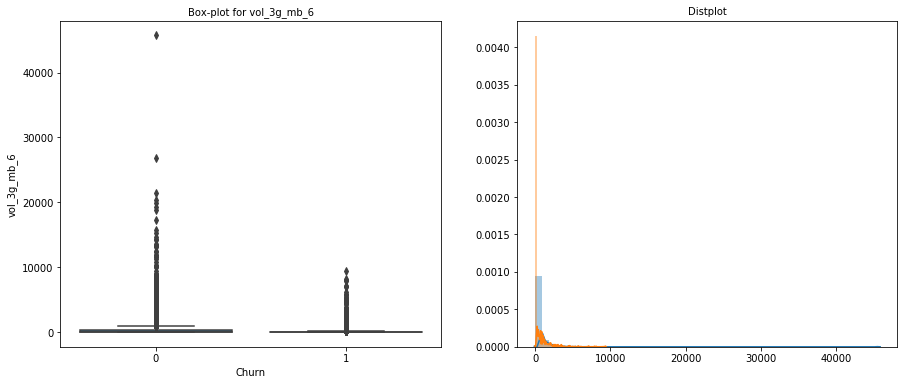

vol_3g_mb_7


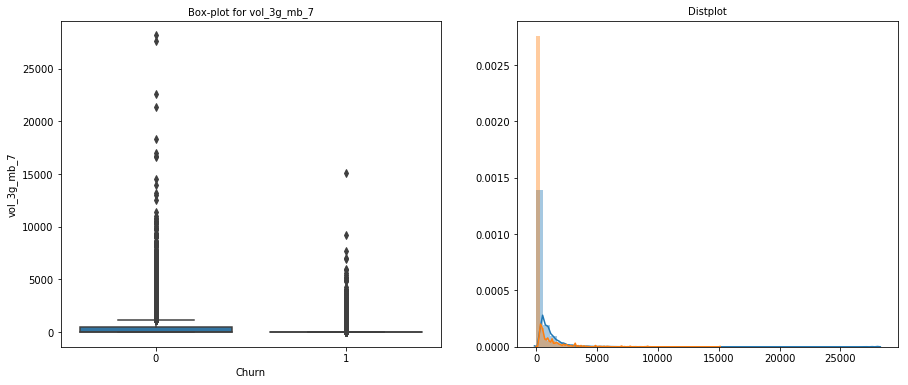

vol_3g_mb_8


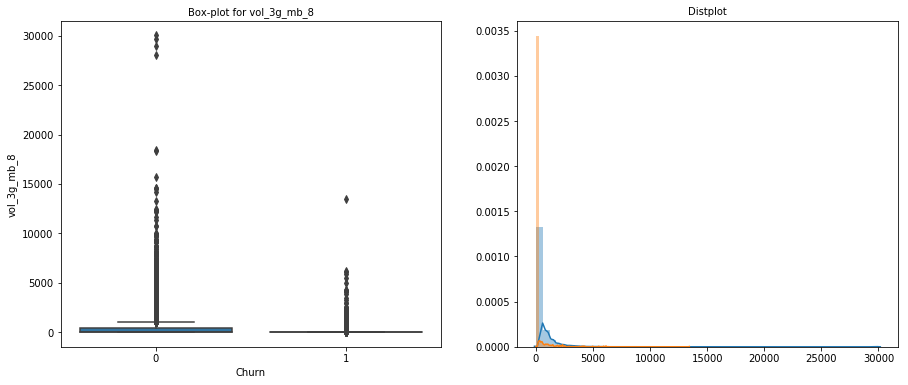

arpu_3g_6


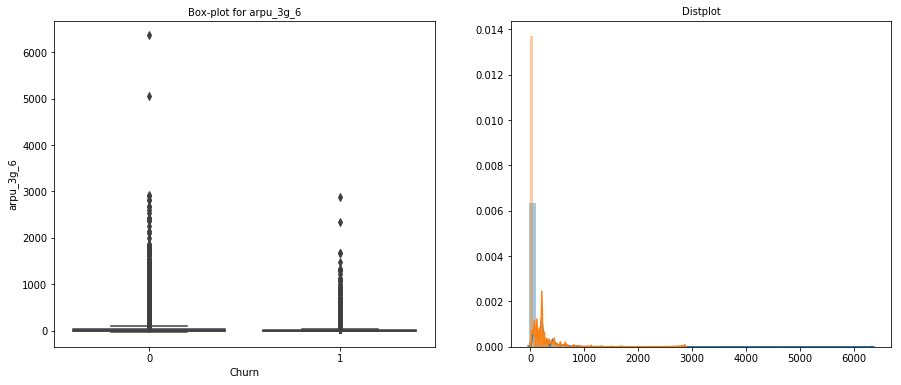

arpu_3g_7


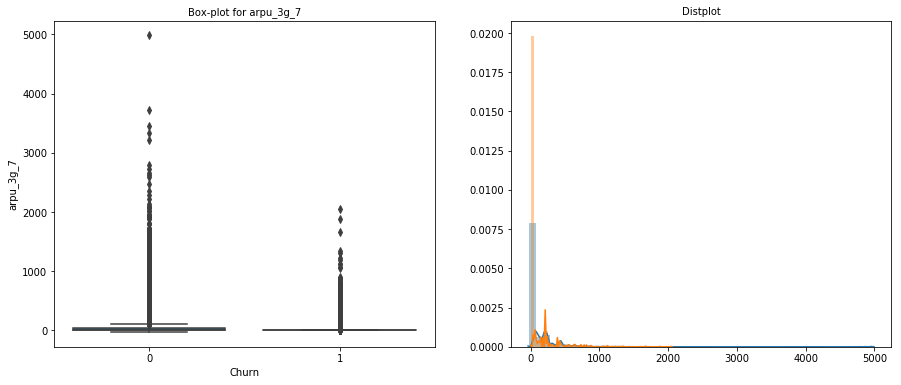

arpu_3g_8


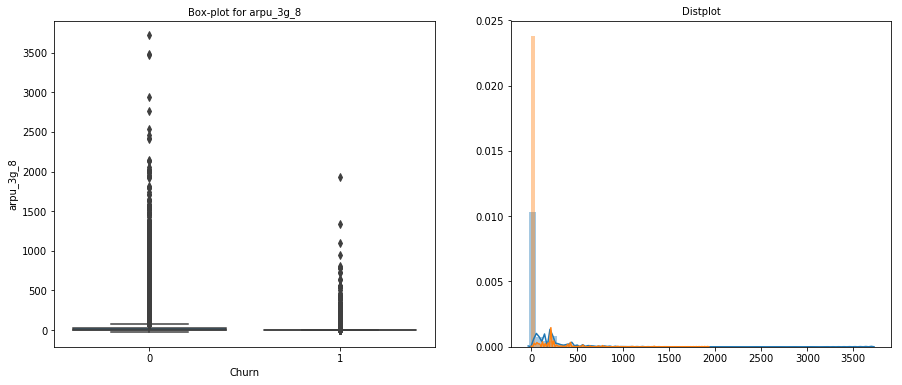

arpu_2g_6


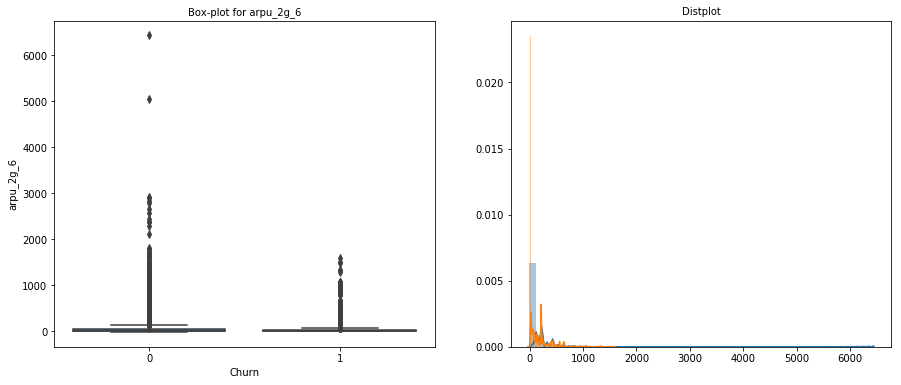

arpu_2g_7


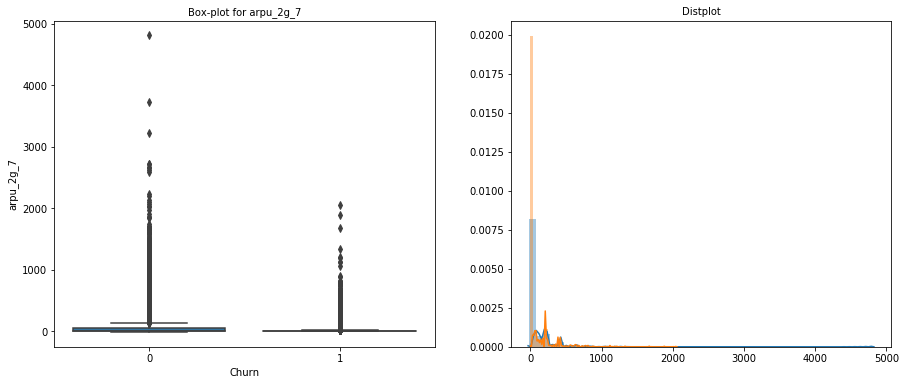

arpu_2g_8


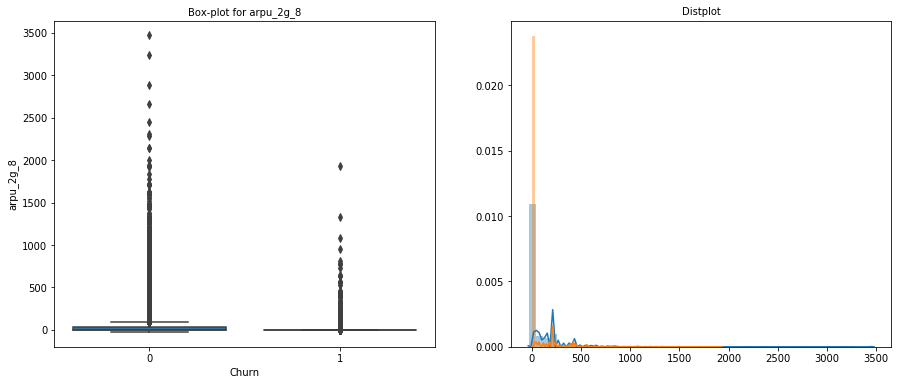

monthly_2g_6


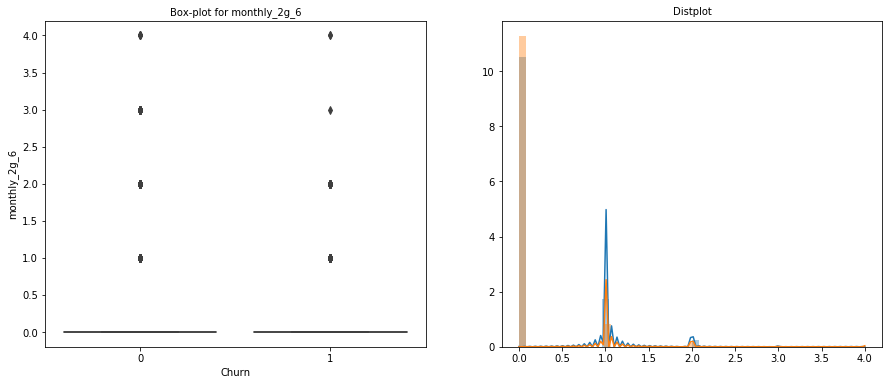

monthly_2g_7


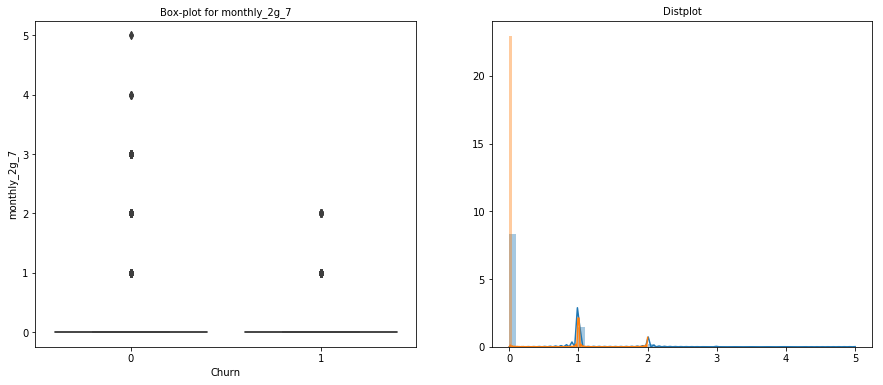

monthly_2g_8


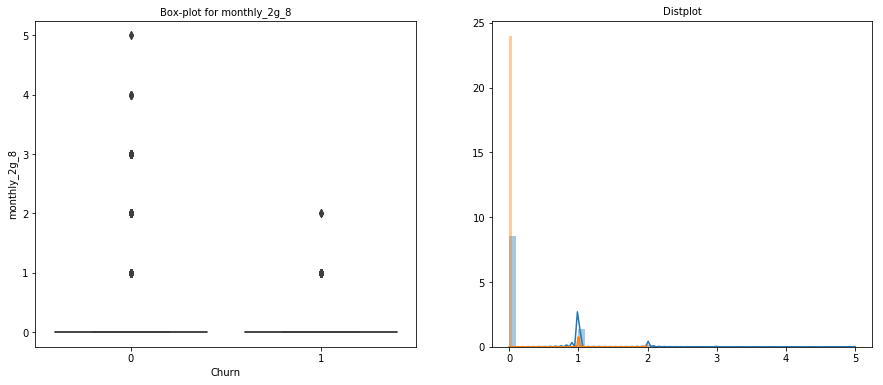

sachet_2g_6


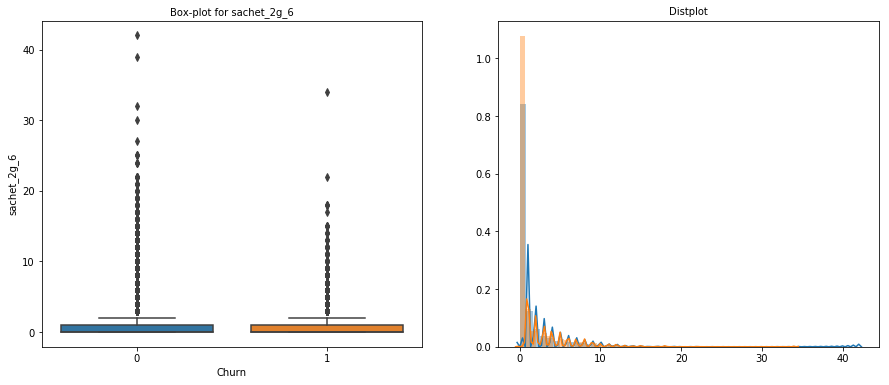

sachet_2g_7


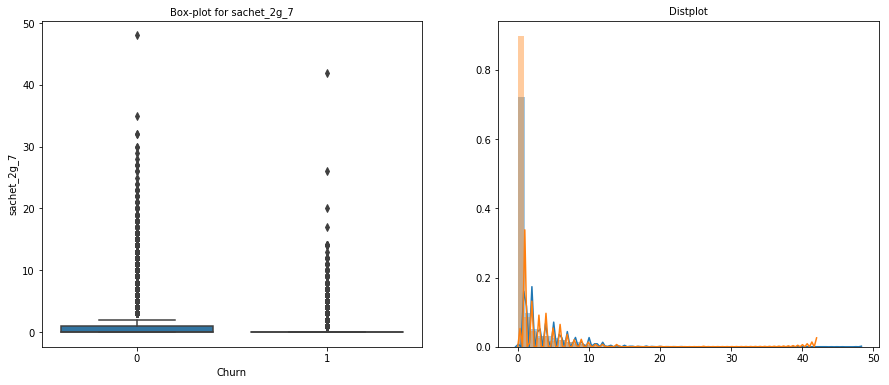

sachet_2g_8


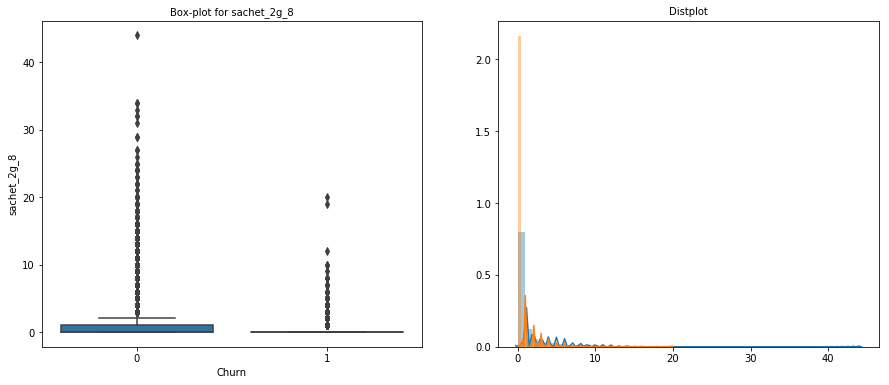

monthly_3g_6


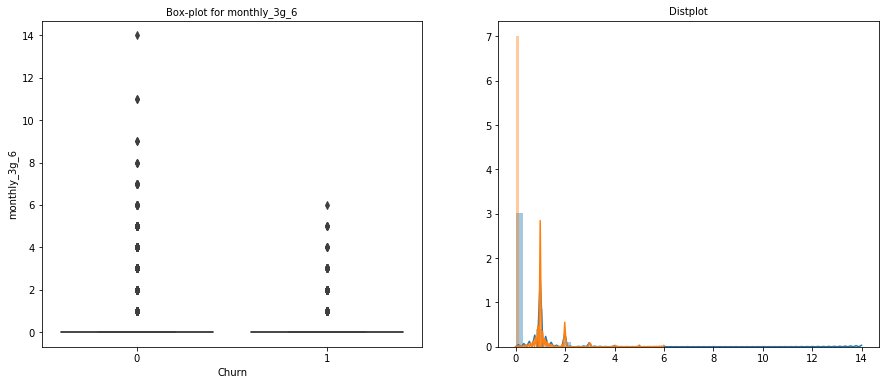

monthly_3g_7


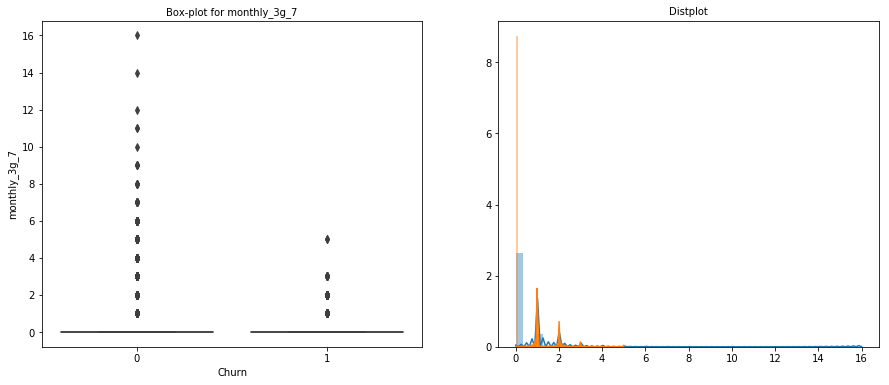

monthly_3g_8


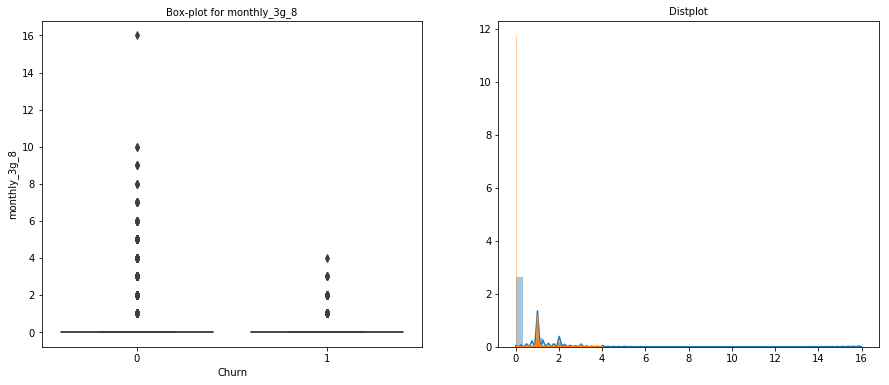

sachet_3g_6


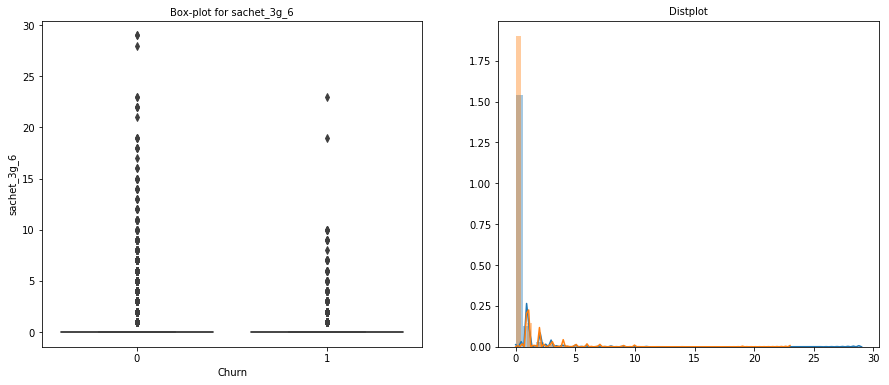

sachet_3g_7


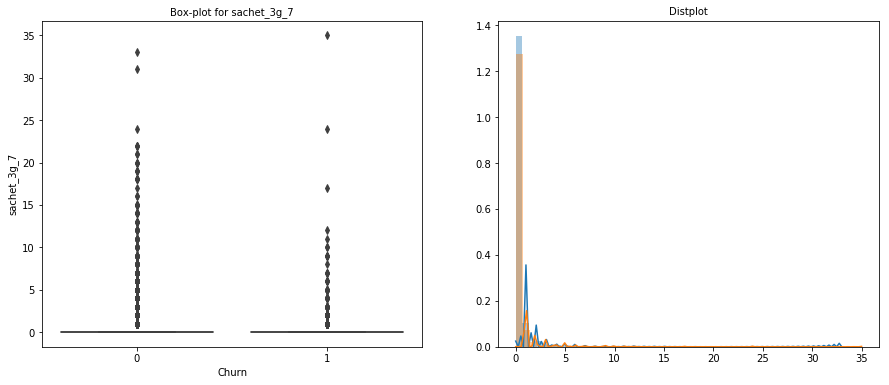

sachet_3g_8


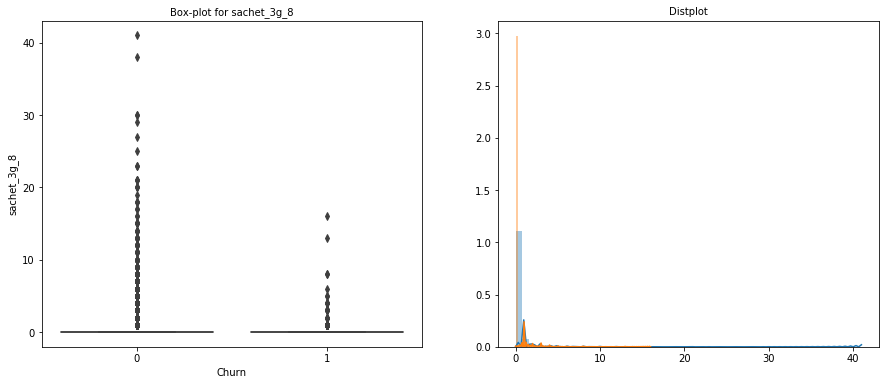

vbc_3g_8


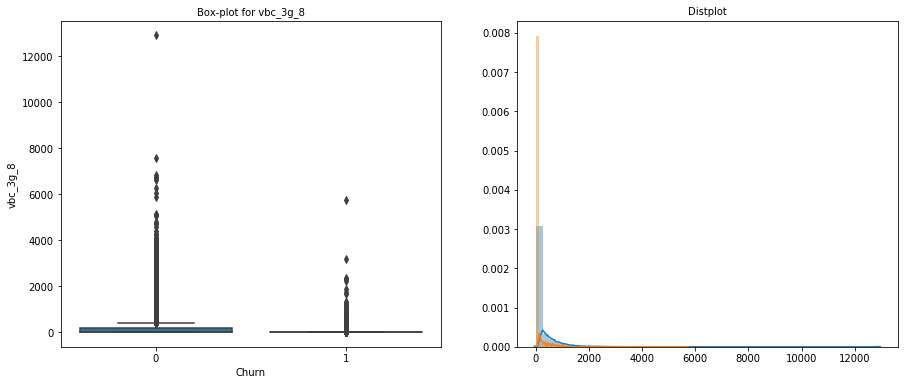

vbc_3g_7


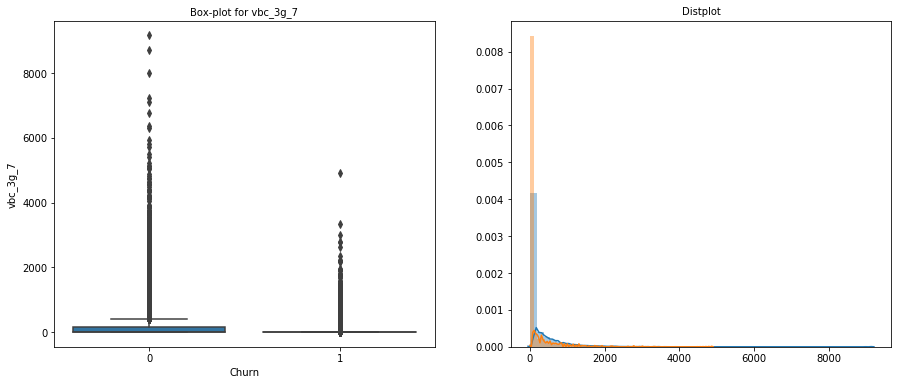

vbc_3g_6


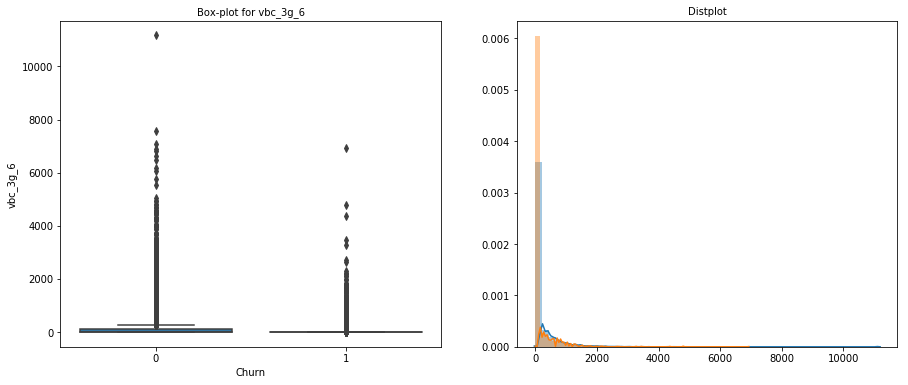

days_since_last_rech_6


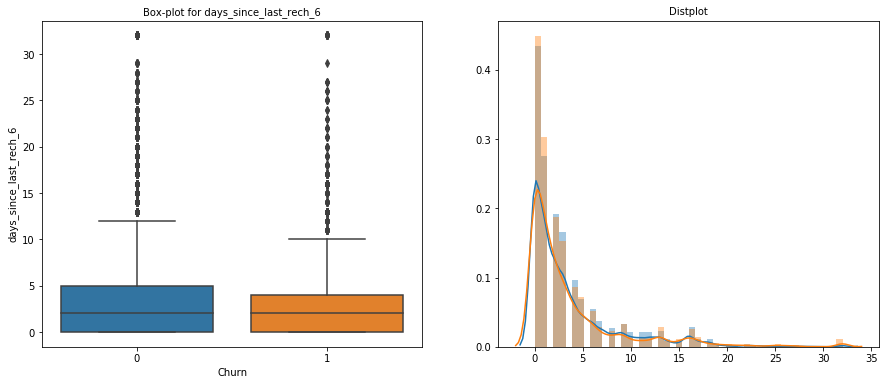

days_since_last_rech_7


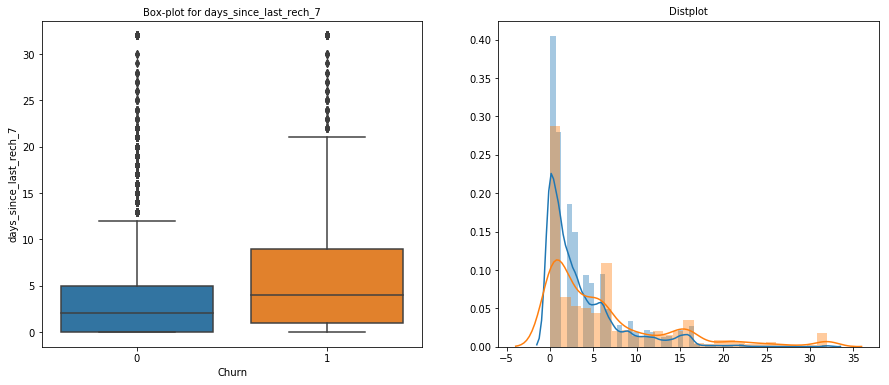

days_since_last_rech_8


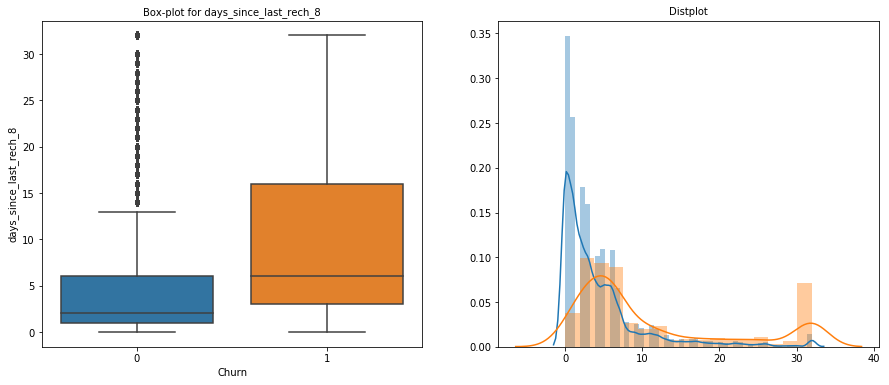

Tot_rec_amt_call_data_6


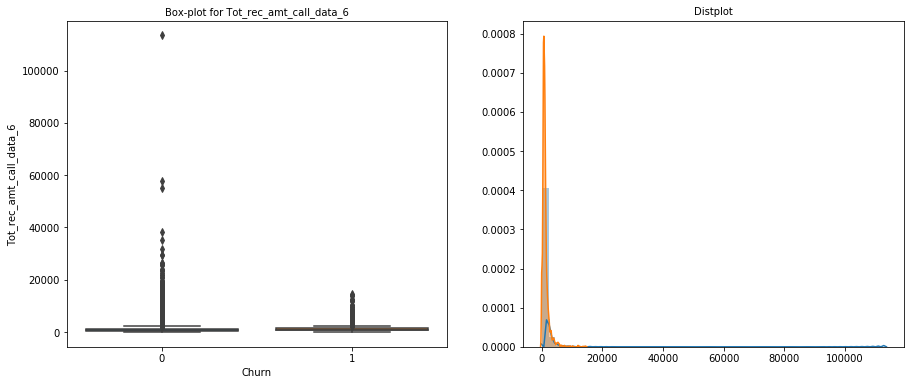

Tot_rec_amt_call_data_7


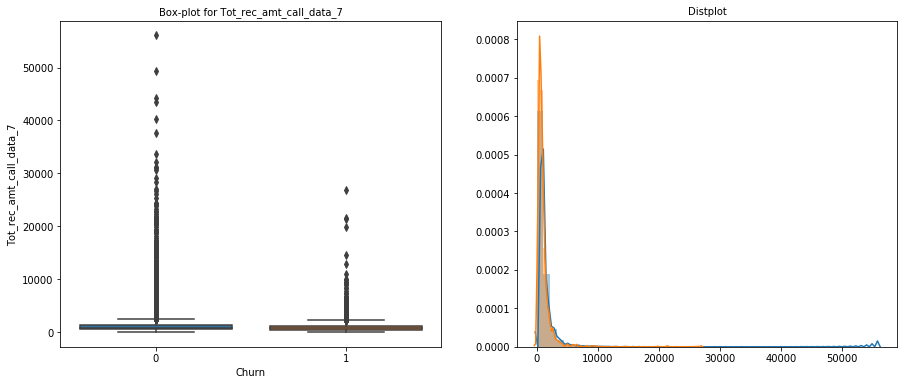

Tot_rec_amt_call_data_8


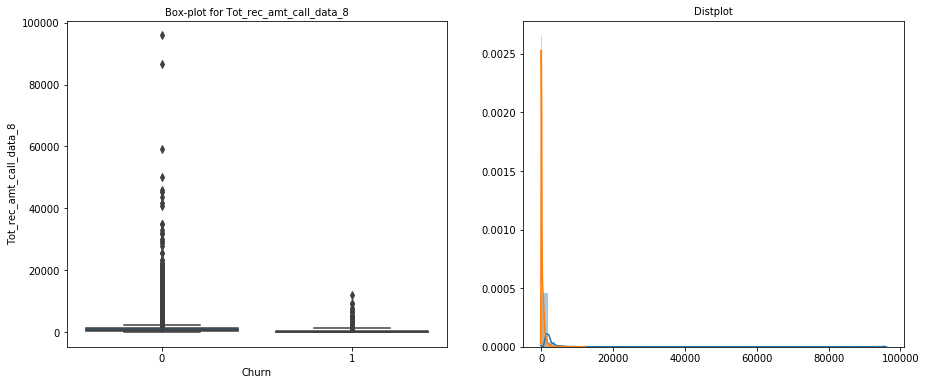

Diff_rec_amt_6_7


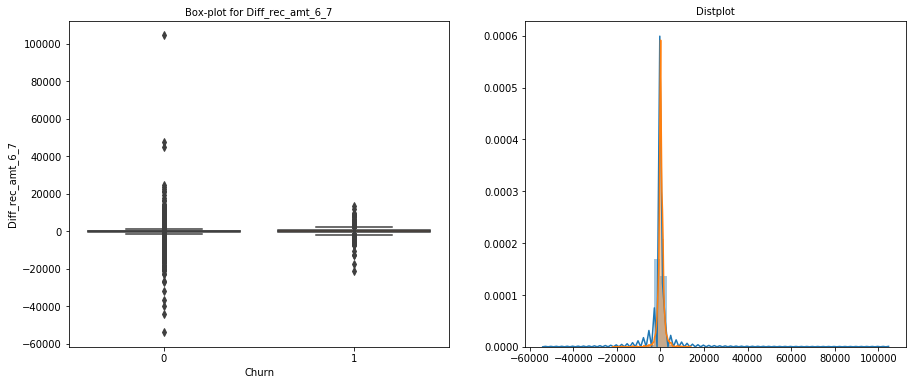

Diff_rec_amt_7_8


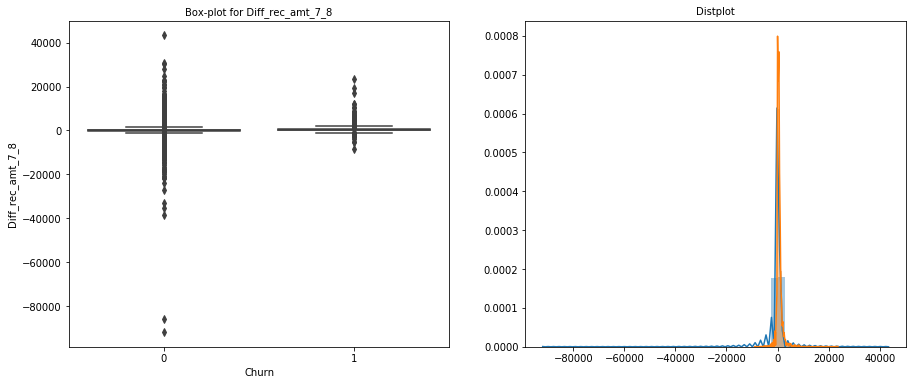

Diff_onnet_6_7


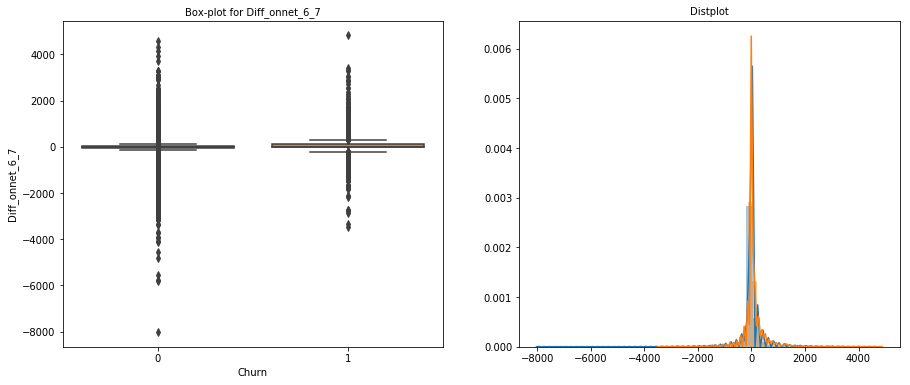

Diff_onnet_7_8


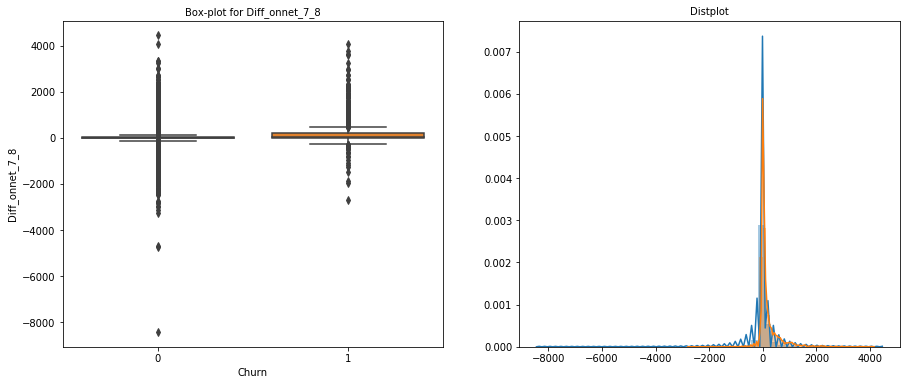

Diff_offnet_6_7


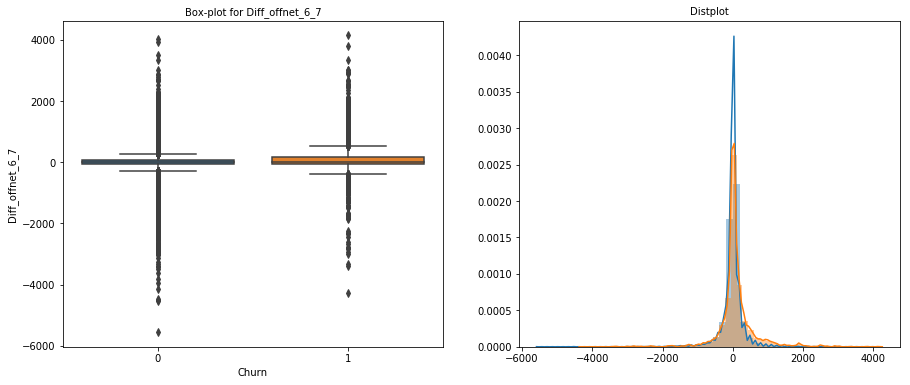

Diff_offnet_7_8


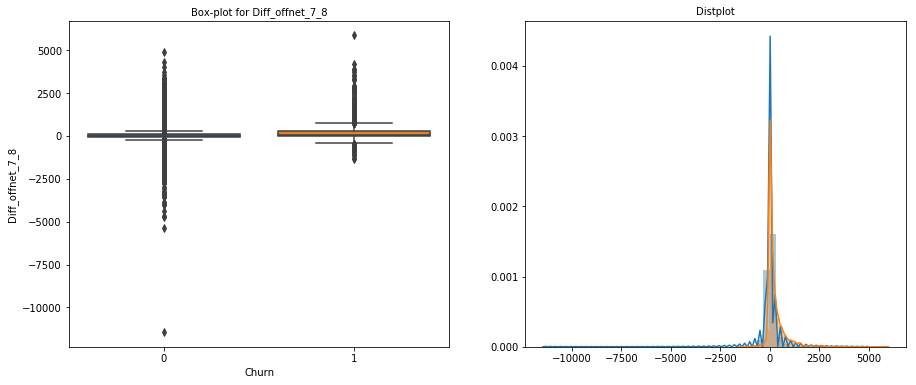

Diff_total_og_6_7


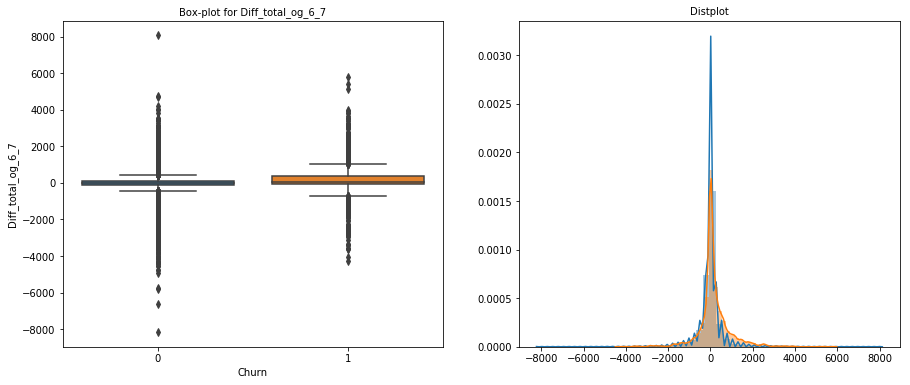

Diff_total_og_7_8


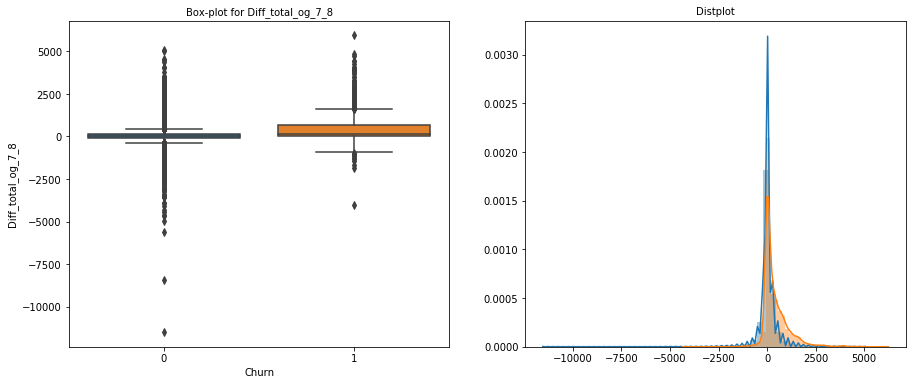

Diff_total_ic_6_7


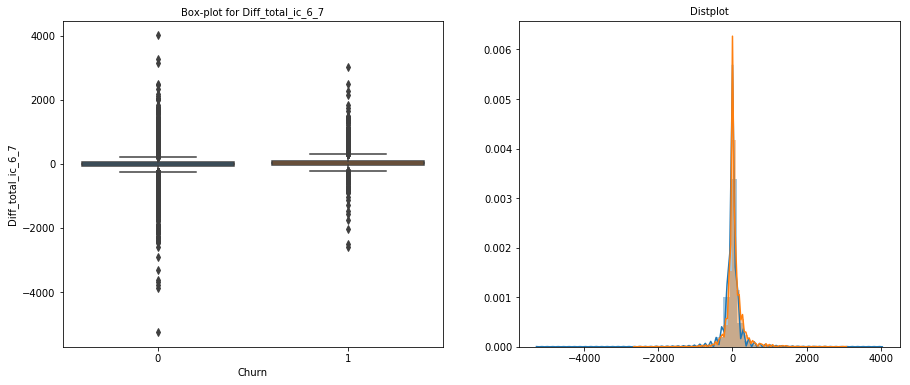

Diff_total_ic_7_8


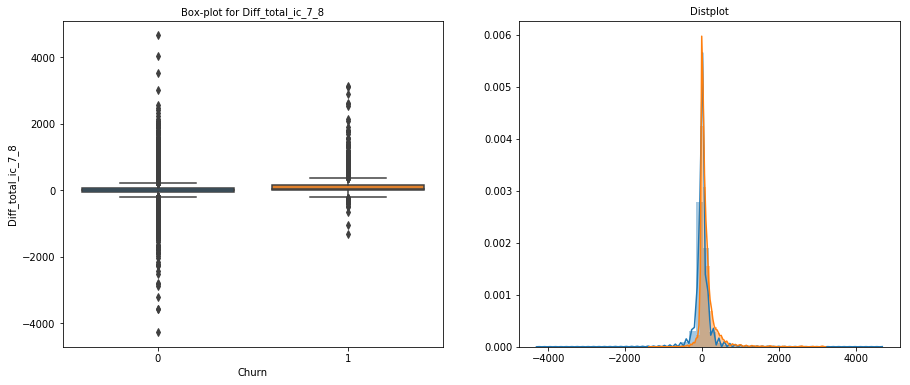

Diff_arpu_6_7


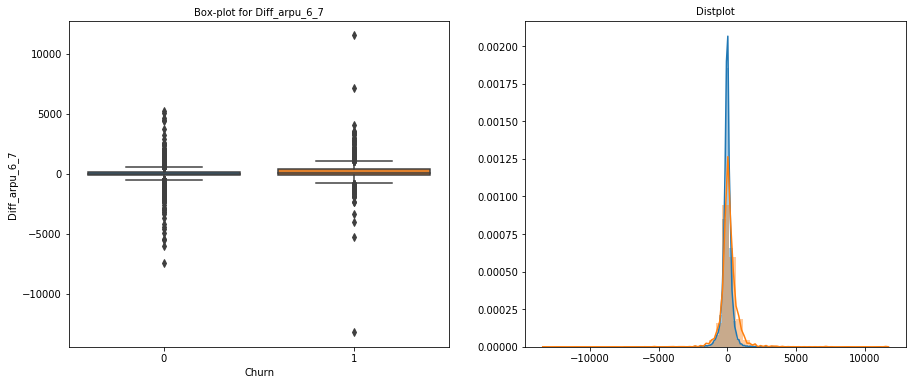

Diff_arpu_7_8


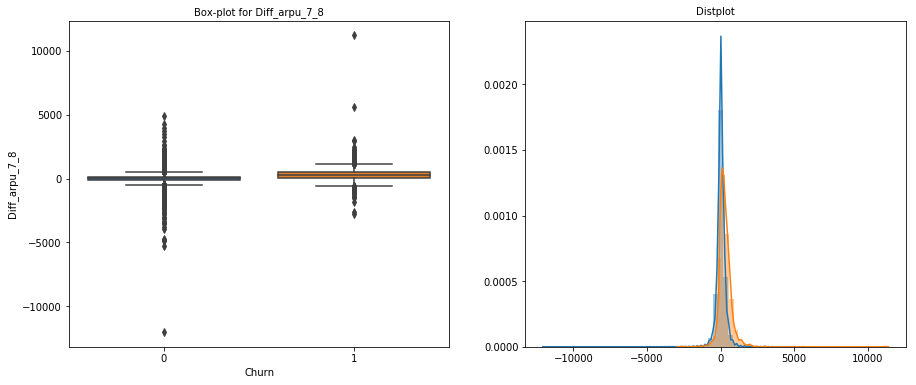

Diff_arpu_data_6_7


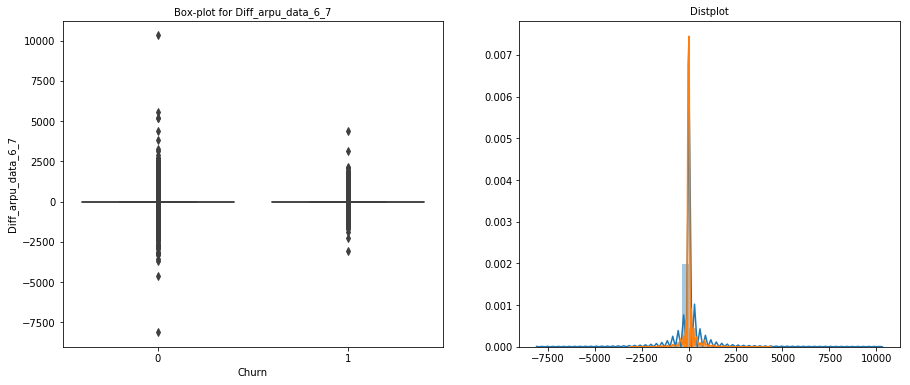

Diff_arpu_data_7_8


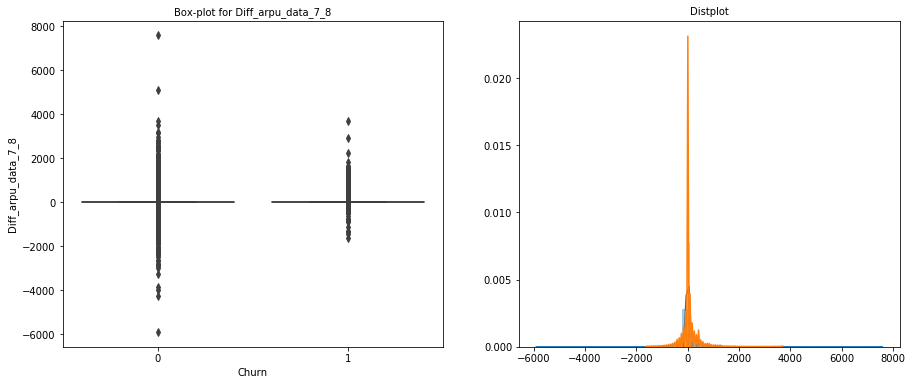

Diff_data_vol_6_7


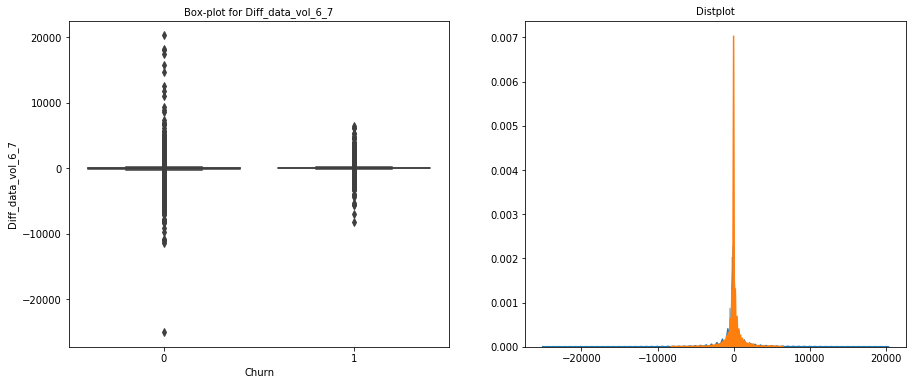

Diff_data_vol_7_8


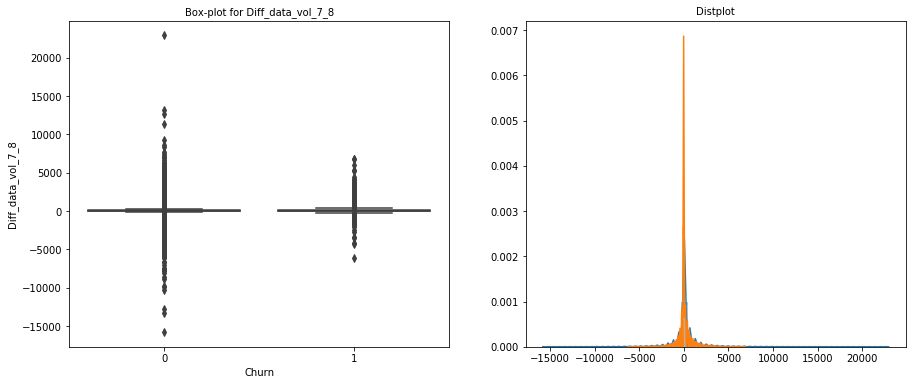

In [56]:
for col in highValueDf.columns:
    if(col in categoricalCols):
        continue
    print(col)
    PlotNumerical(col)

#### INFERENCE:
1. loc_og_t2m_mou_6, loc_og_t2m_mou_7,loc_og_t2m_mou_8 - values are high for those who do not churn than compared to those who churn.Customers who make longer duration outgoing calls are less likely to churn.
2. We can see that there is a decreasing trend for std_og_mou (outgoing STD calls ) from the month of June to August for those customers who churned. Decrease in outgoing STD call minutes are an indication that the customer might churn.
3. Similarly total_og_mou (Total outgoing minutes of usage) is lower for those customers who churned.
4. Total_ic_mou_6, Total_ic_mou_7, Total_ic_mou_8 (Total incoming calls - minutes of usage) is considerably higher for those customers who did not churn.  
5. Lower max_rech_data values are an indication that the customer might churn.
6. The number of days_since_last_rech_6 is very high for those who churn in June.This value increases considerably in August. 

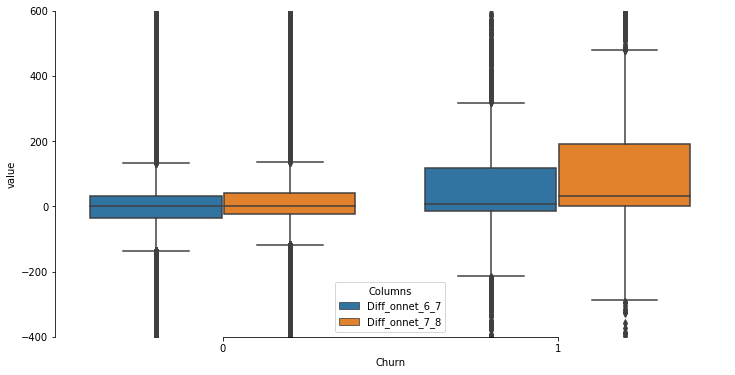

In [57]:
#plotting box plots for 'Diff_onnet_6_7','Diff_onnet_7_8' with respect to churn
plt.figure(figsize=(12,6))
plt.ylim(-400,600)
adf=highValueDf[['Diff_onnet_6_7','Diff_onnet_7_8','Churn']]
ax = (adf.set_index('Churn', append=True)
      .stack()                       
      .to_frame()                   
      .reset_index()                
      .rename(columns={'level_2': 'Columns', 0: 'value'})
      .pipe((sns.boxplot, 'data'), x='Churn', y='value', hue='Columns', order=[0, 1]))
sns.despine(trim=True)

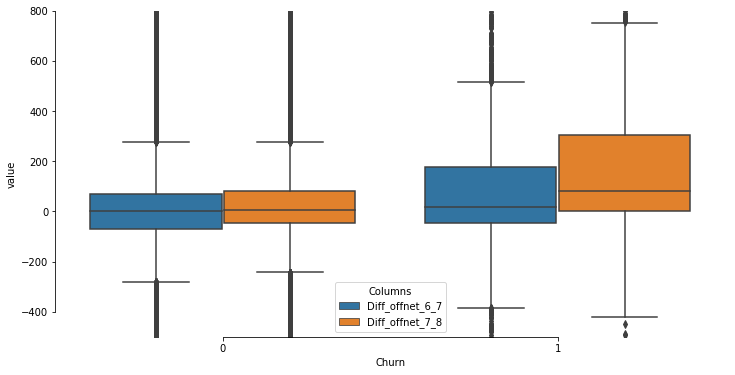

In [58]:
#plotting box plots for 'Diff_offnet_6_7','Diff_offnet_7_8' with respect to churn
plt.figure(figsize=(12,6))
plt.ylim(-500,800)
adf=highValueDf[['Diff_offnet_6_7','Diff_offnet_7_8','Churn']]
ax = (adf.set_index('Churn', append=True)
      .stack()                       
      .to_frame()                   
      .reset_index()                
      .rename(columns={'level_2': 'Columns', 0: 'value'})
      .pipe((sns.boxplot, 'data'), x='Churn', y='value', hue='Columns', order=[0, 1]))
sns.despine(trim=True)

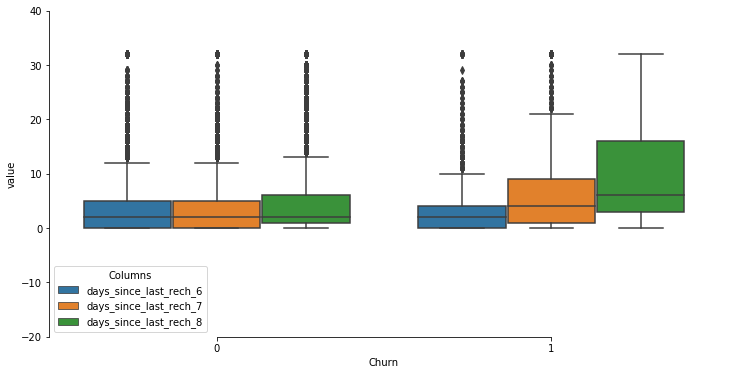

In [59]:
#plotting box plots for 'days_since_last_rech_6','days_since_last_rech_7','days_since_last_rech_8' with respect to churn
plt.figure(figsize=(12,6))
plt.ylim(-20,40)
adf=highValueDf[['days_since_last_rech_6','days_since_last_rech_7','days_since_last_rech_8','Churn']]
ax = (adf.set_index('Churn', append=True)
      .stack()                       
      .to_frame()                   
      .reset_index()                
      .rename(columns={'level_2': 'Columns', 0: 'value'})
      .pipe((sns.boxplot, 'data'), x='Churn', y='value', hue='Columns', order=[0, 1]))
sns.despine(trim=True)

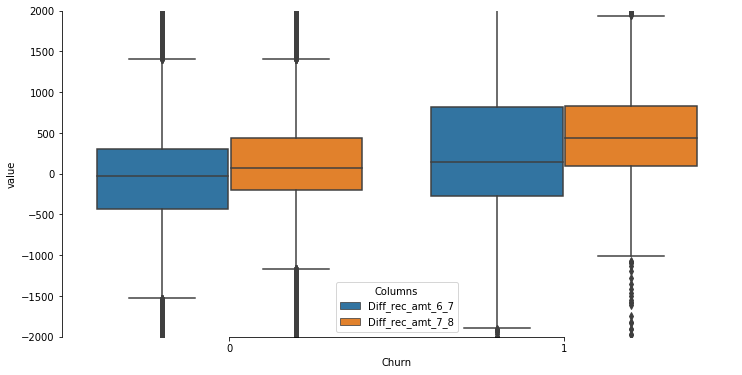

In [60]:
#Plotting box plots for 'Diff_rec_amt_6_7','Diff_rec_amt_7_8' with respect to churn
plt.figure(figsize=(12,6))
plt.ylim(-2000,2000)
adf=highValueDf[['Diff_rec_amt_6_7','Diff_rec_amt_7_8','Churn']]
ax = (adf.set_index('Churn', append=True)
      .stack()                       
      .to_frame()                   
      .reset_index()                
      .rename(columns={'level_2': 'Columns', 0: 'value'})
      .pipe((sns.boxplot, 'data'), x='Churn', y='value', hue='Columns', order=[0, 1]))
sns.despine(trim=True)

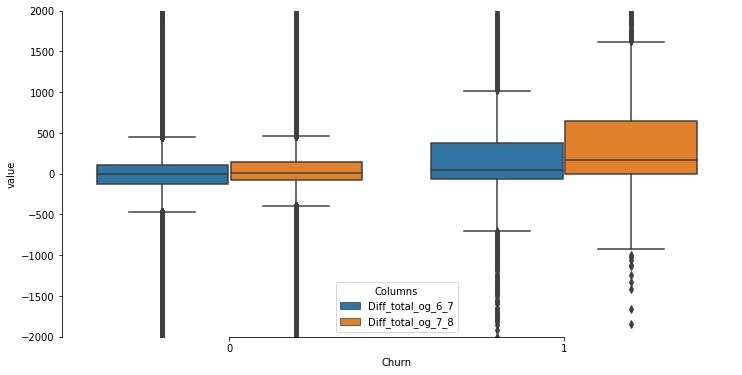

In [61]:
#Plotting box plots for 'Diff_total_og_6_7','Diff_total_og_7_8' with respect to churn
plt.figure(figsize=(12,6))
plt.ylim(-2000,2000)
adf=highValueDf[['Diff_total_og_6_7','Diff_total_og_7_8','Churn']]
ax = (adf.set_index('Churn', append=True)
      .stack()                       
      .to_frame()                   
      .reset_index()                
      .rename(columns={'level_2': 'Columns', 0: 'value'})
      .pipe((sns.boxplot, 'data'), x='Churn', y='value', hue='Columns', order=[0, 1]))
sns.despine(trim=True)

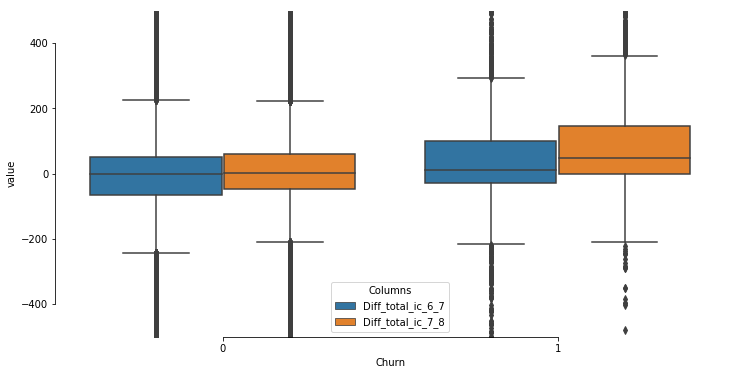

In [62]:
#Plotting box plots for 'Diff_total_ic_6_7','Diff_total_ic_7_8' with respect to churn
plt.figure(figsize=(12,6))
plt.ylim(-500,500)
adf=highValueDf[['Diff_total_ic_6_7','Diff_total_ic_7_8','Churn']]
ax = (adf.set_index('Churn', append=True)
      .stack()                       
      .to_frame()                   
      .reset_index()                
      .rename(columns={'level_2': 'Columns', 0: 'value'})
      .pipe((sns.boxplot, 'data'), x='Churn', y='value', hue='Columns', order=[0, 1]))
sns.despine(trim=True)

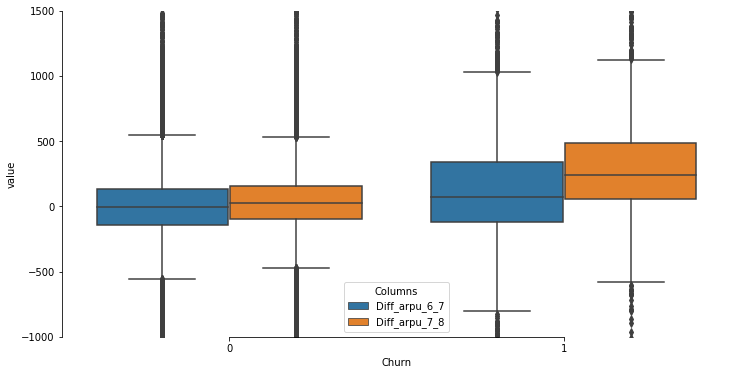

In [63]:
#Plotting box plots for 'Diff_arpu_6_7','Diff_arpu_7_8' with respect to churn
plt.figure(figsize=(12,6))
plt.ylim(-1000,1500)
adf=highValueDf[['Diff_arpu_6_7','Diff_arpu_7_8','Churn']]
ax = (adf.set_index('Churn', append=True)
      .stack()                       
      .to_frame()                   
      .reset_index()                
      .rename(columns={'level_2': 'Columns', 0: 'value'})
      .pipe((sns.boxplot, 'data'), x='Churn', y='value', hue='Columns', order=[0, 1]))
sns.despine(trim=True)

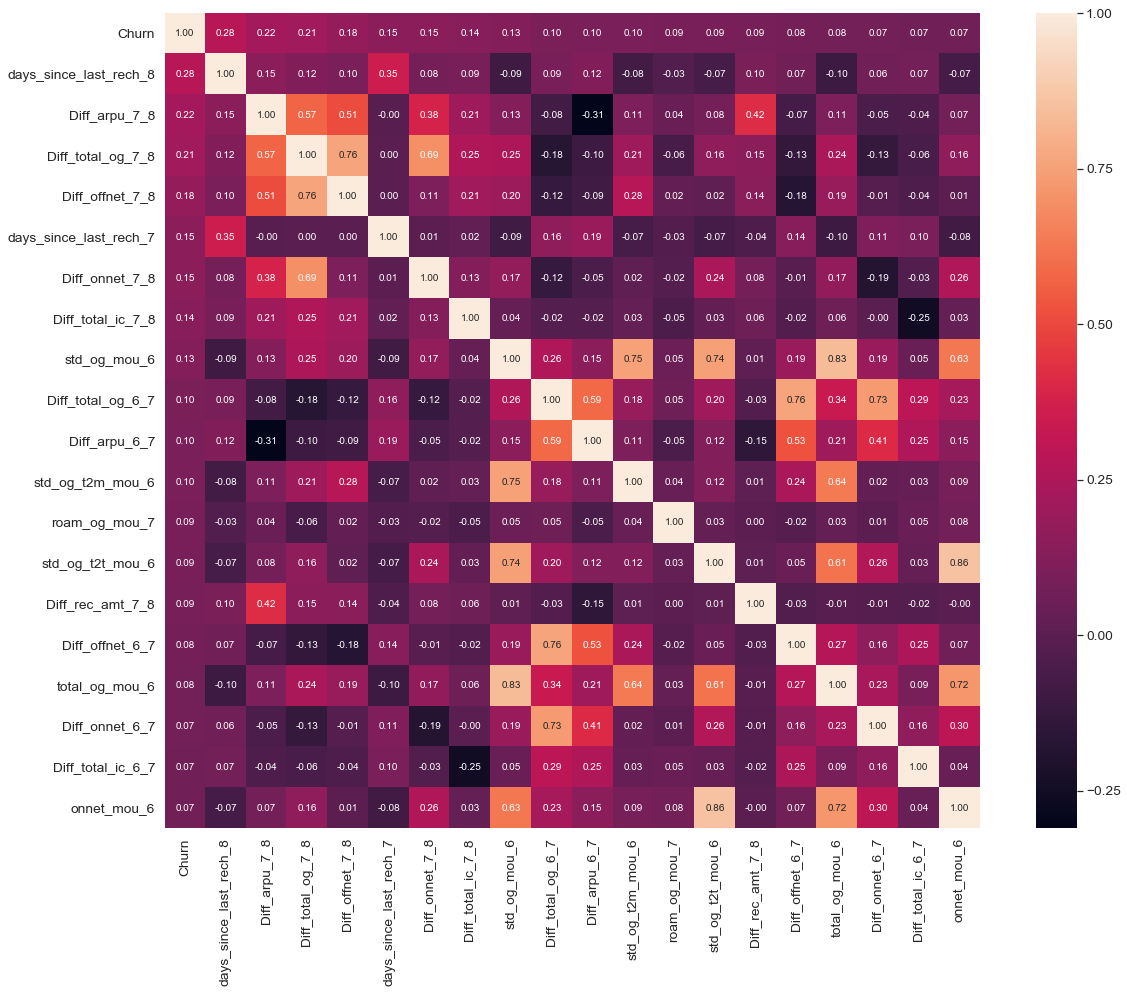

In [64]:
# Showing the correlation matrix for 20 features having the highest correlation value
corrmat=highValueDf.corr()
cols = corrmat.nlargest(20,'Churn')['Churn'].index
p = np.corrcoef(highValueDf[cols].values.T)
plt.figure(figsize=(20,15))
sns.set(font_scale=1.25)
hm = sns.heatmap(p, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

#### We can see that that the variables are quite highly correlated, for eg. Diff_offnet_7_8 and Diff_total_og_7_8. Thus, we can proceed with PCA to deal with this multicollinearity.

#### Outlier Treatment

In [65]:
for col in highValueDf.columns:
    if(col in categoricalCols):
        continue
        
    Q1 = highValueDf[col].quantile(0.01)
    Q3 = highValueDf[col].quantile(0.99)
    IQR = Q3 - Q1
    highValueDf = highValueDf[((highValueDf[col] >= (Q1 - 1.5 * IQR))& (highValueDf[col] <= (Q3 + 1.5 * IQR)))]

In [66]:
#Checking shape of the dataframe post outlier treatment
highValueDf.shape

(26755, 174)

In [67]:
# Ensuring that the values in categorical column are of type int
# This is required because some of the categorical cols had float type
categoricalCol = ['night_pck_user_6','night_pck_user_7','night_pck_user_8',
                              'fb_user_6','fb_user_7','fb_user_8','Churn']
for i in categoricalCol:
    highValueDf[i]=highValueDf[i].astype('int64')

In [68]:
#create dummy for net_tenure
dummies = pd.get_dummies(highValueDf['net_tenure'],prefix='net_tenure',drop_first=True)

# Merging the dummies to the dataframe
highValueDf = pd.concat([highValueDf, dummies], axis = 1)

# Dropping the actual categorical columns
highValueDf.drop(columns=['net_tenure'],inplace=True)

In [69]:
#Renaming the columns for which we created dummy variables

highValueDf=highValueDf.rename({"net_tenure_(1, 2]": "net_tenure_1_to_2","net_tenure_(2, 5]":"net_tenure_2_to_5",
                   "net_tenure_(5, 12]":"net_tenure_5_to_12"},axis=1)

#Checking the dataframe pre-modelling
highValueDf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26755 entries, 7000842753 to 7000498689
Data columns (total 176 columns):
arpu_6                     26755 non-null float64
arpu_7                     26755 non-null float64
arpu_8                     26755 non-null float64
onnet_mou_6                26755 non-null float64
onnet_mou_7                26755 non-null float64
onnet_mou_8                26755 non-null float64
offnet_mou_6               26755 non-null float64
offnet_mou_7               26755 non-null float64
offnet_mou_8               26755 non-null float64
roam_ic_mou_6              26755 non-null float64
roam_ic_mou_7              26755 non-null float64
roam_ic_mou_8              26755 non-null float64
roam_og_mou_6              26755 non-null float64
roam_og_mou_7              26755 non-null float64
roam_og_mou_8              26755 non-null float64
loc_og_t2t_mou_6           26755 non-null float64
loc_og_t2t_mou_7           26755 non-null float64
loc_og_t2t_mou_8          

## Step 4: Splitting the Data into Training and Testing Sets

In [70]:
#Putting feature variables to X
X = highValueDf.drop("Churn", axis = 1)

#Putting response variable to y
y = highValueDf['Churn']

#Splitting the data into test and train set
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

## Step 5: Feature Scaling

In [71]:
# Scaling all the numeric columns
scaler = StandardScaler()

cols = X.columns

X_train[cols] = scaler.fit_transform(X_train[cols])


X_test[cols] = scaler.transform(X_test[cols])

X_train.head()

arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  \
mobile_number                                                           
7002289551    -0.029823  0.026441 -0.194865    -0.073796    -0.055250   
7002201287     0.152907 -0.479831 -0.543102     0.883031    -0.070093   
7001022145    -1.078745 -0.200825 -1.093163    -0.600111    -0.597496   
7001697847    -0.349225 -0.032268  0.502163     0.032149     0.005399   
7001546219    -0.053591 -0.196132 -0.034541    -0.594823    -0.573918   

               onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  \
mobile_number                                                          
7002289551       -0.169695      0.167187      0.096400      0.029956   
7002201287       -0.330598     -0.029012     -0.018293      0.019317   
7001022145       -0.551161     -0.805788     -0.795831     -0.738475   
7001697847       -0.201183     -0.001533      0.075721      0.308310   
7001546219       -0.549062     -0.676501     -0.767576     -0.670531   

               roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  \
mobile_number                                                               
7002289551         -0.239366      -0.156087      -0.221914       -0.25638   
7002201287         -0.239366      -0.214059      -0.221914       -0.25638   
7001022145         -0.239366      -0.214059      -0.221914       -0.25638   
7001697847         -0.239366      -0.214059       0.264635       -0.25638   
7001546219         -0.239366      -0.214059      -0.221914       -0.25638   

               roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  \
mobile_number                                                   
7002289551          0.057427      -0.242386          0.839765   
7002201287         -0.240609      -0.242386         -0.335145   
7001022145         -0.240609      -0.242386         -0.454596   
7001697847         -0.240609       0.435129         -0.122895   
7001546219         -0.240609      -0.242386         -0.446757   

               loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
mobile_number                                                         
7002289551             0.921685          0.579285          0.205146   
7002201287            -0.407565         -0.433444         -0.494699   
7001022145            -0.460465         -0.466303         -0.683598   
7001697847            -0.263112         -0.185617          0.310567   
7001546219            -0.430546         -0.460549         -0.522125   

               loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  \
mobile_number                                                         
7002289551             0.190594          0.188422          2.060982   
7002201287            -0.622243         -0.545599         -0.368792   
7001022145            -0.701677         -0.671810         -0.368792   
7001697847             0.201337          0.204100          0.215138   
7001546219            -0.662540         -0.569209         -0.349847   

               loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2c_mou_6  \
mobile_number                                                         
7002289551             1.514314          1.680171         -0.307315   
7002201287            -0.359957         -0.370376          1.160083   
7001022145            -0.377840         -0.370376         -0.307315   
7001697847             0.310654         -0.213997         -0.307315   
7001546219            -0.163932         -0.370376         -0.307315   

               loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  loc_og_mou_7  \
mobile_number                                                                   
7002289551            -0.311947          0.494840      0.669305      0.679336   
7002201287            -0.311947         -0.304459     -0.542793     -0.669954   
7001022145            -0.311947         -0.304459     -0.739299     -0.754661   
7001697847            -0.311947         -0.304459      0.169998      0.022965   
7001546219            -0

## Step 6: Model Building

### PCA + Logistic Regression

In [72]:
# Creating a pca object
pca = PCA(svd_solver='randomized', random_state=100)

# Fitting the data into pca
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=100,
  svd_solver='randomized', tol=0.0, whiten=False)

In [73]:
# look at explainded variance of PCA components
print(pd.Series(np.round(pca.explained_variance_ratio_.cumsum(), 4)*100))

0       11.04
1       20.44
2       26.40
3       31.46
4       35.30
5       38.63
6       41.77
7       44.36
8       46.66
9       48.81
10      50.86
11      52.88
12      54.74
13      56.38
14      57.95
15      59.39
16      60.78
17      62.12
18      63.38
19      64.55
20      65.59
21      66.58
22      67.56
23      68.51
24      69.43
25      70.32
26      71.19
27      72.03
28      72.86
29      73.67
30      74.48
31      75.26
32      75.98
33      76.69
34      77.37
35      78.04
36      78.70
37      79.34
38      79.96
39      80.58
40      81.18
41      81.76
42      82.32
43      82.86
44      83.40
45      83.93
46      84.44
47      84.92
48      85.40
49      85.87
50      86.32
51      86.76
52      87.19
53      87.61
54      88.02
55      88.43
56      88.82
57      89.21
58      89.58
59      89.94
60      90.29
61      90.63
62      90.97
63      91.29
64      91.60
65      91.91
66      92.20
67      92.50
68      92.78
69      93.06
70      93.33
71    

Text(0, 0.5, 'Variance Explained')

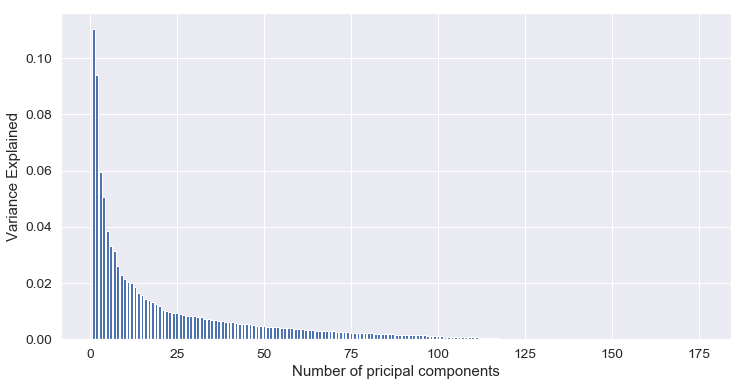

In [74]:
#Plotting a barplot to see the amount of variance explained by the PCAs
fig = plt.figure(figsize = (12,6))
plt.bar(range(1,len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_)
plt.xlabel('Number of pricipal components')
plt.ylabel('Variance Explained')

We can see that the maximum variance of around 11% is explained by the first principal component.

In [75]:
#Calculating the cumulative variance explained by the Principal Components
var_cumu = np.cumsum(pca.explained_variance_ratio_)

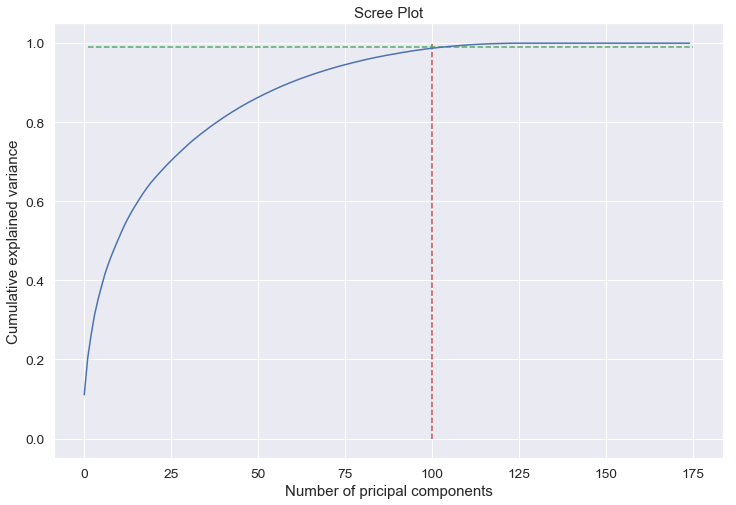

In [76]:
#Plotting the screeplot
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(var_cumu)
plt.vlines(x=100, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.99, xmax=175, xmin=1, colors="g", linestyles="--")
plt.title("Scree Plot")
plt.xlabel('Number of pricipal components')
plt.ylabel('Cumulative explained variance')
plt.show()

#### 100 components can explain about 99% of the variance in data.

In [77]:
# Creating a pipeline to execute the PCA and logistic regression
steps = [("pca", PCA(svd_solver='randomized', n_components=100)),
         ("logistic", LogisticRegression(class_weight='balanced'))
        ]
pipeline = Pipeline(steps)

# fit model
pipeline.fit(X_train, y_train)

# check score on train data
pipeline.score(X_train, y_train)

0.8344190516873131

In [78]:
# predict churn on test data
y_pred = pipeline.predict(X_test)

# create onfusion matrix
confusion = confusion_matrix(y_test, y_pred)
confusion

array([[6165, 1206],
       [ 108,  548]], dtype=int64)

In [79]:
#Calculating Precision- (TP/TP+FP)
metrics.precision_score(y_test, y_pred)

0.3124287343215507

In [80]:
# Calculating Sensitivity/Recall- (TP/TP+FN)
metrics.recall_score(y_test, y_pred)

0.8353658536585366

In [81]:
y_pred_prob = pipeline.predict_proba(X_test)[:, 1]

In [82]:
# Calculating the area under curve
metrics.roc_auc_score(y_test, y_pred_prob)

0.9073567391656824

#### Our objective is to classify the churns correctly.We should look at Recall because recall tells us out of those that actually churned,how many were classified correctly by our model?
#### As we know in case of telecom churn prediction, even if we predict a customer as churn but actually who is not churning, it won't affect much. The reason behind this is, the company might end up providing offers to these customers & which would eventually result into the retaining of these customers. But the most important part is the prediction of customer as non-churn but in actual who is churning. Therefore, recall value must be maximum so as to avoid any customer loss. Also, would help targeting these customers for retention by marketing strategies.

In [83]:
# Tuning Hyperparameters

# create pipeline
steps = [("pca", PCA(random_state=100)),
         ("logistic", LogisticRegression(random_state=100))
        ]

# compile pipeline
pca_logistic = Pipeline(steps)

# hyperparameter space
params = {'pca__n_components': [60, 76, 100, 120], 
          'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 
          'logistic__penalty': ['l1', 'l2'],
          'logistic__class_weight': ['balanced', {0:0.1, 1: 0.9}]
         }

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 100)

# create gridsearch object
model = GridSearchCV(estimator=pca_logistic, cv=5, param_grid=params, scoring='recall', n_jobs=-1, verbose=1)

In [84]:
#Fitting the model
model.fit(X_train, y_train)

Fitting 5 folds for each of 128 candidates, totalling 640 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   35.3s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 640 out of 640 | elapsed:  8.2min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('pca', PCA(copy=True, iterated_power='auto', n_components=None, random_state=100,
  svd_solver='auto', tol=0.0, whiten=False)), ('logistic', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=100, solver='warn',
          tol=0.0001, verbose=0, warm_start=False))]),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'pca__n_components': [60, 76, 100, 120], 'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 'logistic__penalty': ['l1', 'l2'], 'logistic__class_weight': ['balanced', {0: 0.1, 1: 0.9}]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='recall', verbose=1)

In [85]:
# cross validation results
pd.DataFrame(model.cv_results_).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       2.324822      0.233175         0.034999        0.007960   
1       2.168480      0.056582         0.032966        0.000932   
2       2.658241      0.028668         0.036703        0.001801   
3       3.100335      0.043081         0.041123        0.003441   
4       1.854081      0.072682         0.042839        0.006925   

  param_logistic__C param_logistic__class_weight param_logistic__penalty  \
0               0.1                     balanced                      l1   
1               0.1                     balanced                      l1   
2               0.1                     balanced                      l1   
3               0.1                     balanced                      l1   
4               0.1                     balanced                      l2   

  param_pca__n_components                                             params  \
0                      60  {'logistic__C': 0.1, 'logistic__class_weight':...   
1                      76  {'logistic__C': 0.1, 'logistic__class_weight':...   
2                     100  {'logistic__C': 0.1, 'logistic__class_weight':...   
3                     120  {'logistic__C': 0.1, 'logistic__class_weight':...   
4                      60  {'logistic__C': 0.1, 'logistic__class_weight':...   

   split0_test_score  split1_test_score  split2_test_score  split3_test_score  \
0           0.833333           0.843333           0.806020           0.785953   
1           0.813333           0.836667           0.799331           0.799331   
2           0.826667           0.826667           0.809365           0.799331   
3           0.830000           0.836667           0.799331           0.799331   
4           0.833333           0.843333           0.809365           0.785953   

   split4_test_score  mean_test_score  std_test_score  rank_test_score  \
0           0.866221         0.826974        0.028177               34   
1           0.866221         0.822976        0.025567               64   
2           0.876254         0.827656        0.026458               32   
3           0.872910         0.827648        0.027345               33   
4           0.869565         0.828311        0.028654               31   

   split0_train_score  split1_train_score  split2_train_score  \
0            0.837093            0.835422            0.846411   
1            0.838764            0.843776            0.845576   
2            0.842941            0.849624            0.855593   
3            0.848789            0.853801            0.860601   
4            0.837928            0.837928            0.845576   

   split3_train_score  split4_train_score  mean_train_score  std_train_score  
0            0.839733            0.833055          0.838343         0.004584  
1            0.839733            0.836394          0.840849         0.003357  
2            0.851419            0.845576          0.849030         0.004430  
3            0.849750            0.846411          0.851870         0.004975  
4            0.838898            0.833890          0.838844         0.003783

In [86]:
#Obtaining the best hyperparameters
model.best_params_

{'logistic__C': 0.1,
 'logistic__class_weight': 'balanced',
 'logistic__penalty': 'l2',
 'pca__n_components': 100}

In [87]:
model.best_score_

0.8316652850381236

In [88]:
# predict churn on test data
y_pred = model.predict(X_test)

# create onfusion matrix
confusion = confusion_matrix(y_test, y_pred)
confusion

array([[6159, 1212],
       [ 108,  548]], dtype=int64)

In [89]:
# Precision- (TP/TP+FP)
metrics.precision_score(y_test, y_pred)

0.31136363636363634

In [90]:
# Sensitivity/Recall -(TP/TP+FN)
metrics.recall_score(y_test, y_pred)

0.8353658536585366

In [91]:
y_pred_prob = model.predict_proba(X_test)[:, 1]

In [92]:
# Calculating the area under curve
metrics.roc_auc_score(y_test, y_pred_prob)

0.9072090774326548

## Random Forest

### Optimal max_depth

In [93]:
# tuning hyperparameter max_depth
params = {
           'max_depth': range(10, 100, 10)
         }

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 100)

# create gridsearch object
model = GridSearchCV(estimator=RandomForestClassifier(class_weight='balanced_subsample', random_state=100), 
                     cv=folds, param_grid=params, scoring='recall', n_jobs=-1, verbose=1, return_train_score=True)

In [94]:
#Fit Model
model.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:   32.3s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=100, shuffle=True),
       error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced_subsample',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators='warn', n_jobs=None, oob_score=False,
            random_state=100, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': range(10, 100, 10)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='recall', verbose=1)

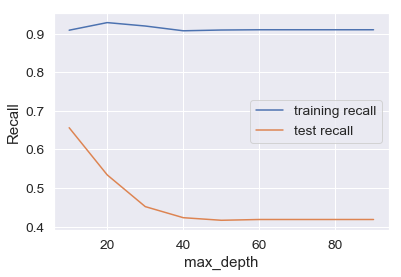

In [95]:
# plotting accuracies with max_depth
scores = model.cv_results_
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training recall")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test recall")
plt.xlabel("max_depth")
plt.ylabel("Recall")
plt.legend()
plt.show()

In [96]:
model.best_params_

{'max_depth': 10}

In [97]:
model.best_score_

0.6559610473613454

### Optimal min_samples_leaf

In [98]:
# tuning hyperparameter min_samples_leaf
params = {
           'min_samples_leaf': range(200, 1000, 50)
         }

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 100)

# create gridsearch object
model = GridSearchCV(estimator=RandomForestClassifier(class_weight='balanced_subsample', random_state=100), 
                     cv=folds, param_grid=params, scoring='recall', n_jobs=-1, verbose=1, return_train_score=True)

In [99]:
model.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   16.3s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:   27.3s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=100, shuffle=True),
       error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced_subsample',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators='warn', n_jobs=None, oob_score=False,
            random_state=100, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'min_samples_leaf': range(200, 1000, 50)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='recall', verbose=1)

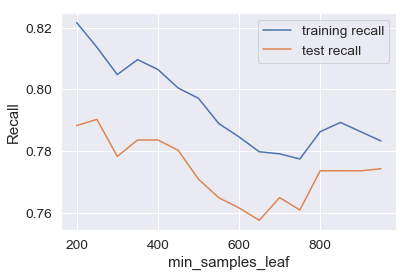

In [100]:
# plotting accuracies with min_samples_leaf
scores = model.cv_results_
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training recall")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test recall")
plt.xlabel("min_samples_leaf")
plt.ylabel("Recall")
plt.legend()
plt.show()

In [101]:
model.best_params_

{'min_samples_leaf': 250}

In [102]:
model.best_score_

0.7902346101700244

### Optimal min_samples_split

In [103]:
# tuning hyperparameter min_samples_split
params = {
           'min_samples_split': range(200, 1000, 50)
         }

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 100)

# create gridsearch object
model = GridSearchCV(estimator=RandomForestClassifier(class_weight='balanced_subsample', random_state=100), 
                     cv=folds, param_grid=params, scoring='recall', n_jobs=-1, verbose=1, return_train_score=True)

In [104]:
model.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   24.5s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:   42.7s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=100, shuffle=True),
       error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced_subsample',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators='warn', n_jobs=None, oob_score=False,
            random_state=100, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'min_samples_split': range(200, 1000, 50)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='recall', verbose=1)

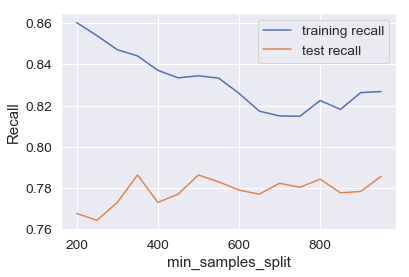

In [105]:
# plotting accuracies with min_samples_split
scores = model.cv_results_
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training recall")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test recall")
plt.xlabel("min_samples_split")
plt.ylabel("Recall")
plt.legend()
plt.show()

In [106]:
model.best_params_

{'min_samples_split': 350}

In [107]:
model.best_score_

0.7862293684344369

### Tuning all hyper-parameters

In [108]:
# tuning hyperparameters
params = {
            'max_depth': [10,20,30],
            'min_samples_leaf': [200, 250, 300, 350],
            'min_samples_split': [700, 800, 900, 1000], 
            'max_features': ['auto', 0.3]
         }

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 100)

# create gridsearch object
model = GridSearchCV(estimator=RandomForestClassifier(class_weight='balanced_subsample', random_state=100), 
                     cv=folds, param_grid=params, scoring='recall', n_jobs= -1, verbose=1)

In [109]:
model.fit(X_train, y_train)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  9.9min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed: 12.8min
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed: 13.4min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=100, shuffle=True),
       error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced_subsample',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators='warn', n_jobs=None, oob_score=False,
            random_state=100, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': [10, 20, 30], 'min_samples_leaf': [200, 250, 300, 350], 'min_samples_split': [700, 800, 900, 1000], 'max_features': ['auto', 0.3]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='recall', verbose=1)

In [110]:
model.best_params_

{'max_depth': 10,
 'max_features': 0.3,
 'min_samples_leaf': 200,
 'min_samples_split': 800}

In [111]:
model.best_score_

0.8243024502149412

In [112]:
# predict churn on test data
y_pred = model.predict(X_test)

# create onfusion matrix
confusion = confusion_matrix(y_test, y_pred)
confusion

array([[6471,  900],
       [  88,  568]], dtype=int64)

In [113]:
# Precision TP/TP+FP
metrics.precision_score(y_test, y_pred)

0.3869209809264305

In [114]:
# Sensitivity/Recall TP/TP+FN
metrics.recall_score(y_test, y_pred)

0.8658536585365854

In [115]:
y_pred_prob = model.predict_proba(X_test)[:, 1]

In [116]:
metrics.roc_auc_score(y_test, y_pred_prob)

0.9400885267247056

#### Random forest gives better sensitivity/recall score and auc score as compared to PCA + logistic.

### Feature Importance

In [117]:
# Finding the important features
importance = model.best_estimator_.feature_importances_

# Variables
features= X.columns

# create dataframe
featureImportance = pd.DataFrame({'features': features, 'percentage': importance*100})
featureImportance = featureImportance[['features', 'percentage']]

# sort features
featureImportance = featureImportance.sort_values('percentage', ascending=False).reset_index(drop=True)
featureImportance

features  percentage
0           loc_ic_t2m_mou_8   18.372963
1           loc_ic_t2t_mou_8   11.708525
2               loc_ic_mou_8    9.909099
3    Tot_rec_amt_call_data_8    8.492464
4             total_ic_mou_8    7.667836
5               loc_og_mou_8    5.907763
6             total_og_mou_8    5.290492
7          Diff_total_og_7_8    4.946835
8              roam_ic_mou_8    4.687629
9         last_day_rch_amt_8    3.496018
10    days_since_last_rech_8    3.151499
11             roam_og_mou_8    3.000979
12             Diff_arpu_7_8    2.893044
13        av_rech_amt_data_8    2.138203
14                 fb_user_8    1.233348
15                    arpu_8    0.957675
16         Diff_total_ic_7_8    0.945066
17               vol_3g_mb_8    0.819620
18          loc_og_t2m_mou_8    0.635578
19          total_rech_num_7    0.631543
20          std_og_t2m_mou_8    0.248068
21          loc_og_t2t_mou_8    0.198942
22            max_rech_amt_8    0.195231
23          std_og_t2m_mou_7    0.160788
24          loc_ic_t2f_mou_6    0.150104
25              std_og_mou_6    0.149333
26           max_rech_data_8    0.143187
27          loc_ic_t2m_mou_6    0.136912
28               onnet_mou_6    0.125259
29            total_og_mou_7    0.113745
30          loc_ic_t2t_mou_6    0.113114
31         Diff_data_vol_7_8    0.108241
32            Diff_onnet_7_8    0.104335
33                 arpu_3g_6    0.101027
34              std_ic_mou_7    0.100332
35             Diff_arpu_6_7    0.099169
36            max_rech_amt_7    0.097697
37            total_ic_mou_6    0.095349
38           Diff_offnet_7_8    0.075193
39            Diff_onnet_6_7    0.069513
40              isd_og_mou_7    0.062076
41              std_ic_mou_8    0.060633
42              offnet_mou_7    0.060222
43              std_ic_mou_6    0.060060
44         Diff_total_ic_6_7    0.026585
45             roam_og_mou_6    0.025132
46          loc_ic_t2t_mou_7    0.022500
47              std_og_mou_7    0.021219
48          total_rech_num_8    0.021105
49          total_rech_amt_6    0.020857
50          std_ic_t2t_mou_7    0.020282
51              loc_og_mou_7    0.017405
52                 arpu_2g_7    0.017136
53          loc_og_t2m_mou_6    0.016592
54           max_rech_data_7    0.014290
55               vol_2g_mb_6    0.014229
56              isd_og_mou_6    0.013231
57           Diff_offnet_6_7    0.008144
58    days_since_last_rech_6    0.007830
59        Diff_arpu_data_6_7    0.004225
60          std_ic_t2t_mou_6    0.003261
61          loc_og_t2c_mou_6    0.003223
62            max_rech_amt_6    0.003028
63              offnet_mou_8    0.002810
64            total_ic_mou_7    0.000840
65               onnet_mou_7    0.000687
66          loc_og_t2f_mou_6    0.000679
67                 arpu_2g_8    0.000000
68           count_rech_3g_8    0.000000
69        av_rech_amt_data_6    0.000000
70          night_pck_user_7    0.000000
71          night_pck_user_6    0.000000
72                 arpu_2g_6    0.000000
73               vol_2g_mb_8    0.000000
74                 arpu_3g_8    0.000000
75                 arpu_3g_7    0.000000
76          night_pck_user_8    0.000000
77               vol_2g_mb_7    0.000000
78               vol_3g_mb_7    0.000000
79        av_rech_amt_data_7    0.000000
80               vol_3g_mb_6    0.000000
81                    arpu_6    0.000000
82              monthly_2g_6    0.000000
83                  vbc_3g_8    0.000000
84         net_tenure_2_to_5    0.000000
85         net_tenure_1_to_2    0.000000
86         Diff_data_vol_6_7    0.000000
87        Diff_arpu_data_7_8    0.000000
88         Diff_total_og_6_7    0.000000
89          Diff_rec_amt_7_8    0.000000
90          Diff_rec_amt_6_7    0.000000
91   Tot_rec_amt_call_data_7    0.000000
92   Tot_rec_amt_call_data_6    0.000000
93    days_since_last_rech_7    0.000000
94                  vbc_3g_6    0.000000
95                  vbc_3g_7    0.000000
96                 fb_user_7    0.000000
97

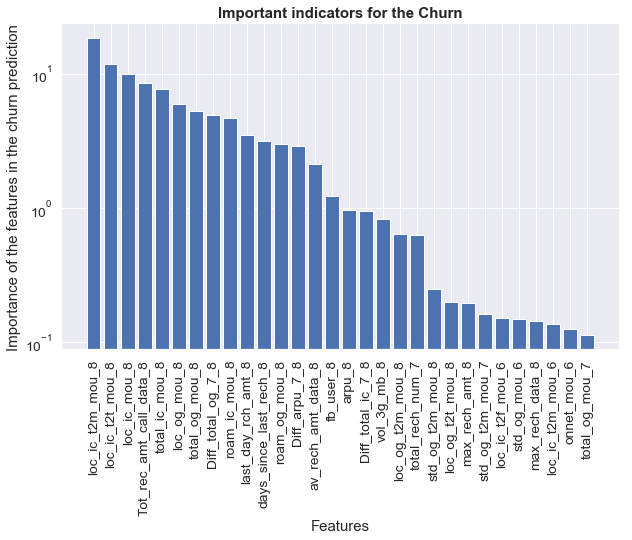

In [118]:
# Plotting the features important for the churn
plt.figure(figsize=(10,6))
plt.title('Important indicators for the Churn', fontsize=15, fontweight='bold')
plt.bar(featureImportance['features'].iloc[0:30], featureImportance['percentage'].iloc[0:30])
plt.xlabel('Features', fontsize=15)
plt.ylabel('Importance of the features in the churn prediction', fontsize=15)
plt.xticks( rotation=90)
plt.yscale('log')
plt.show()

In [119]:
# extract top 30 features
top_features = featureImportance.features[0:30]

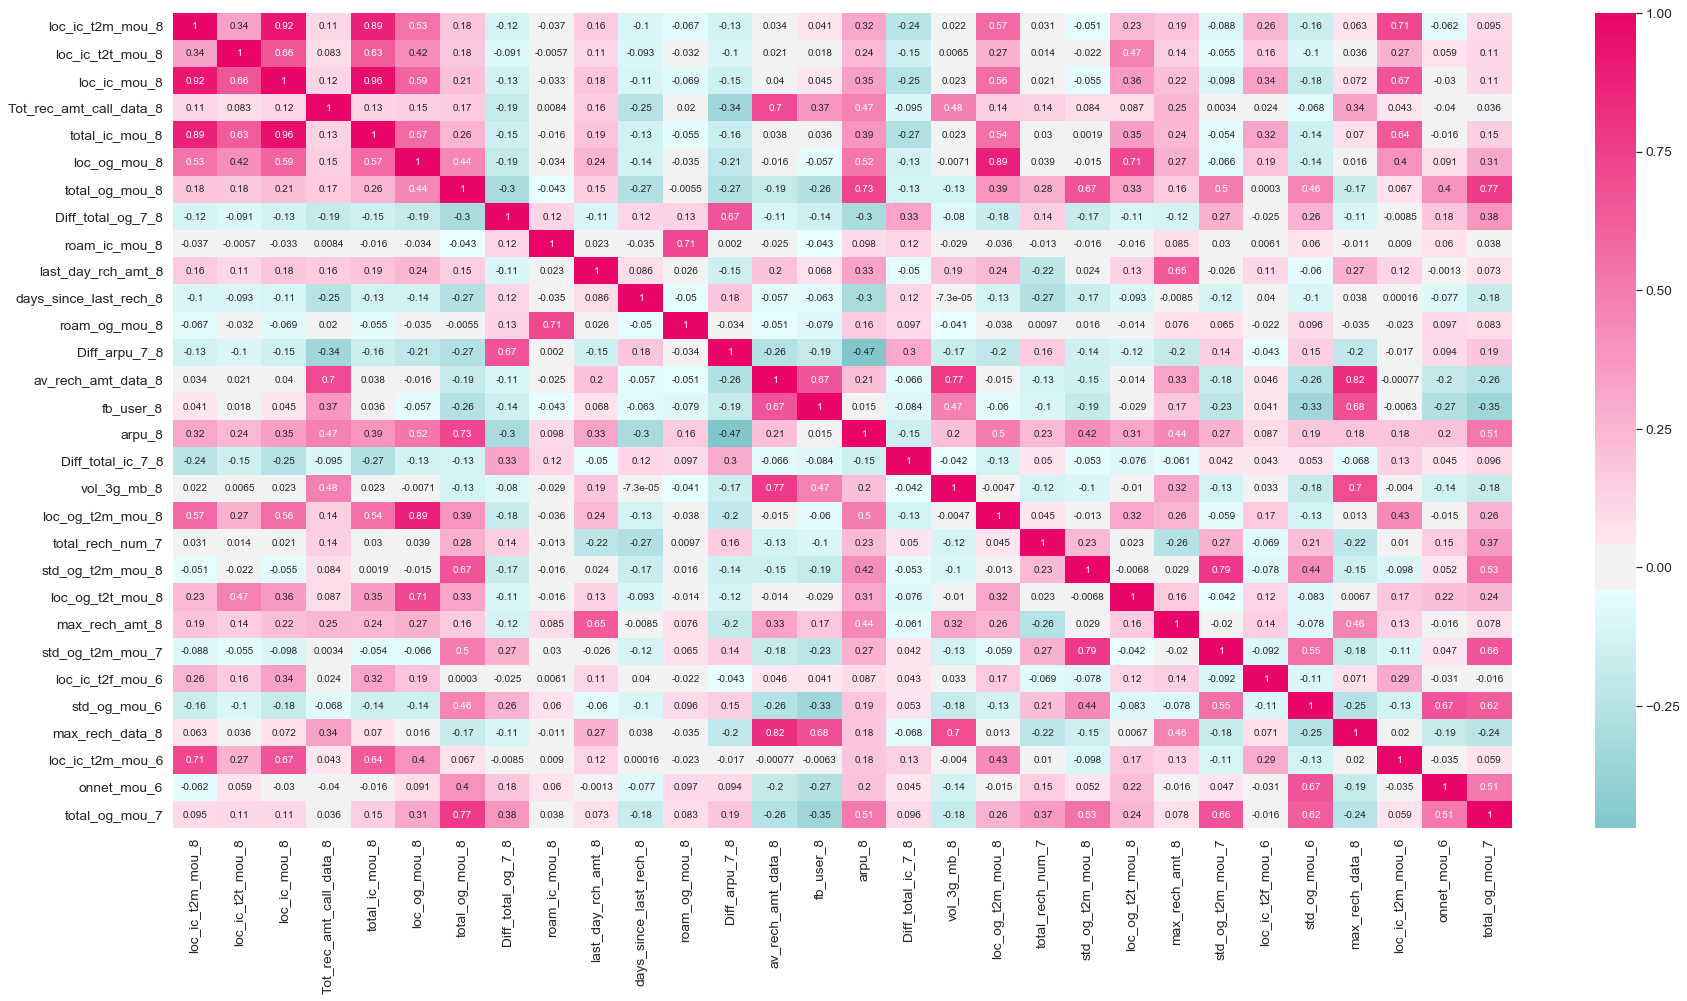

In [120]:
# plot heat map to check correlation between the variables
import seaborn as sns
plt.rcParams["figure.figsize"] =(30,15)
mycmap = sns.diverging_palette(199, 359, s=99, center="light", as_cmap=True)
sns.heatmap(data=X_train[top_features].corr(), center=0.0, cmap=mycmap,annot=True)

## Finding the coefficients of the variables

In [121]:
#Applying logistic regression to the important features obtained from Random Forest
X_train = X_train[top_features]
X_test = X_test[top_features]

In [122]:
# Building a logistic model and tuning hyperparameter
param = {
          'C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 
          'penalty': ['l1', 'l2'],
          'class_weight': ['balanced', {0:0.1, 1: 0.9}]
        }

# 5 folds
fold = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# creating gridsearch
model = GridSearchCV(estimator = LogisticRegression(random_state=100), cv = fold, param_grid = param, 
                     scoring = 'recall', n_jobs = -1, verbose = 1)

In [123]:
# fitting the model
def FitModel(model,X_train,y_train):
    model.fit(X_train, y_train)
    print("Model best score : ", model.best_score_,sep='')
    print("Model best params : ", model.best_params_,sep='')

In [124]:
# VIF calculations
def CalculateVIF(X_train):
    vif = pd.DataFrame()
    vif['Features'] = X_train.columns
    vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    print(vif)

In [125]:
# Iteration-1
FitModel(model,X_train,y_train)
CalculateVIF(X_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   15.5s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:  1.8min finished


Model best score : 0.8229628205604423
Model best params : {'C': 0.1, 'class_weight': 'balanced', 'penalty': 'l1'}
                   Features     VIF
29           total_og_mou_7     inf
7         Diff_total_og_7_8     inf
6            total_og_mou_8     inf
5              loc_og_mou_8  647.19
18         loc_og_t2m_mou_8  345.86
2              loc_ic_mou_8  153.27
21         loc_og_t2t_mou_8  150.84
0          loc_ic_t2m_mou_8   86.16
1          loc_ic_t2t_mou_8   21.24
4            total_ic_mou_8   15.64
13       av_rech_amt_data_8   11.93
26          max_rech_data_8    6.90
23         std_og_t2m_mou_7    6.89
15                   arpu_8    5.88
20         std_og_t2m_mou_8    5.44
3   Tot_rec_amt_call_data_8    4.68
25             std_og_mou_6    4.24
28              onnet_mou_6    4.15
17              vol_3g_mb_8    2.72
27         loc_ic_t2m_mou_6    2.63
12            Diff_arpu_7_8    2.53
22           max_rech_amt_8    2.52
14                fb_user_8    2.39
11            roam_og_

In [126]:
# Iteration-2
# Dropping feature with high VIF
X_train.drop('total_og_mou_7',axis=1,inplace=True)
X_test.drop('total_og_mou_7',axis=1,inplace=True)
FitModel(model,X_train,y_train)
CalculateVIF(X_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   12.6s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:  1.4min finished


Model best score : 0.8229628205604423
Model best params : {'C': 0.1, 'class_weight': 'balanced', 'penalty': 'l1'}
                   Features     VIF
5              loc_og_mou_8  647.19
18         loc_og_t2m_mou_8  345.86
2              loc_ic_mou_8  153.27
21         loc_og_t2t_mou_8  150.84
0          loc_ic_t2m_mou_8   86.16
1          loc_ic_t2t_mou_8   21.24
4            total_ic_mou_8   15.64
13       av_rech_amt_data_8   11.93
6            total_og_mou_8    7.86
26          max_rech_data_8    6.90
23         std_og_t2m_mou_7    6.89
15                   arpu_8    5.88
20         std_og_t2m_mou_8    5.44
3   Tot_rec_amt_call_data_8    4.68
25             std_og_mou_6    4.24
28              onnet_mou_6    4.15
7         Diff_total_og_7_8    3.90
17              vol_3g_mb_8    2.72
27         loc_ic_t2m_mou_6    2.63
12            Diff_arpu_7_8    2.53
22           max_rech_amt_8    2.52
14                fb_user_8    2.39
11            roam_og_mou_8    2.25
8             roam_ic_

In [127]:
# Iteration-3
# Dropping feature with high VIF
X_train.drop('loc_og_mou_8',axis=1,inplace=True)
X_test.drop('loc_og_mou_8',axis=1,inplace=True)
FitModel(model,X_train,y_train)
CalculateVIF(X_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   13.7s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:  1.5min finished


Model best score : 0.8236275071111309
Model best params : {'C': 1, 'class_weight': 'balanced', 'penalty': 'l1'}
                   Features     VIF
2              loc_ic_mou_8  149.13
0          loc_ic_t2m_mou_8   83.36
1          loc_ic_t2t_mou_8   20.58
4            total_ic_mou_8   15.62
12       av_rech_amt_data_8   11.93
5            total_og_mou_8    7.83
25          max_rech_data_8    6.89
22         std_og_t2m_mou_7    6.89
14                   arpu_8    5.74
19         std_og_t2m_mou_8    5.44
3   Tot_rec_amt_call_data_8    4.67
24             std_og_mou_6    4.24
27              onnet_mou_6    4.15
6         Diff_total_og_7_8    3.90
16              vol_3g_mb_8    2.72
26         loc_ic_t2m_mou_6    2.63
11            Diff_arpu_7_8    2.53
21           max_rech_amt_8    2.50
13                fb_user_8    2.39
17         loc_og_t2m_mou_8    2.35
10            roam_og_mou_8    2.24
7             roam_ic_mou_8    2.08
23         loc_ic_t2f_mou_6    1.99
8        last_day_rch_am

In [128]:
# Iteration-4
# Dropping feature with high VIF
X_train.drop('loc_ic_mou_8',axis=1,inplace=True)
X_test.drop('loc_ic_mou_8',axis=1,inplace=True)
FitModel(model,X_train,y_train)
CalculateVIF(X_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:   24.9s finished


Model best score : 0.821625242216568
Model best params : {'C': 0.1, 'class_weight': 'balanced', 'penalty': 'l1'}
                   Features    VIF
3            total_ic_mou_8  14.11
11       av_rech_amt_data_8  11.93
0          loc_ic_t2m_mou_8  10.58
4            total_og_mou_8   7.83
24          max_rech_data_8   6.89
21         std_og_t2m_mou_7   6.89
13                   arpu_8   5.74
18         std_og_t2m_mou_8   5.44
2   Tot_rec_amt_call_data_8   4.67
23             std_og_mou_6   4.24
26              onnet_mou_6   4.15
5         Diff_total_og_7_8   3.90
1          loc_ic_t2t_mou_8   3.23
15              vol_3g_mb_8   2.72
25         loc_ic_t2m_mou_6   2.62
10            Diff_arpu_7_8   2.53
20           max_rech_amt_8   2.50
12                fb_user_8   2.39
16         loc_og_t2m_mou_8   2.35
9             roam_og_mou_8   2.24
6             roam_ic_mou_8   2.08
7        last_day_rch_amt_8   1.79
19         loc_og_t2t_mou_8   1.69
17         total_rech_num_7   1.60
14        Di

In [129]:
# Iteration-5
# Dropping feature with high VIF
X_train.drop('total_ic_mou_8',axis=1,inplace=True)
X_test.drop('total_ic_mou_8',axis=1,inplace=True)
FitModel(model,X_train,y_train)
CalculateVIF(X_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:   23.4s finished


Model best score : 0.8242946009456744
Model best params : {'C': 0.1, 'class_weight': 'balanced', 'penalty': 'l2'}
                   Features    VIF
10       av_rech_amt_data_8  11.93
3            total_og_mou_8   7.83
23          max_rech_data_8   6.89
20         std_og_t2m_mou_7   6.89
12                   arpu_8   5.69
17         std_og_t2m_mou_8   5.43
2   Tot_rec_amt_call_data_8   4.67
22             std_og_mou_6   4.24
25              onnet_mou_6   4.15
4         Diff_total_og_7_8   3.90
0          loc_ic_t2m_mou_8   3.17
14              vol_3g_mb_8   2.72
24         loc_ic_t2m_mou_6   2.62
9             Diff_arpu_7_8   2.52
19           max_rech_amt_8   2.49
11                fb_user_8   2.39
15         loc_og_t2m_mou_8   2.34
8             roam_og_mou_8   2.24
5             roam_ic_mou_8   2.08
6        last_day_rch_amt_8   1.79
18         loc_og_t2t_mou_8   1.69
16         total_rech_num_7   1.59
13        Diff_total_ic_7_8   1.53
1          loc_ic_t2t_mou_8   1.42
7    days_s

In [130]:
# Iteration-6
# Dropping feature with high VIF
X_train.drop('av_rech_amt_data_8',axis=1,inplace=True)
X_test.drop('av_rech_amt_data_8',axis=1,inplace=True)
FitModel(model,X_train,y_train)
CalculateVIF(X_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:   15.2s finished


Model best score : 0.8242946009456744
Model best params : {'C': 1, 'class_weight': 'balanced', 'penalty': 'l2'}
                   Features   VIF
3            total_og_mou_8  7.75
19         std_og_t2m_mou_7  6.89
11                   arpu_8  5.66
16         std_og_t2m_mou_8  5.43
21             std_og_mou_6  4.24
24              onnet_mou_6  4.15
4         Diff_total_og_7_8  3.89
22          max_rech_data_8  3.67
0          loc_ic_t2m_mou_8  3.17
23         loc_ic_t2m_mou_6  2.62
9             Diff_arpu_7_8  2.51
18           max_rech_amt_8  2.44
10                fb_user_8  2.37
13              vol_3g_mb_8  2.37
14         loc_og_t2m_mou_8  2.33
8             roam_og_mou_8  2.23
5             roam_ic_mou_8  2.08
2   Tot_rec_amt_call_data_8  1.90
6        last_day_rch_amt_8  1.79
17         loc_og_t2t_mou_8  1.69
15         total_rech_num_7  1.58
12        Diff_total_ic_7_8  1.53
1          loc_ic_t2t_mou_8  1.42
7    days_since_last_rech_8  1.25
20         loc_ic_t2f_mou_6  1.13


In [131]:
# Iteration-7
# Dropping feature with high VIF
X_train.drop('total_og_mou_8',axis=1,inplace=True)
X_test.drop('total_og_mou_8',axis=1,inplace=True)
FitModel(model,X_train,y_train)
CalculateVIF(X_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:   13.2s finished


Model best score : 0.8229652278442976
Model best params : {'C': 0.1, 'class_weight': 'balanced', 'penalty': 'l2'}
                   Features   VIF
18         std_og_t2m_mou_7  6.45
15         std_og_t2m_mou_8  5.01
10                   arpu_8  4.38
20             std_og_mou_6  4.24
21          max_rech_data_8  3.65
23              onnet_mou_6  3.45
3         Diff_total_og_7_8  3.22
0          loc_ic_t2m_mou_8  3.17
22         loc_ic_t2m_mou_6  2.61
8             Diff_arpu_7_8  2.45
17           max_rech_amt_8  2.44
9                 fb_user_8  2.37
12              vol_3g_mb_8  2.35
7             roam_og_mou_8  2.20
13         loc_og_t2m_mou_8  2.11
4             roam_ic_mou_8  2.07
2   Tot_rec_amt_call_data_8  1.89
5        last_day_rch_amt_8  1.79
16         loc_og_t2t_mou_8  1.63
14         total_rech_num_7  1.57
11        Diff_total_ic_7_8  1.52
1          loc_ic_t2t_mou_8  1.42
6    days_since_last_rech_8  1.25
19         loc_ic_t2f_mou_6  1.13


In [132]:
# Iteration-8
# Dropping feature with high VIF
X_train.drop('std_og_t2m_mou_7',axis=1,inplace=True)
X_test.drop('std_og_t2m_mou_7',axis=1,inplace=True)
FitModel(model,X_train,y_train)
CalculateVIF(X_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:   13.1s finished


Model best score : 0.8222984899829847
Model best params : {'C': 0.1, 'class_weight': 'balanced', 'penalty': 'l2'}
                   Features   VIF
10                   arpu_8  4.30
20          max_rech_data_8  3.65
19             std_og_mou_6  3.41
0          loc_ic_t2m_mou_8  3.17
22              onnet_mou_6  2.67
21         loc_ic_t2m_mou_6  2.61
8             Diff_arpu_7_8  2.45
17           max_rech_amt_8  2.44
9                 fb_user_8  2.37
12              vol_3g_mb_8  2.35
3         Diff_total_og_7_8  2.21
7             roam_og_mou_8  2.20
15         std_og_t2m_mou_8  2.17
13         loc_og_t2m_mou_8  2.11
4             roam_ic_mou_8  2.07
2   Tot_rec_amt_call_data_8  1.89
5        last_day_rch_amt_8  1.79
16         loc_og_t2t_mou_8  1.58
14         total_rech_num_7  1.57
11        Diff_total_ic_7_8  1.51
1          loc_ic_t2t_mou_8  1.42
6    days_since_last_rech_8  1.25
18         loc_ic_t2f_mou_6  1.13


#### As all the VIF values are below 5, we can consider this as final model. Through this, we have been able to remove multi-collinearity among the features.

In [133]:
# Calculating the coefficients of final model
coefficients_df = pd.DataFrame(model.best_estimator_.coef_.T, X_train.columns)
coefficients_df=coefficients_df.reset_index().rename(columns={'index':'Features',0:'Coefficients'})
coefficients_df.sort_values(by='Coefficients',inplace=True)
coefficients_df

Features  Coefficients
0          loc_ic_t2m_mou_8     -1.223735
13         loc_og_t2m_mou_8     -0.522590
2   Tot_rec_amt_call_data_8     -0.510664
9                 fb_user_8     -0.505081
5        last_day_rch_amt_8     -0.415727
1          loc_ic_t2t_mou_8     -0.386922
18         loc_ic_t2f_mou_6     -0.185546
15         std_og_t2m_mou_8     -0.115624
12              vol_3g_mb_8     -0.074266
22              onnet_mou_6     -0.071495
4             roam_ic_mou_8     -0.019892
14         total_rech_num_7     -0.002234
16         loc_og_t2t_mou_8      0.005973
10                   arpu_8      0.006136
20          max_rech_data_8      0.093850
3         Diff_total_og_7_8      0.119381
17           max_rech_amt_8      0.148155
8             Diff_arpu_7_8      0.171762
19             std_og_mou_6      0.172860
11        Diff_total_ic_7_8      0.208546
7             roam_og_mou_8      0.214569
21         loc_ic_t2m_mou_6      0.351599
6    days_since_last_rech_8      0.530984

Text(0.5, 1.0, 'Coefficients of important features')

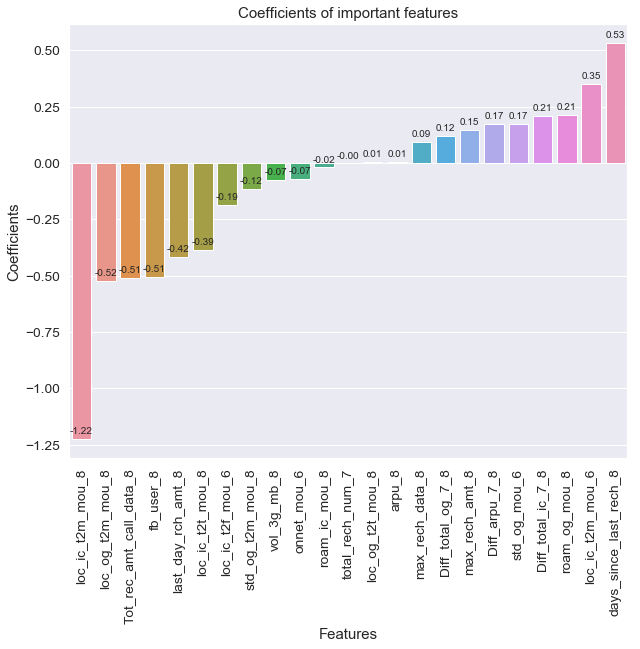

In [134]:
# Plotting all the important features with their coefficients
fig = plt.figure(figsize = (10,8))

p1=sns.barplot(x=coefficients_df.Features,y=coefficients_df.Coefficients)
plt.xticks(rotation='vertical')
for p in p1.patches:
        p1.annotate(format(p.get_height(), '.2f'), 
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha = 'center', va = 'center', 
                    xytext = (0, 8), textcoords = 'offset points')
plt.title("Coefficients of important features", fontsize=15)

## Conclusion

The random forest model is a better model for prediction as it gives better sensitivity and recall values as well as auc score when compared to the PCA+logistic regression model.

The top 15 predictor attributes which help the business understand indicators of churn are:

1. loc_ic_t2m_mou_8
2. Tot_rec_amt_call_data_8
3. loc_ic_t2t_mou_8
4. Diff_total_og_7_8
5. total_og_mou_8
6. loc_og_t2m_mou_8
7. days_since_last_rech_8
8. total_ic_mou_8
9. std_ic_mou_8
10. roam_og_mou_8
11. loc_ic_mou_8
12. last_day_rch_amt_8
13. Diff_arpu_7_8
14. roam_ic_mou_8
15. av_rech_amt_data_8



## Strategies to reduce churn

1. Give freebies to newer customers.
2. Once it is noticed that the total recharge amount starts decreasing, and along with it the incoming and outgoing calls also decreases, frequency of recharge decreases, give promotional offers.
3. Noticing the difference in data used, average revenue, recharge amount between the good and action phase is very crucial. If a there is a large difference, the customer is likely to churn, so new offers has to be given to them.
3. Give data packs at a discounted price to customers who are likely to churn.
4. Cashbacks on recharge amounts can be given or any such exciting offers can be directed towards the customers who are more likely to churn.
5. The Telecom company need to provide good offers to the customers who are using roaming services as we can see they are one of the top 15 predictor attributes which influences the churn behaviour.
6. The company needs to focus on the STD and ISD rates. the company can provide the customers using these services with some kind of STD and ISD packages.